In [4]:
options(stringsAsFactors=F)
options(max.print=1000)
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggsci))
suppressPackageStartupMessages(library(ggrepel))
suppressPackageStartupMessages(library(gridExtra))
suppressPackageStartupMessages(library(RColorBrewer))
suppressPackageStartupMessages(library(circlize))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(corrplot))
suppressPackageStartupMessages(library(igraph))
suppressPackageStartupMessages(library(cowplot))
suppressPackageStartupMessages(library(ggsignif))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(ComplexHeatmap))
options(bitmapType = 'cairo', device = 'png')


setwd('/psycl/g/mpsziller/lucia/SCZ_PGC/eQTL_PROJECT')
tissues_name <- read.table('Tissues_all', h=F, stringsAsFactors = F)$V1
geneInfo_file <-  '/psycl/g/mpsziller/lucia/PriLer_PROJECT_CMC/OUTPUT_SCZ-PGC_SCRIPTS_v2/train_All/200kb/resPrior_regEval_allchr.txt'
geneInfo_file <- c(geneInfo_file, sprintf('/psycl/g/mpsziller/lucia/PriLer_PROJECT_GTEx/OUTPUT_SCRIPTS_v2_SCZ-PGC/%s/200kb/PGC_GWAS_bin1e-2/resPrior_regEval_allchr.txt', tissues_name[-1]))
fold_cl <- 'clustering_res_matchUKBB_corrPCs/DLPC_CMC/'
clust_res <- get(load(sprintf('%smatchUKBB_tscore_corrPCs_zscaled_clusterCases_PGmethod_HKmetric_minimal.RData', fold_cl)))
fold_notebook <- '/psycl/g/mpsziller/lucia/castom_cad_scz/jupyter_notebook/'
outFold <- sprintf('%sSCZ_clustering/', fold_notebook)
type_data <- 'tscore'
type_input <- 'zscaled'
type_cluster <- 'Cases'
pheno_name <- 'SCZ'
pval_corr_thr <- 0.01
color_tissues <- read.table(sprintf('%scolor_tissues.txt', fold_notebook), header = T, stringsAsFactors = F)

# load tscore and pathway results:
loci_all <- fread(sprintf('%smatchUKBB_tscore_corrPCs_zscaled_clusterCases_summary_geneLoci_allTissues.txt', fold_cl),
                      h=T, stringsAsFactors = F, data.table = F)
loci_tissues <- fread(sprintf('%smatchUKBB_tscore_corrPCs_zscaled_clusterCases_summary_geneLoci_tissueSpec.txt', fold_cl), 
                      h=T, stringsAsFactors = F, data.table = F)
pathway_feat <- get(load(sprintf('%sreduced_matchUKBB_pathOriginal_filtJS0.2_corrPCs_tscoreClusterCases_featAssociation.RData', fold_cl)))
tscore_feat <- get(load(sprintf('%sreduced_matchUKBB_tscoreOriginal_corrPCs_tscoreClusterCases_featAssociation.RData', fold_cl)))
pathway_feat_wiki <- get(load(sprintf('%sreduced_matchUKBB_customPath_WikiPath2019HumanOriginal_corrPCs_tscoreClusterCases_featAssociation.RData', fold_cl)))
pathway_feat_CMCset <- get(load(sprintf('%sreduced_matchUKBB_customPath_CMC_GeneSetsOriginal_corrPCs_tscoreClusterCases_featAssociation.RData', fold_cl)))



In [5]:
print(paste('number of genes used for clustering:',length(clust_res$feat)))

[1] "number of genes used for clustering: 5682"


dataset      gr   nloci nloci_rep_sign nloci_rep nperc_loci_rep_sign
1 scz_boco_eur gr_1 11     8             1         0.7272727          
2 scz_boco_eur gr_2 17     9             1         0.5294118          
3 scz_boco_eur gr_3 14     8             1         0.5714286          
4 scz_boco_eur gr_4 23    18             1         0.7826087

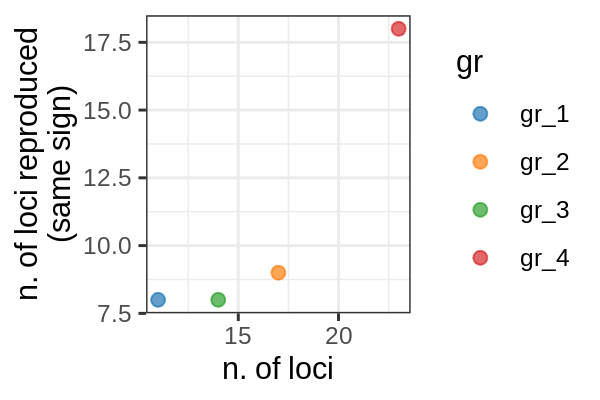

In [3]:
### make plot for reproducibility (plot loci same sign) ###
options(repr.plot.width = 3, repr.plot.height = 2, repr.plot.res = 200)

df_perc_loci <- read.table(sprintf('%spredict_scz_boco_eur/matchUKBB_tscore_corrPCs_zscaled_clusterCases_numberLociRep_prediction_modelPGC2.txt', fold_cl), header = T, stringsAsFactors = F, sep = '\t')
cohort_name <- 'scz_boco_eur'
gr_color <- pal_d3(palette = 'category20')(nrow(df_perc_loci))
df_perc_loci

# df_perc_loci_filt <- read.table(sprintf('%spredict_scz_boco_eur/matchUKBB_filt0.1_tscore_corrPCs_zscaled_clusterCases_numberLociRep_prediction_modelPGC2.txt', fold_cl), header = T, stringsAsFactors = F, sep = '\t')

df_perc_loci$dataset <- factor(df_perc_loci$dataset, levels = cohort_name)
df_perc_loci$gr <- factor(df_perc_loci$gr)
  
if(length(cohort_name)>1){  
    pl <- ggplot(df_perc_loci,aes(x = nloci, y = nloci_rep_sign, color = gr))+
      geom_point(alpha = 0.7, size = 2)+
      facet_wrap(.~dataset, nrow = 1)+
      theme_bw()+ 
      ylab('n. of loci reproduced\n(same sign)')+ xlab('n. of loci')+
      theme(legend.position = 'right')+
      scale_color_manual(values = gr_color)
    # scale_shape_manual(values=c(1, 19))+
    width_plot=1.5*length(cohort_name)
  }else{
    pl <- ggplot(df_perc_loci,aes(x = nloci, y = nloci_rep_sign, color = gr))+
      geom_point(alpha = 0.7, size = 2)+
      theme_bw()+
      ylab('n. of loci reproduced\n(same sign)')+ xlab('n. of loci')+
      theme(legend.position = 'right')+
      scale_color_manual(values = gr_color)
    width_plot=3
  }
  
pl
ggsave(filename = sprintf('%spredict_scz_boco_eur/matchUKBB_%s_%s_cluster%s_numberLociRepSign_Groups_prediction_model%s.pdf',
                          fold_cl, type_data, type_input, type_cluster, 'PCG2'), width = width_plot,
       height = 2, plot = pl, device = 'pdf')
  



In [4]:
clust_res$test_cov

cov_id pval         statistic   test_type kNN
1  C1     3.143041e-13  61.2725575 kruskal   20 
2  C2     0.000000e+00  94.0602252 kruskal   20 
3  C3     6.216174e-02   7.3274504 kruskal   20 
4  C4     2.079000e-04  19.5748631 kruskal   20 
5  C5     3.661194e-02   8.5073157 kruskal   20 
6  C6     7.388862e-01   1.2590209 kruskal   20 
7  C7     7.542882e-01   1.1946479 kruskal   20 
8  C9     5.623127e-01   2.0489338 kruskal   20 
9  C15    9.080227e-01   0.5489067 kruskal   20 
10 C18    4.764298e-01   2.4937051 kruskal   20 
11 cohort 1.442301e-13 243.3574778 chisq     20

In [5]:
### functions ###
create_df_genes <- function(alltissues_loci, tissue_spec_loci, gr_tot){
    
   df <- data.frame(ngenes = c(), tissue = c(), comp = c(), loci = c())
    tissues <- unique(tissue_spec_loci$tissue)
    
    for(i in 1:length(gr_tot)){
      tmp <- alltissues_loci[grepl(gr_tot[i], alltissues_loci$comp_sign),]
      df <- rbind(df, data.frame(ngenes = tmp$ngenes_unique, 
                                 tissue = rep('All', nrow(tmp)), 
                                 comp = rep(gr_tot[i], nrow(tmp)), 
                                 loci = tmp$loci_id))
    }

    for(j in 1:length(tissues)){
      for(i in 1:length(gr_tot)){
        tmp <- tissue_spec_loci[grepl(gr_tot[i], tissue_spec_loci$comp_sign) & tissue_spec_loci$tissue %in% tissues[j],]
        df <- rbind(df, data.frame(ngenes = tmp$ngenes, 
                                   tissue = rep(tissues[j], nrow(tmp)), 
                                   comp = rep(gr_tot[i], nrow(tmp)), loci = tmp$loci_id))
      }
    }

    df$comp <- factor(df$comp, levels = unname(gr_tot))
    df$tissue <- factor(df$tissue, levels = c('All', tissues))
    # newcolours <- c('grey', color_tissues$color[match(tissues, color_tissues$tissues)])
    # put loci in id based on overall comparison
    df$loci_name <- df$loci
    id_notall <- which(df$tissue !='All')
    for(i in id_notall){
      tmp <- tissue_spec_loci[tissue_spec_loci$loci_id == df$loci[i] & grepl(df$comp[i], tissue_spec_loci$comp_sign) & tissue_spec_loci$tissue == df$tissue[i] ,]
      tmp_all <- alltissues_loci[alltissues_loci$chrom == tmp$chrom,]
      tmp_all <- tmp_all[which.min(abs(tmp_all$start - tmp$start)),]
      df$loci_name[i] <- tmp_all$loci_id
    }
    df$loci_name <- factor(df$loci_name, levels =unique( alltissues_loci$loci_id))

    # same plot but n. of loci and not genes
    df_loci <- data.frame(tissue = unlist(lapply(c('All', tissues), function(x) rep(x, length(gr_tot)))), comp = rep(gr_tot, length(tissues)+1), 
                          nloci = as.vector(table(df$comp, df$tissue)))
    df_loci$comp <- factor(df_loci$comp, levels = unname(gr_tot))
    df_loci$tissue <- factor(df_loci$tissue, levels = c('All', tissues))
                                          
    df$comp <- factor(df$comp, levels = unname(gr_tot))
    df$tissue <- factor(df$tissue, levels = c('All', tissues))
    # newcolours <- c('grey', color_tissues$color[match(tissues, color_tissues$tissues)])
    # put loci in id based on overall comparison
    df$loci_name <- df$loci
    id_notall <- which(df$tissue !='All')
    for(i in id_notall){
      tmp <- tissue_spec_loci[tissue_spec_loci$loci_id == df$loci[i] & grepl(df$comp[i], tissue_spec_loci$comp_sign) & tissue_spec_loci$tissue == df$tissue[i] ,]
      tmp_all <- alltissues_loci[alltissues_loci$chrom == tmp$chrom,]
      tmp_all <- tmp_all[which.min(abs(tmp_all$start - tmp$start)),]
      df$loci_name[i] <- tmp_all$loci_id
    }
    df$loci_name <- factor(df$loci_name, levels =unique( alltissues_loci$loci_id))

    # same plot but n. of loci and not genes
    df_loci <- data.frame(tissue = unlist(lapply(c('All', tissues), function(x) rep(x, length(gr_tot)))), comp = rep(gr_tot, length(tissues)+1), 
                          nloci = as.vector(table(df$comp, df$tissue)))
    df_loci$comp <- factor(df_loci$comp, levels = unname(gr_tot))
    df_loci$tissue <- factor(df_loci$tissue, levels = c('All', tissues))
                                          
    return(list(df = df, count_loci = df_loci))
}


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


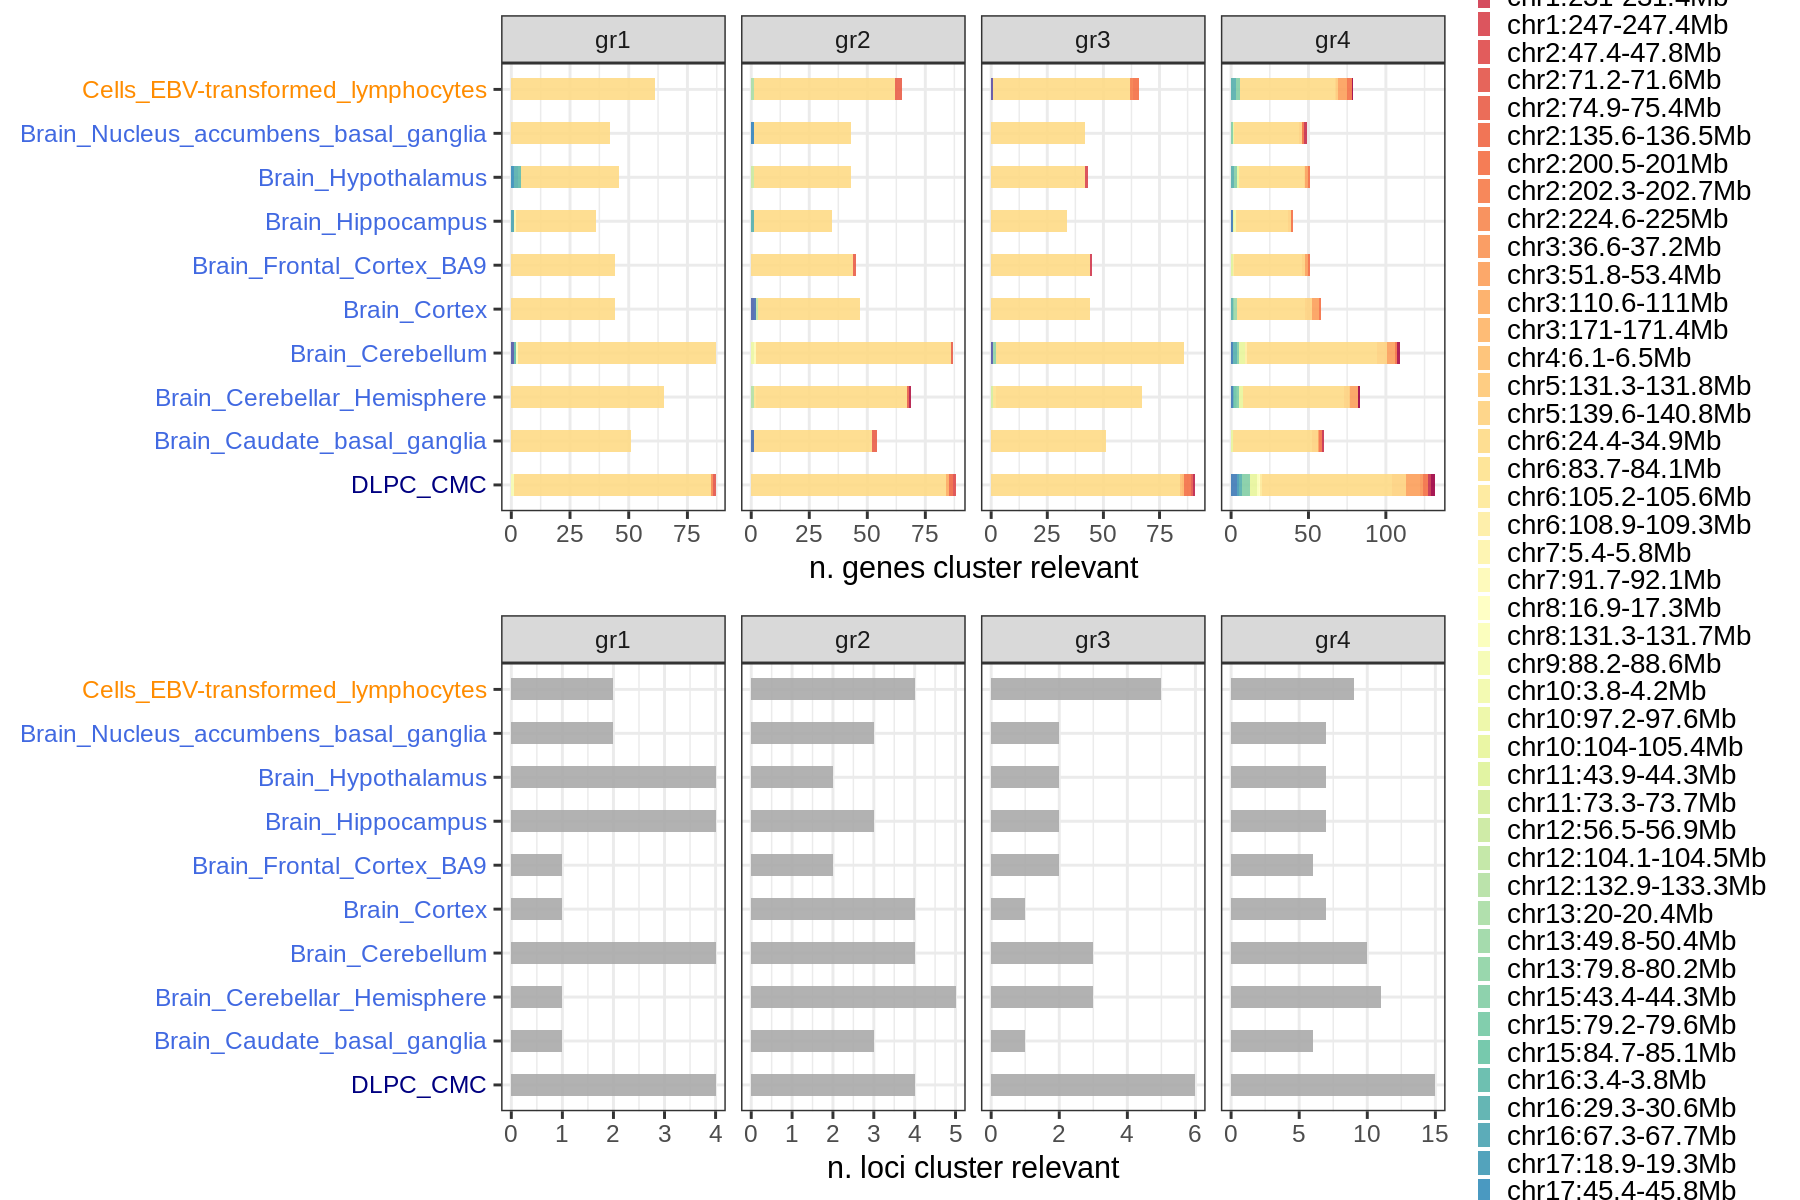

In [6]:
#### plot count (across tissues) ####
options(repr.plot.width = 9, repr.plot.height = 6, repr.plot.res = 200)

gr_tot <- paste0('gr', sort(unique(clust_res$cl_best$gr)))
out <- create_df_genes(alltissues_loci = loci_all, tissue_spec_loci = loci_tissues, gr_tot = gr_tot)
df <- out$df
df_loci <- out$count_loci
newcolours <- c('grey', color_tissues$color[match(tissues_name, color_tissues$tissues)])

coul <- colorRampPalette(brewer.pal(11, "Spectral"))(length(levels(df$loci_name)))
color_gr <- pal_d3("category10")(length(gr_tot))

pl1 <- ggplot(data = subset(df, tissue != 'All'), aes(x = tissue, y = ngenes, fill = loci_name))+
  geom_bar(alpha = 0.9, width = 0.5, stat = 'identity')+
  facet_wrap(.~comp, ncol = length(gr_tot), scales = 'free_x')+
  ylab('n. genes cluster relevant')+ 
  theme_bw()+ 
  theme(legend.position = 'right', legend.key.size = unit(0.2, "cm"), 
        legend.text = element_text(size = 10), legend.title = element_blank(), 
        axis.title.y = element_blank(), axis.text.y = element_text(colour = newcolours[-1]))+
  guides(fill=guide_legend(ncol=1))+
  scale_fill_manual(values = coul)+
  coord_flip() 

pl2 <- ggplot(data = subset(df_loci, tissue != 'All'), aes(x = tissue, y = nloci))+
  geom_bar(alpha = 0.9, width = 0.5, stat = 'identity', fill = 'darkgrey')+
  facet_wrap(.~comp, ncol = length(gr_tot), scales = 'free_x')+
  ylab('n. loci cluster relevant')+ 
  theme_bw()+ 
  theme(legend.position = 'right', legend.key.size = unit(0.5, "cm"), 
        legend.text = element_text(size = 10), legend.title = element_blank(), 
        axis.title.y = element_blank(), axis.text.y = element_text(colour = newcolours[-1]))+
  coord_flip() 

tot_pl <- ggarrange(plotlist = list(pl1, pl2), ncol=1, nrow=2, 
                    align = 'v', common.legend = T,
                    legend = 'right')
tot_pl
ggsave(filename = sprintf('%scluster_ngenes_nloci_pertissues_%s_%s.pdf', outFold, type_data, type_input),
       plot = tot_pl, width = 9, height = 6, dpi = 200)



Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


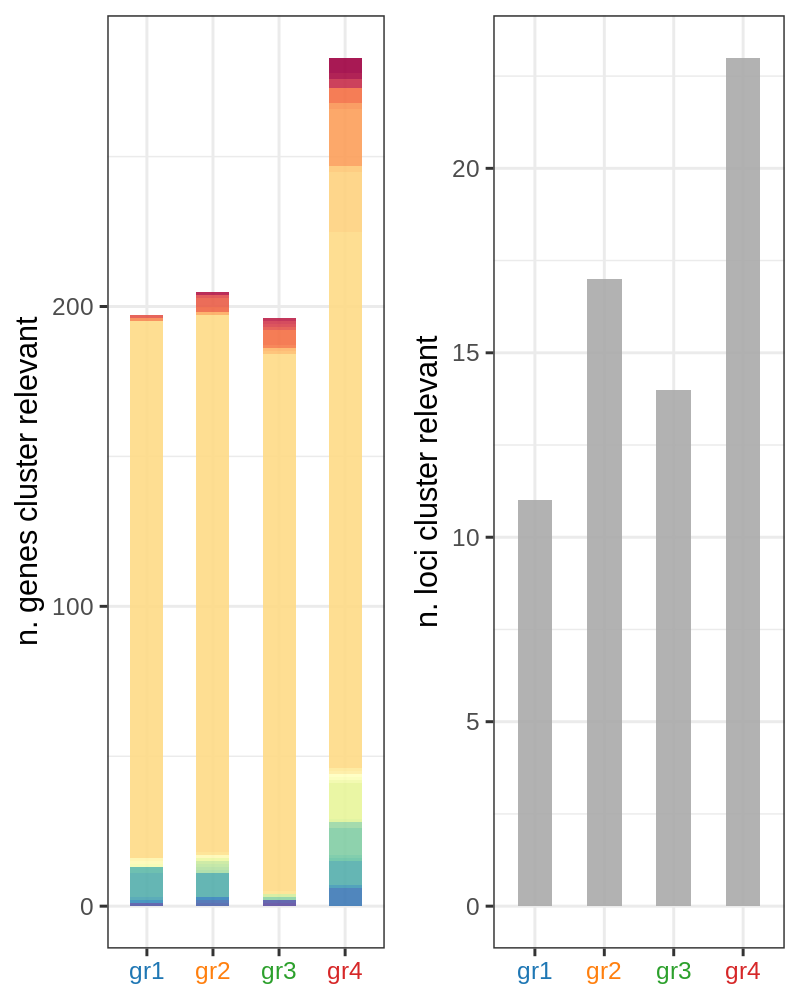

In [7]:
#### plot count (combined tissues) ####
options(repr.plot.width = 4, repr.plot.height = 5, repr.plot.res = 200)

pl1 <- ggplot(data = subset(df, tissue == 'All'), aes(x = comp, y = ngenes, fill = loci_name))+
  geom_bar(alpha = 0.9, width = 0.5, stat = 'identity')+
  ylab('n. genes cluster relevant')+ 
  theme_bw()+ 
  theme(legend.position = 'none', legend.key.size = unit(0.2, "cm"), plot.title = element_text(hjust = 0.5),
        legend.text = element_text(size = 10), legend.title = element_blank(), 
        axis.title.x = element_blank(), axis.text.x = element_text(colour = color_gr))+
  scale_fill_manual(values = coul)+
  guides(fill=guide_legend(ncol=1))

pl2 <- ggplot(data = subset(df_loci, tissue == 'All'), aes(x = comp, y = nloci))+
  geom_bar(alpha = 0.9, width = 0.5, stat = 'identity', fill = 'darkgrey')+
  # facet_wrap(.~comp, ncol = length(gr_tot), scales = 'free_x')+
  ylab('n. loci cluster relevant')+ 
  theme_bw()+ 
  theme(legend.position = 'none', legend.key.size = unit(0.5, "cm"), 
        legend.text = element_text(size = 10), legend.title = element_blank(), 
        axis.title.x = element_blank(), axis.text.x = element_text(colour = color_gr))+
  scale_fill_d3()

tot_pl <- ggarrange(plotlist = list(pl1, pl2), ncol=2, nrow=1, align = 'h')
ggsave(filename = sprintf('%scluster_ngenes_nloci_alltissues_%s_%s.pdf', outFold, type_data, type_input), 
       plot = tot_pl, width = 4, height = 5, dpi = 200)
tot_pl


In [8]:
### function for heatmap plot (genes)
get_short_name <- function(tissue_name){
    
  tmp <- sapply(strsplit(tissue_name, split = '_')[[1]], function(x) 
        substr(x = x, start = 1, stop = 1))
  if(!tissue_name %in% c('Brain_Hippocampus','Brain_Hypothalamus',
                         'Brain_Cerebellum', 'Brain_Cerebellar_Hemisphere', 
                         'DLPC_CMC')){
    out <- paste0(tmp, collapse = '')
    out <- paste0('(', out,')')
  }else{
       if('Brain_Hippocampus' == tissue_name){out <- '(BHi)'}
      if('Brain_Hypothalamus'== tissue_name){out <- '(BHy)'}
      if('Brain_Cerebellum' == tissue_name){out <- '(BCe)'}
      if('Brain_Cerebellar_Hemisphere' == tissue_name){out <- '(BCeH)'}
      if('DLPC_CMC'  == tissue_name){out <- '(DLPC)'}
  }              
                
    return(out)
}

df_match <- data.frame(tissue = tissues_name, 
                       short = sapply(tissues_name, function(x) get_short_name(x)))

tscore_tot <- do.call(rbind, tscore_feat$test_feat) 
tscore_tot <- left_join(tscore_tot, df_match) %>%
    mutate(new_id = paste(feat, short)) 
tscore_sign <- tscore_tot %>% filter(pval_corr <= pval_corr_thr)

# combine res_pval:                                      
res_pval_tot <- do.call(rbind, tscore_feat$res_pval) 
res_pval_tot <- left_join(res_pval_tot, df_match) %>%
    mutate(new_id = paste(external_gene_name, short)) 
                                      
length(unique(tscore_sign$new_id))
length(unique(tscore_sign$feat))
nrow(loci_tissues)
nrow(loci_all)


Joining, by = "tissue"

Joining, by = "tissue"



[1] 755

[1] 319

[1] 124

[1] 55

- 755 significant genes, 319 unique across all tissues.
- combined into 124 loci in 10 tissues and 55 combined across tissues

In [9]:
# get the most significant gene per locus and create matrix

feat_est <- matrix(NA, nrow = nrow(loci_all), ncol = length(gr_tot))
feat_CIl <- matrix(NA, nrow = nrow(loci_all), ncol = length(gr_tot))
feat_CIu <- matrix(NA, nrow = nrow(loci_all), ncol = length(gr_tot))
feat_pvcorr <- matrix(NA, nrow = nrow(loci_all), ncol = length(gr_tot))
gene_names <- vector(mode = 'numeric', length = nrow(loci_all))

for(i in 1:nrow(feat_est)){
# i=34  
loci_tmp <- loci_all[i,]
genes <- strsplit(loci_tmp$gene, split = ',')[[1]]
tmp <- tscore_sign %>% filter(feat %in% genes)
n_gr <- length(unique(tmp$comp))
# consider genes that are singificant in highest number of groups possible
genes_common <- names(which(table(tmp$new_id) == n_gr))
if(length(genes_common) >0){
  tmp <- tmp %>% filter(new_id %in% genes_common)  
}
top_gene <- tmp[order(tmp$pval), ]
top_gene <- top_gene[order(abs(top_gene$estimate), decreasing = T), ]
top_gene <- top_gene$new_id[1]
top_gene

feat_est[i,] <- tscore_tot$estimates[tscore_tot$new_id == top_gene]
feat_CIl[i,] <- tscore_tot$CI_up[tscore_tot$new_id == top_gene]
feat_CIu[i,] <- tscore_tot$CI_up[tscore_tot$new_id == top_gene]
feat_pvcorr[i,] <- tscore_tot$pval_corr[tscore_tot$new_id == top_gene]

gene_names[i] <- top_gene
}

rownames(feat_est) <- rownames(feat_CIl) <- rownames(feat_CIu) <- rownames(feat_pvcorr) <- gene_names
colnames(feat_est) <- colnames(feat_CIl) <- colnames(feat_CIu) <- colnames(feat_pvcorr) <- gr_tot
res_pval_est <- res_pval_tot[match(gene_names, res_pval_tot$new_id), ]
feat_est
feat_pvcorr
res_pval_est

gr1           gr2           gr3           gr4          
DNAJC11 (DLPC)        0.0263088597 -2.979144e-03  0.0079615770 -0.3441982787
MT1XP1 (BCe)          0.0152920715  7.716854e-03 -0.0031508303 -0.1830421306
CD164L2 (BCeH)       -0.0009471970  6.040431e-03 -0.0023495779 -0.0080326670
C1orf52 (DLPC)        0.0359982528  2.709332e-02 -0.0548925821  0.0097840978
DSTYK (BCbg)         -0.0230880383  1.211987e-02  0.0368526287 -0.2370932591
FAM89A (BFCB)        -0.0368504248 -2.060767e-03  0.0417991888 -0.0337634453
ZNF670 (BHy)         -0.0093057813 -2.784673e-03  0.0114843895 -0.0038262747
MSH2 (DLPC)          -0.0013856552 -9.430562e-03  0.0077476288  0.0013912309
MPHOSPH10 (DLPC)      0.0155961714  7.877251e-03 -0.0216262660  0.0079993330
AC104135.3 (CEl)     -0.0355697007  7.071895e-02 -0.0071587689 -0.0354866368
R3HDM1 (DLPC)        -0.0031443342  1.068798e-02 -0.0033469090 -0.0080977408
C2orf69 (CEl)        -0.0031189807 -7.208324e-04 -0.0347829045  0.7459399410
TMEM237 (CEl)         0.0131537053  4.764833e-02 -0.0550091851  0.1110199617
WDFY1 (DLPC)         -0.0120733354  8.258948e-03  0.0066838808 -0.0024174241
DCLK3 (DLPC)          0.0074120601 -2.370060e-02 -0.0145682791  0.2389043810
TMEM110 (CEl)         0.0040267756  8.282320e-03  0.0046852931 -0.2795295956
PVRL3 (DLPC)         -0.0019603071  5.735727e-03 -0.0014629080 -0.0047602145
TNIK (DLPC)          -0.0521996430 -2.463391e-03  0.0555546003 -0.0154396837
WFS1 (DLPC)           0.0034413011  9.889571e-03 -0.0092284966 -0.0096085467
P4HA2-AS1 (BCeH)     -0.0014662161 -2.294058e-02  0.0029811713  0.1403638888
HARS (BCe)           -0.0156861384 -1.018088e-02  0.0036801571  0.2112792481
C4A (CEl)             0.1917263352 -2.204121e+00  0.1648621471  0.1425319128
RWDD2A (BCeH)         0.0025235249  1.028002e-02 -0.0096311739 -0.0005668045
LIN28B (DLPC)         0.0065883823  3.219000e-03 -0.0248124638  0.1755807422
LINC00222 (BCe)       0.0113318103  4.858459e-03 -0.0003125133 -0.1586006613
FSCN1 (BHi)          -0.0520487113  4.382481e-02  0.0171126982  0.0707109149
KRIT1 (BCe)          -0.0051063527  6.510820e-03  0.0010918937 -0.0022946068
VPS37A (DLPC)        -0.0110039324 -6.456446e-03  0.0025423108  0.1268678255
ASAP1 (DLPC)          0.0107607746  1.018219e-02 -0.0069859010 -0.1134961543
RP11-213G2.3 (DLPC)   0.0116836560 -7.574759e-03 -0.0073858613  0.0066810157
RP11-464C19.3 (BHi)  -0.0036873715  2.021241e-03 -0.0140971548  0.1790548293
ALDH18A1 (BCe)       -0.0164221294  7.140557e-02 -0.0249530330 -0.0592634103
CYP17A1-AS1 (BHy)    -0.0067110569  6.608646e-04 -0.0302021446  0.5390850769
EXT2 (BFCB)           0.0297812163 -1.789076e-02  0.0019356382 -0.2128212476
MRPL48 (BCeH)        -0.0034725655 -3.120269e-03  0.0061322816 -0.0057378035
RP11-977G19.11 (BHy) -0.0002717351  5.905761e-03 -0.0027376854 -0.0111078016
MIR3652 (BC)          0.0045331176 -8.024677e-03  0.0004256439  0.0027411764
FBRSL1 (BCeH)        -0.0005491488  1.245811e-02 -0.0069922196 -0.0096720751
MPHOSPH8 (CEl)       -0.0043129064  7.479854e-03 -0.0010884412  0.0053166953
SETDB2 (BC)           0.0223435549  1.438792e-02 -0.0156872874 -0.1851421865
RBM26-AS1 (BCe)      -0.0024444114 -7.073979e-03  0.0079975799 -0.0070357247
AC011330.5 (BHy)     -0.0070436813  1.224560e-02 -0.0169538271  0.1663306165
RASGRF1 (BCeH)       -0.0190945131 -1.336383e-03  0.0022709712  0.1878533146
CSPG4P11 (BCeH)       0.0035139114  4.277329e-04  0.0017525125 -0.0616021713
CLUAP1 (BCe)         -0.0391506479  2.579166e-02  0.0262692936 -0.0370397630
INO80E (BCe)         -0.0096922294  1.749741e-02  0.0235130758 -0.2651264643
HSD11B2 (BHi)         0.0041703667 -4.355698e-03 -0.0015682699  0.0026835780
SNORD3A (DLPC)       -0.0030027041 -3.319246e-03  0.0038609059  0.0136072613
NPEPPS (BHy)         -0.0458123615  3.736697e-05  0.0452901244  0.0090515675
SF3A2 (BNabg)         0.0021330549 -6.716711e-03  0.0018196226  0.0064167609
HAPLN4 (BCeH)        -0.0024570437 -5.992093e-03 -0.0120407212  0.2273219044
SLC7A9 (BCbg)    

gr1           gr2          gr3           gr4         
DNAJC11 (DLPC)        7.325464e-01 9.946178e-01  9.633932e-01 1.705240e-11
MT1XP1 (BCe)          8.931572e-01 9.682742e-01  9.828998e-01 2.510834e-03
CD164L2 (BCeH)        9.455317e-01 1.308397e-04  4.857422e-01 3.699530e-01
C1orf52 (DLPC)        3.782601e-01 8.501297e-01  7.599729e-03 9.803112e-01
DSTYK (BCbg)          7.513054e-01 9.547500e-01  2.847716e-01 2.924550e-05
FAM89A (BFCB)         3.216154e-02 9.914076e-01  6.593590e-03 9.078249e-01
ZNF670 (BHy)          6.864000e-02 9.060606e-01  6.224706e-03 9.375414e-01
MSH2 (DLPC)           9.517375e-01 6.303524e-03  1.106101e-02 9.803112e-01
MPHOSPH10 (DLPC)      3.915949e-03 8.320068e-01  1.987208e-06 9.304217e-01
AC104135.3 (CEl)      2.579418e-01 1.658607e-03  9.541493e-01 8.988882e-01
R3HDM1 (DLPC)         7.933679e-01 1.419532e-04  7.685963e-01 8.102521e-01
C2orf69 (CEl)         9.762853e-01 9.977760e-01  6.239833e-03 2.104330e-41
TMEM237 (CEl)         9.283291e-01 1.965003e-01  4.317983e-03 2.663968e-01
WDFY1 (DLPC)          5.951162e-05 2.311137e-01  2.533243e-01 9.724214e-01
DCLK3 (DLPC)          9.587092e-01 8.896324e-01  9.287945e-01 3.021094e-05
TMEM110 (CEl)         9.664697e-01 8.456986e-01  9.088267e-01 2.285070e-15
PVRL3 (DLPC)          3.925888e-01 8.883649e-08  7.462009e-01 6.081632e-01
TNIK (DLPC)           1.351120e-02 9.946178e-01  6.054669e-03 9.685217e-01
WFS1 (DLPC)           8.604730e-01 4.568789e-02  9.976507e-03 8.392119e-01
P4HA2-AS1 (BCeH)      9.934320e-01 7.159118e-01  9.744150e-01 4.957934e-03
HARS (BCe)            8.712079e-01 9.594750e-01  9.828998e-01 6.950088e-05
C4A (CEl)            1.913907e-286 0.000000e+00 4.394564e-200 1.372537e-18
RWDD2A (BCeH)         8.932026e-01 8.197708e-03  2.159360e-03 9.954025e-01
LIN28B (DLPC)         9.587092e-01 9.938218e-01  7.268897e-01 4.313192e-03
LINC00222 (BCe)       9.229312e-01 9.787494e-01  9.962762e-01 6.011815e-03
FSCN1 (BHi)           8.382706e-03 3.022105e-01  8.887428e-01 7.892640e-01
KRIT1 (BCe)           1.561328e-04 8.552305e-05  9.441507e-01 9.466636e-01
VPS37A (DLPC)         8.993891e-01 9.719449e-01  9.949232e-01 8.542030e-04
ASAP1 (DLPC)          8.869646e-01 9.327931e-01  9.445835e-01 5.711881e-03
RP11-213G2.3 (DLPC)   1.862870e-06 1.550284e-01  3.742759e-02 8.629064e-01
RP11-464C19.3 (BHi)   9.941826e-01 9.846818e-01  8.887428e-01 8.238522e-03
ALDH18A1 (BCe)        8.731162e-01 1.786536e-03  7.067692e-01 8.076021e-01
CYP17A1-AS1 (BHy)     9.399351e-01 9.968551e-01  1.107549e-01 7.118222e-28
EXT2 (BFCB)           5.534052e-01 9.177621e-01  9.889801e-01 2.710652e-04
MRPL48 (BCeH)         5.188153e-01 7.217735e-01  6.033310e-03 8.280513e-01
RP11-977G19.11 (BHy)  9.854591e-01 1.092929e-03  3.970132e-01 1.801250e-01
MIR3652 (BC)          1.731254e-01 2.823442e-03  9.960018e-01 9.509732e-01
FBRSL1 (BCeH)         9.860863e-01 2.183919e-03  2.147646e-01 8.345741e-01
MPHOSPH8 (CEl)        1.509477e-01 2.680977e-03  9.396150e-01 8.624691e-01
SETDB2 (BC)           7.609531e-01 9.476923e-01  9.243373e-01 5.783273e-03
RBM26-AS1 (BCe)       8.559564e-01 6.087191e-02  1.144392e-03 8.243440e-01
AC011330.5 (BHy)      9.399351e-01 9.003704e-01  8.015287e-01 1.641852e-03
RASGRF1 (BCeH)        8.379316e-01 9.914141e-01  9.952677e-01 2.019810e-03
CSPG4P11 (BCeH)       9.566970e-01 9.914141e-01  9.630379e-01 8.472804e-03
CLUAP1 (BCe)          4.208074e-03 5.829358e-01  2.470941e-01 8.363146e-01
INO80E (BCe)          9.621234e-01 9.087372e-01  7.263123e-01 4.648857e-07
HSD11B2 (BHi)         7.450364e-03 5.220000e-02  8.638078e-01 8.977070e-01
SNORD3A (DLPC)        2.558321e-01 4.351193e-01  2.682731e-02 5.327323e-03
NPEPPS (BHy)          9.870488e-03 9.990000e-01  1.372027e-02 9.595745e-01
SF3A2 (BNabg)         1.762128e-01 1.101385e-11  4.433411e-01 3.270973e-01
HAPLN4 (BCeH)         9.854752e-01 9.606111e-01  8.857098e-01 6.293987e-06
SLC7A9 (BCbg)         9.746627e-01 8.673923e-03  2.942640e-01 9.923849e-01
ITPA (BC)             9.331613e-01 2.922182e-0

ensembl_gene_id external_gene_name dev_geno   test_dev_geno Dx_beta      
20    ENSG00000007923 DNAJC11            0.12992626 0.008404827   -0.0362018379
11536 ENSG00000233929 MT1XP1             0.43262256 0.082371713    0.0039923414
8903  ENSG00000174950 CD164L2            0.37048630 0.253093351    0.0053782084
241   ENSG00000162642 C1orf52            0.24499480 0.131892269   -0.0243593035
6621  ENSG00000133059 DSTYK              0.02749231 0.001821984   -0.0383101589
17406 ENSG00000182118 FAM89A             0.15725742 0.071074731    0.0045354473
20779 ENSG00000135747 ZNF670             0.11500329 0.038889623   -0.0033148814
731   ENSG00000095002 MSH2               0.06928827 0.029997390   -0.0166068386
774   ENSG00000124383 MPHOSPH10          0.43451714 0.409318866    0.0031314938
24544 ENSG00000204792 AC104135.3         0.78115745 0.590723317   -0.0003882223
906   ENSG00000048991 R3HDM1             0.01860900 0.001712275   -0.0085756345
24637 ENSG00000178074 C2orf69            0.05622527 0.002024704    0.0563618164
24641 ENSG00000155755 TMEM237            0.09679384 0.001271387    0.0120980617
1060  ENSG00000085449 WDFY1              0.04057581 0.023685120   -0.0098526935
1161  ENSG00000163673 DCLK3              0.10486452 0.014051888   -0.0410439469
24747 ENSG00000213533 TMEM110            0.05052683 0.031178966   -0.0454407522
1306  ENSG00000177707 PVRL3              0.03924461 0.013858440   -0.0124728050
1439  ENSG00000154310 TNIK               0.07465877 0.015201867    0.0114665115
1536  ENSG00000109501 WFS1               0.04770537 0.021424972   -0.0020074584
9611  ENSG00000237714 P4HA2-AS1          0.15124697 0.098301404    0.0032325068
12522 ENSG00000170445 HARS               0.11090772 0.006485901   -0.0304469471
25119 ENSG00000244731 C4A                0.34369719 0.174054394    0.0843575039
9805  ENSG00000013392 RWDD2A             0.03805378 0.022581845   -0.0239693604
2414  ENSG00000187772 LIN28B             0.06369831 0.022304727    0.0355288798
12752 ENSG00000203801 LINC00222          0.18702159 0.037168466   -0.0283075106
19700 ENSG00000075618 FSCN1              0.08664772 0.013531145    0.0136226595
12912 ENSG00000001631 KRIT1              0.03084733 0.011273839   -0.0087378373
2916  ENSG00000155975 VPS37A             0.24671073 0.194700467   -0.0458938785
3092  ENSG00000153317 ASAP1              0.07763678 0.033530653   -0.0269107050
3243  ENSG00000165121 RP11-213G2.3       0.04527147 0.018105069   -0.0001534234
19906 ENSG00000226005 RP11-464C19.3      0.03697799 0.002446235   -0.0104918362
13382 ENSG00000059573 ALDH18A1           0.10225299 0.061117467   -0.0143837637
21423 ENSG00000203886 CYP17A1-AS1        0.24835349 0.060765120   -0.0612776225
18304 ENSG00000151348 EXT2               0.06482913 0.021674267   -0.0220199849
10398 ENSG00000175581 MRPL48             0.04379166 0.033269994    0.0236726772
21562 ENSG00000257303 RP11-977G19.11     0.20837076 0.164807504    0.0122627455
16427 ENSG00000265072 MIR3652            0.08614505 0.017716666   -0.0121252898
10582 ENSG00000112787 FBRSL1             0.02279822 0.009369127   -0.0089631574
25932 ENSG00000196199 MPHOSPH8           0.03678107 0.005356100    0.0077470791
16491 ENSG00000136169 SETDB2             0.03884704 0.018526327   -0.0122197916
13836 ENSG00000227354 RBM26-AS1          0.33787961 0.366677430   -0.0028982393
21667 ENSG00000249839 AC011330.5         0.10396584 0.051358487    0.0168570344
10771 ENSG00000058335 RASGRF1            0.09399618 0.021007525    0.0186928085
10787 ENSG00000259726 CSPG4P11           0.26216268 0.139064934   -0.0569136936
14128 ENSG00000103351 CLUAP1             0.17986757 0.052452531    0.0088250182
14181 ENSG00000169592 INO80E             0.10817937 0.020773918    0.0362327772
20301 ENSG00000176387 HSD11B2            0.01594883 0.015667755   -0.0235540769
5295  ENSG00000263934 SNORD3A            0.06174801 0.030973286    0.0093030910
21824 ENSG00000141279 NPEPPS             0.01945246 0.010103024   -0.0101340513
23944 

png 
  2

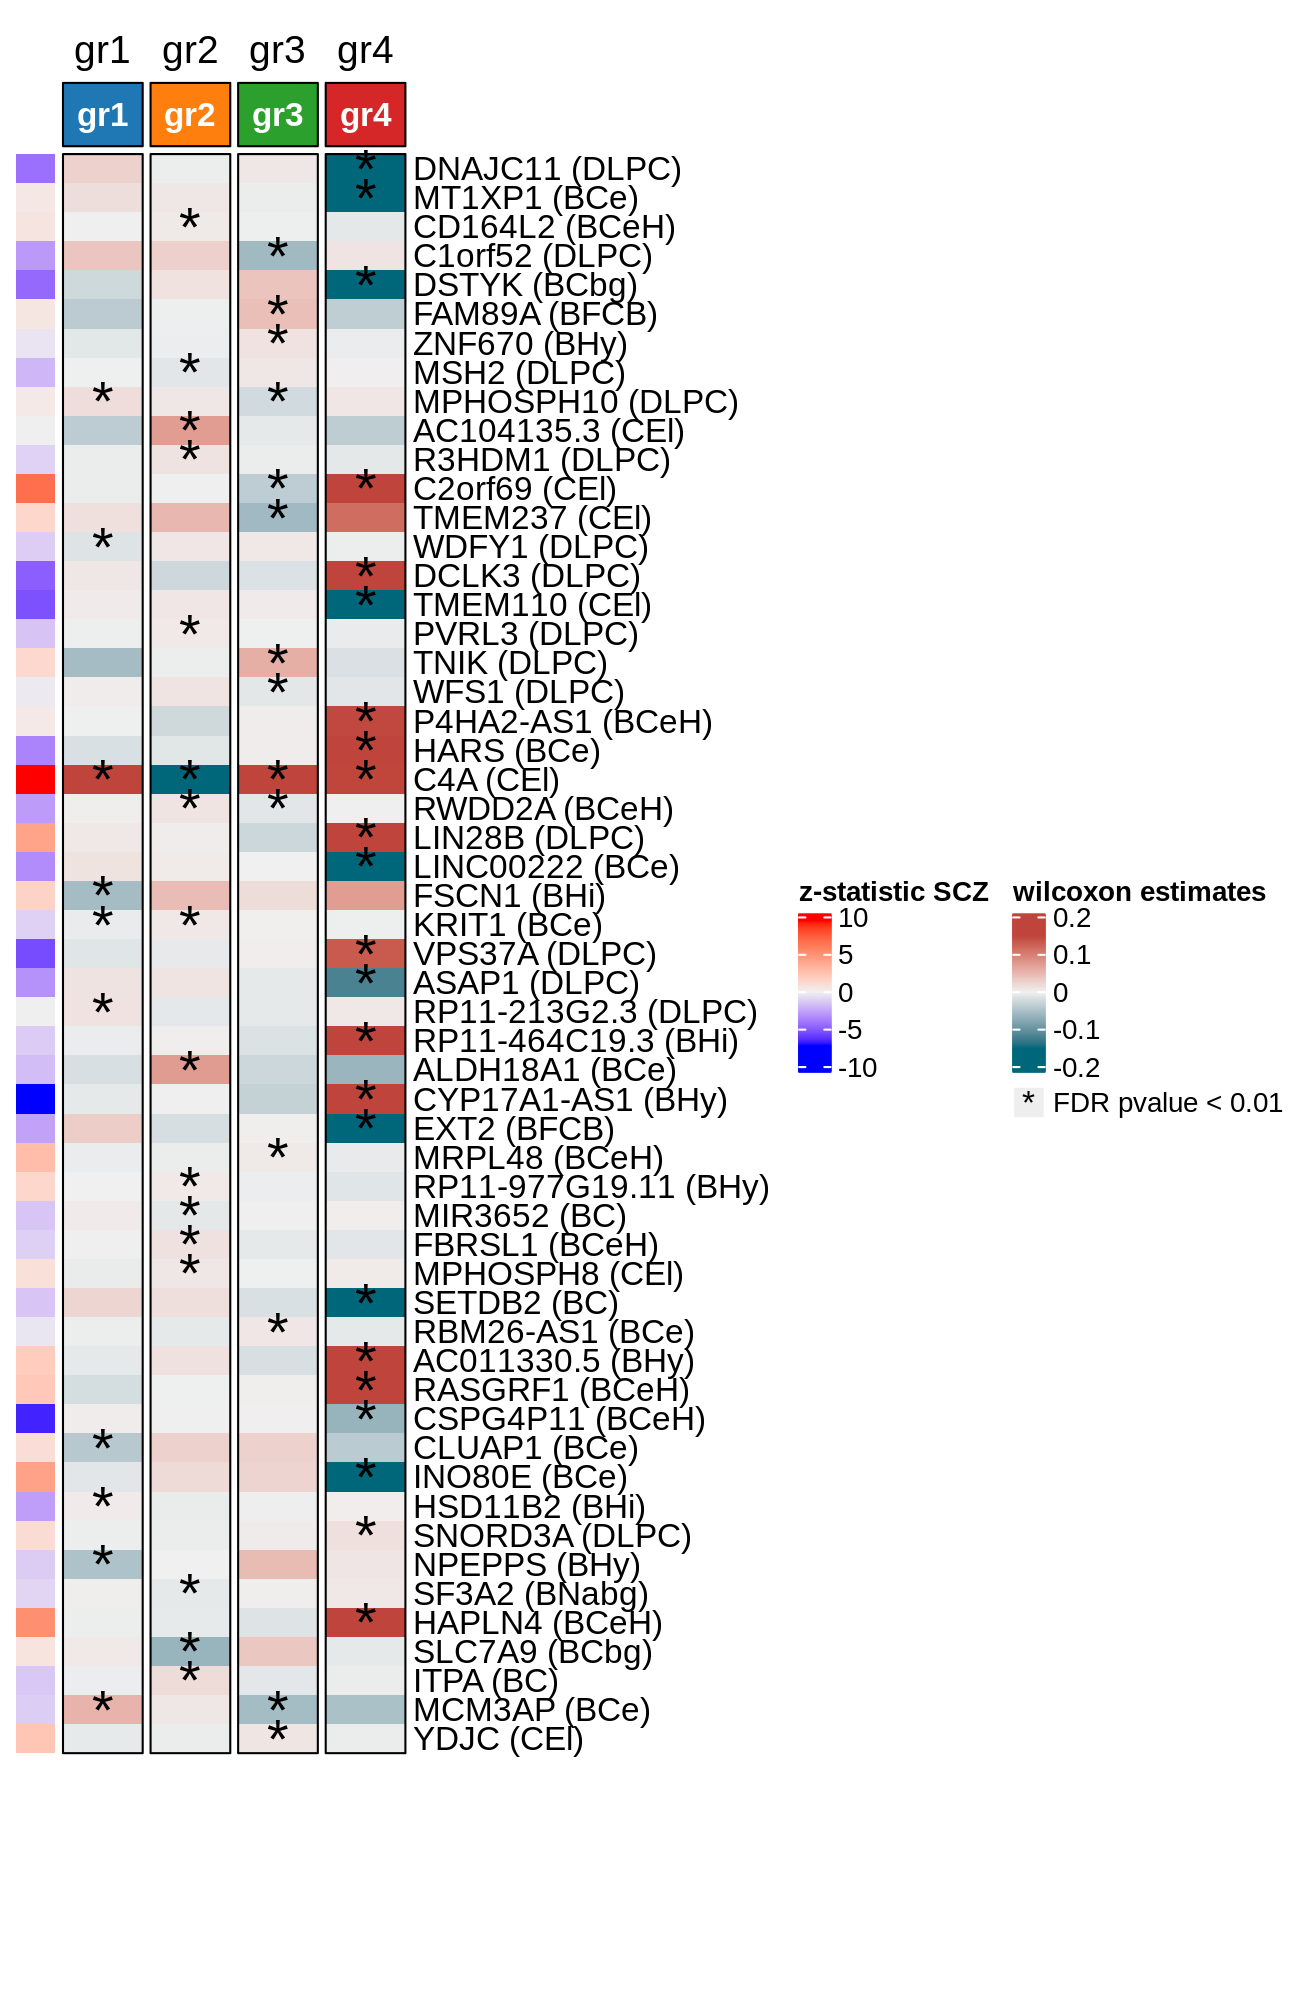

In [10]:
options(repr.plot.width = 6.5, repr.plot.height = 10, repr.plot.res = 200)
pheno_name <- 'SCZ'

P <- length(gr_tot)
# cap
tmp_mat <- as.matrix(feat_est)
val <- abs(quantile(as.vector(feat_est),probs = 0.95))
mat_breaks <- seq(-val, val, length.out = 100)
tmp_mat[tmp_mat>=val] <- val
tmp_mat[tmp_mat<=-val] <- -val

mat_colors_gr <- list(cluster = pal_d3(palette = 'category20')(P))
names(mat_colors_gr$cluster) <- gr_tot

column_ha <- HeatmapAnnotation(cluster = anno_block(gp = gpar(fill = mat_colors_gr$cluster),
                                                    labels = names(mat_colors_gr$cluster),
                                                    labels_gp = gpar(col = "white", fontsize = 12,  
                                                                     fontface = "bold")))
feat_pvcorr_pch <- feat_pvcorr
feat_pvcorr_pch[feat_pvcorr <= pval_corr_thr] <- '*'
feat_pvcorr_pch[feat_pvcorr > pval_corr_thr] <- ''

estimate_col_fun = colorRamp2(c(min(tmp_mat), 0, max(tmp_mat)), 
                                c("#00677B", "#F0F0F0", "#BF443B"))
zstat_col_fun = colorRamp2(c(min(res_pval_est[,7]), 0, max(res_pval_est[,7])), 
                             c("blue","#F0F0F0", "red"))

row_ha <- rowAnnotation(zstat = res_pval_est[,7],
                        col = list(zstat = zstat_col_fun), 
                        annotation_label = list(zstat = sprintf('z-statistic %s', pheno_name)), 
                        annotation_name_gp = gpar(col = 'white'))

lgd_est <- Legend(title = "wilcoxon estimates", col = estimate_col_fun)
lgd_sig = Legend(pch = "*", type = "points", labels = sprintf("FDR pvalue < %s", as.character(pval_corr_thr)))

hm_pl <- Heatmap(tmp_mat, top_annotation = column_ha, 
                 left_annotation = row_ha,  
                 column_split = gr_tot, 
                 cluster_rows = F, cluster_columns = F, show_column_names = F, 
                 col = estimate_col_fun, border = TRUE, show_heatmap_legend = F, 
                 cell_fun = function(j, i, x, y, width, height, fill){
                           grid.text(sprintf("%s", feat_pvcorr_pch[i, j]), x, y, gp = gpar(fontsize = 20))})

pdf(sprintf('%sheatmap_cluster_genes_WMWest_%s_%s.pdf', outFold, type_data, type_input), width= 6.5, height = 10)
draw(hm_pl, annotation_legend_list = list(lgd_est, lgd_sig))
dev.off() 
draw(hm_pl, annotation_legend_list = list(lgd_est, lgd_sig))

[1] 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 [9] 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 2.85e-83
[17] 1.70e-62 2.46e-53 3.35e-51 8.97e-47

feat         max_gr     max_gr_id 
1  C2orf47        1.207599 gr4_vs_all
2  FTCDNL1        3.436955 gr4_vs_all
3  HLA-DRB1       4.153314 gr4_vs_all
4  HLA-DQA1       8.575003 gr2_vs_all
5  PRRT1         16.479301 gr2_vs_all
6  RP1-265C24.5  23.074249 gr1_vs_all
7  ZNF192P1      23.748075 gr1_vs_all
8  VARS2         23.893723 gr2_vs_all
9  ZSCAN9        28.830210 gr3_vs_all
10 ATP6V1G2      33.337380 gr2_vs_all
11 ZKSCAN8       35.777138 gr1_vs_all
12 PGBD1         37.093340 gr1_vs_all
13 NOTCH4        39.069248 gr2_vs_all
14 ZKSCAN3       42.018395 gr1_vs_all
15 ZSCAN12       55.874761 gr1_vs_all
16 ZSCAN16       59.623021 gr1_vs_all
17 ZSCAN23       59.771581 gr1_vs_all
18 ZNF165        77.705697 gr1_vs_all
19 C4A           84.911693 gr2_vs_all
20 AL022393.7   110.069343 gr1_vs_all

feat max_gr    max_gr_id 
1 C3   0.6506526 gr1_vs_all
2 C5   0.6746682 gr1_vs_all
3 C4   0.9535923 gr2_vs_all
4 C1   2.1367994 gr3_vs_all
5 C2   2.4725107 gr2_vs_all

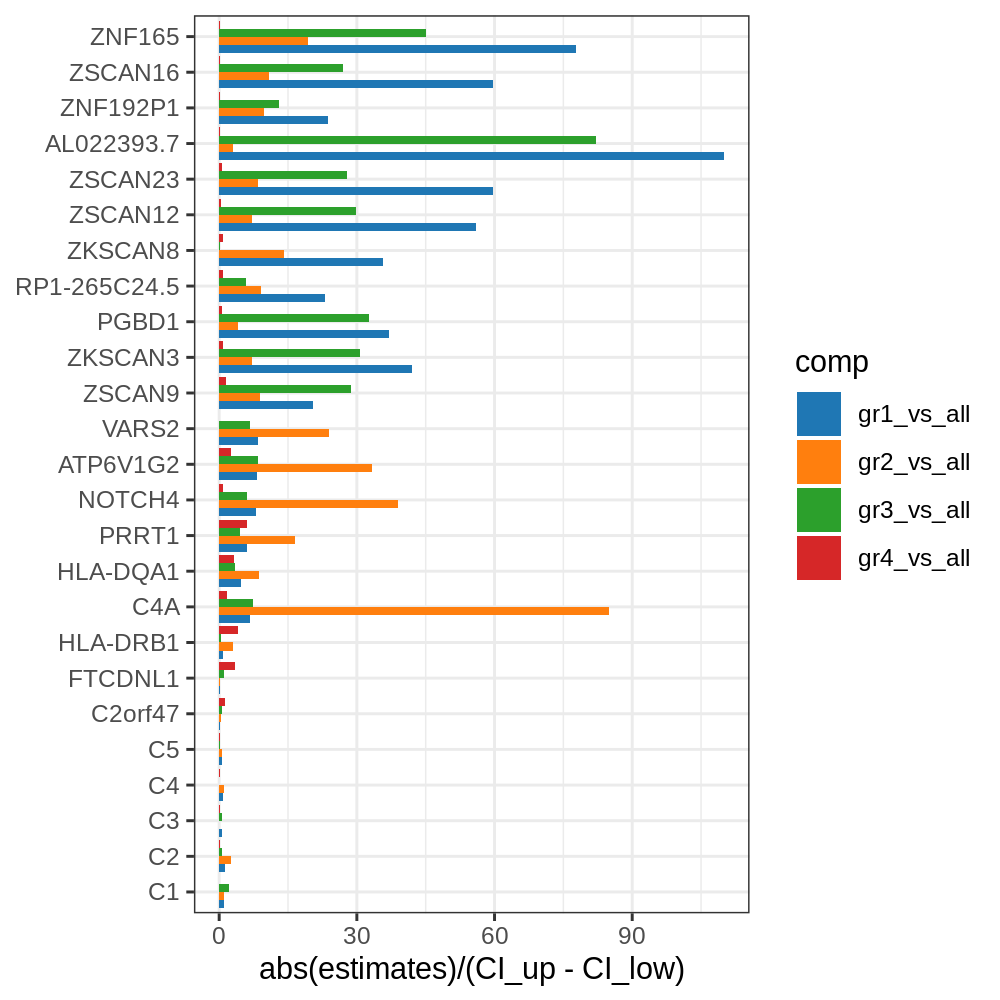

In [11]:
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 200)

# compare effect size covariates and genes:
feat_sign <- tscore_tot %>% 
    dplyr::filter(pval_corr <= 0.01, tissue == "DLPC_CMC") %>%
    dplyr::arrange(pval, estimates) %>%
    dplyr::group_by(comp) %>%
    dplyr::slice_head(n=5)
feat_sign$pval

df_feat_plot <- tscore_tot[tscore_tot$new_id %in% feat_sign$new_id, ] %>%
    dplyr::mutate(type = "Genes")

df_feat_plot %>% 
    group_by(feat) %>%
    summarise(max_gr = max(abs(estimates)/(CI_up - CI_low)), 
              max_gr_id = comp[which.max(abs(estimates)/(CI_up - CI_low))]) %>%
    arrange(max_gr)

cov_sign <- tscore_feat$test_cov$cov[tscore_feat$test_cov$pval_corr <= 0.05 & 
                                     tscore_feat$test_cov$test_type == "Wilcoxon"]
df_cov_plot <- tscore_feat$test_cov %>% 
    dplyr::filter(cov %in% cov_sign) %>%
    dplyr::mutate(tissue = NA, short = NA, new_id = cov, type = "Covariates") %>%
    dplyr::rename(feat = cov)

df_cov_plot %>% 
    group_by(feat) %>%
    summarise(max_gr = max(abs(estimates)/(CI_up - CI_low)), 
              max_gr_id = comp[which.max(abs(estimates)/(CI_up - CI_low))]) %>%
    arrange(max_gr)

df_plot <- bind_rows(df_feat_plot, df_cov_plot) 
df_plot$feat <- factor(df_plot$feat, 
                       levels = c(unique(cov_sign), 
                                  unique(df_feat_plot$feat[order(df_feat_plot$comp, 
                                                                 abs(df_feat_plot$estimates))])))


pl1 <- ggplot(df_plot, aes(x = abs(estimates)/(CI_up - CI_low), y = feat, fill = comp)) + 
    geom_bar(stat = "identity", position = position_dodge()) + 
    #facet_wrap(.~type, ncol = 1, scales = "free_y") +
    scale_fill_manual(values = gr_color) + 
    theme_bw() +
    theme(axis.title.y = element_blank())
pl1

#pl2 <- ggplot(df_plot, aes(x = -log10(pval), y = feat, fill = comp)) + 
#    geom_bar(stat = "identity", position = position_dodge()) + 
#    #facet_wrap(.~type, ncol = 1, scales = "free_y") +
#    scale_fill_manual(values = gr_color) + 
#    theme_bw() +
#    theme(axis.title.y = element_blank())

#pl <- ggarrange(plotlist = list(pl1, pl2), ncol = 2, common.legend = TRUE)
#pl
ggsave(filename = sprintf('%sest_frac_CI_genes_and_PCs_%s_%s.pdf', outFold, type_data, type_input), 
       plot = pl1, width = 5, height = 5, dpi = 200)
    

In [12]:
# get info
geneInfo <- list()
for(idt in 1:length(tissues_name)){
    t <- tissues_name[idt]
    tmp <- fread(geneInfo_file[idt], data.table = F, h=T, stringsAsFactors = F)
    tmp$short <- df_match$short[df_match$tissue == t]
    tmp$new_id <- paste(tmp$external_gene_name, df_match$short[df_match$tissue == t])
    geneInfo[[idt]] <- tmp
}
geneInfo <- do.call(rbind, geneInfo)
geneInfo <- geneInfo[match(tscore_tot$new_id, geneInfo$new_id),]

length(unique(tscore_tot$new_id))
length(unique(tscore_tot$feat))
nrow(loci_tissues)
nrow(loci_all)


[1] 26836

[1] 12604

[1] 124

[1] 55

[1] "significant genes in MHC across all tissues:  out of 755"
[1] "percentage genes in MHC across all tissues: "


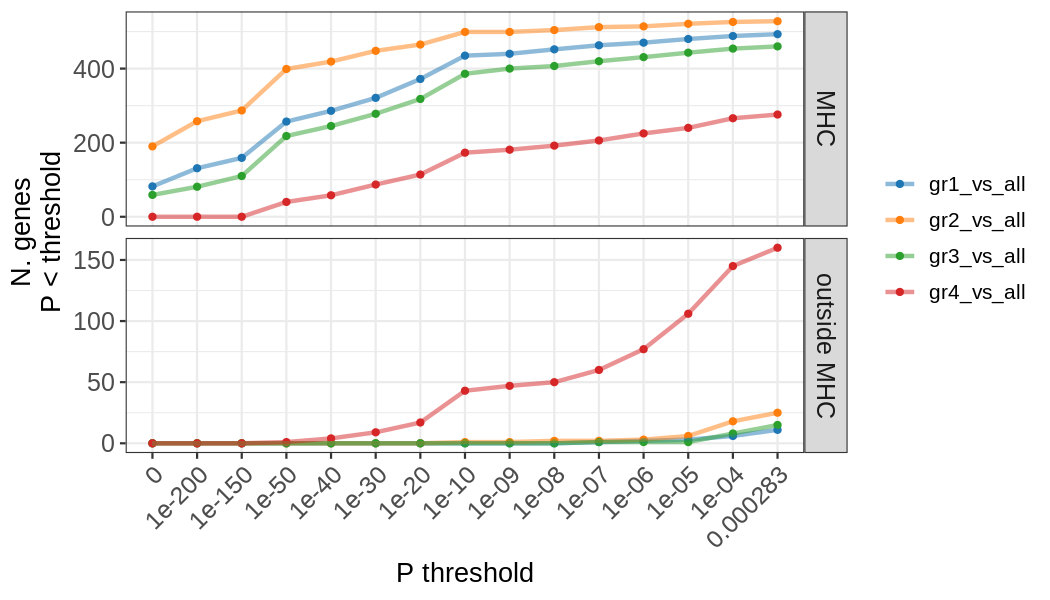

In [13]:
# plot count n. significant genes
options(repr.plot.width = 7, repr.plot.height = 4, repr.plot.res = 150)

genes_MHC <- strsplit(loci_all$gene[loci_all$loci_id == 'chr6:24.4-34.9Mb'], split = ',')[[1]]
# percentage of group-specifc genes located in MHC:
print(paste('significant genes in MHC across all tissues:', loci_all$ngenes_withrep[loci_all$loci_id == 'chr6:24.4-34Mb'], 'out of', sum(loci_all$ngenes_withrep)))
print(paste('percentage genes in MHC across all tissues:', loci_all$ngenes_withrep[loci_all$loci_id == 'chr6:24.4-34Mb']/sum(loci_all$ngenes_withrep)))

tscore_tot <- do.call(rbind, tscore_feat$test_feat)
comp <- paste0(gr_tot, '_vs_all')
cl_genes_sign <- tscore_tot[tscore_tot$pval_corr <= pval_corr_thr, ]
cl_genes_sign$class <- 'outside MHC'
cl_genes_sign$class[cl_genes_sign$feat %in% genes_MHC] <- 'MHC'
cl_genes_sign$class <- factor(cl_genes_sign$class, levels = c('MHC', 'outside MHC'))

thr_values <- c(0, 1e-200, 1e-150, 1e-50, 1e-40,1e-30, 1e-20,  
         1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, max(cl_genes_sign$pval))
tmp1 <- unlist(lapply(thr_values, function(x) 
              lapply(comp, function(y) sum(cl_genes_sign$pval <= x & cl_genes_sign$comp == y & cl_genes_sign$class == 'outside MHC'))))
tmp2 <- unlist(lapply(thr_values, function(x) 
              lapply(comp, function(y) sum(cl_genes_sign$pval <= x & cl_genes_sign$comp == y & cl_genes_sign$class == 'MHC'))))
count_thr_pval <- data.frame(count = c(tmp1, tmp2), comp = rep(rep(comp, length(thr_values)), 2), 
                             thr = rep(unlist(lapply(thr_values, function(x) rep(x, length(comp)))), 2), 
                              class = c(rep('outside MHC', length(tmp1)), rep('MHC', length(tmp2))))                                 
count_thr_pval$thr <- factor(as.character(count_thr_pval$thr), 
                               levels = as.character(thr_values))
count_thr_pval$class <- factor(count_thr_pval$class, levels = c('MHC', 'outside MHC'))

pl <- ggplot(data=count_thr_pval, aes(x=thr, y=count, group = comp, color = comp)) +
      geom_point(size = 1.2, alpha = 1)+
      geom_line(size = 1, alpha = 0.5)+
      facet_wrap(class~., scales = 'free_y',ncol =  1, strip.position="right")+
      xlab('P threshold')+
      ylab('N. genes\nP < threshold')+
      scale_color_manual(values = color_gr)+
      theme_bw()+theme(legend.position = "right",
                       strip.text = element_text(size = 12),
                       legend.title = element_blank(),
                       legend.text = element_text(size=10),
                       axis.title = element_text(size=13),
                       axis.text = element_text(size=12), axis.text.x = element_text(angle = 45, hjust = 1))
pl
ggsave(filename = sprintf('%sgenesP_FDRthr0.01_count.pdf', outFold), width = 7, height = 4.2,  plot = pl, device = 'pdf')


gr  sp_corr    sp_corr_pval
1 gr1  0.8849012 0.000000e+00
2 gr2 -0.9397242 0.000000e+00
3 gr3  0.1348165 3.262643e-03
4 gr4  0.2978678 2.702089e-10

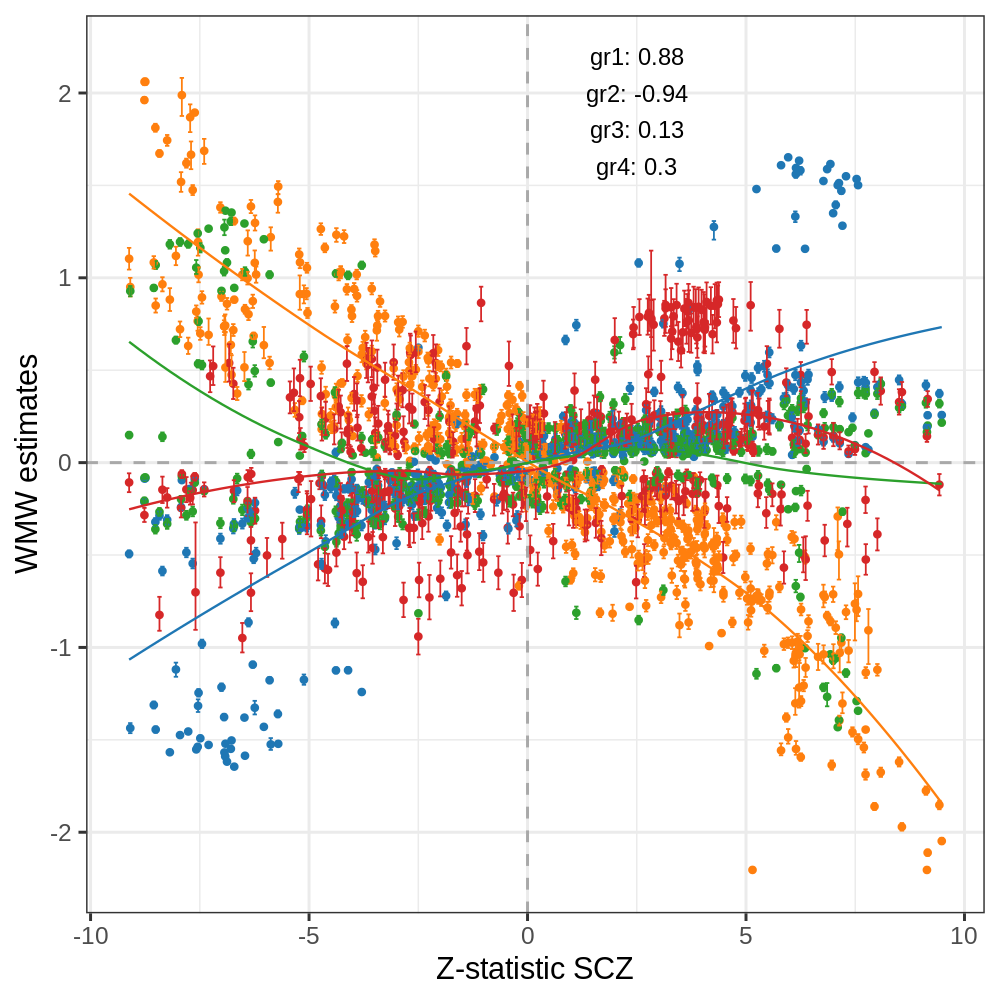

In [14]:
######################################################################
### plot Z-stat versus WMW estimates in tissue used for clustering ###
######################################################################

options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 200)
res_pval <- do.call(rbind, tscore_feat$res_pval)
colnames(res_pval)[7] <- 'Zstat'
res_pval$feat_tisse <- paste0(res_pval$external_gene_name,'_', res_pval$tissue)
cl_genes_sign$feat_tissue <- paste0(cl_genes_sign$feat,'_', cl_genes_sign$tissue)
cl_genes_sign$Zstat <- res_pval$Zstat[match(cl_genes_sign$feat_tissue, res_pval$feat_tisse)]
cl_genes_sign$gr <- unname(sapply(cl_genes_sign$comp, function(x) strsplit(x, split = '_vs_all')[[1]]))
cl_genes_sign$gr <- factor(cl_genes_sign$gr)

# only significant
df_corr <- cl_genes_sign %>% 
  group_by(gr) %>% 
  summarise(sp_corr = cor(Zstat, estimates, method = 'spearman'), 
            sp_corr_pval = cor.test(Zstat, estimates, method = 'spearman')$p.value)
                                        
df_corr <- as.data.frame(df_corr)
df_corr                                  
df_corr$label <- paste(df_corr$gr,round(df_corr$sp_corr, digits = 2), sep = ': ')
df_corr$x <- 2.5
df_corr$y <- c(2.2,2,1.8, 1.6)

pl1 <-  ggplot(cl_genes_sign, aes(x = Zstat, y = estimates, color = gr, ymin = CI_low, ymax =CI_up))+
  geom_point(size = 0.8)+geom_errorbar(width = 0.1, size = 0.3)+
  ylab('WMW estimates')+xlab('Z-statistic SCZ')+
  geom_vline(xintercept = 0, linetype = 'dashed', color = 'darkgrey')+
  geom_hline(yintercept = 0, linetype = 'dashed', color = 'darkgrey')+
  geom_smooth(method = 'loess', formula = y~x, se = F, size = 0.4)+
  # geom_smooth(method = 'lm', formula = y~x, se = F, size = 0.4)+
  # scale_color_d3()+
  #geom_text(aes(x=x, y=y, label=label, color = gr))+
  annotate("text", x = df_corr$x, y = df_corr$y, label = df_corr$label, size=3)+
  scale_color_d3()+
  theme_bw()+theme(legend.position = 'none', legend.title = element_blank())
ggsave(filename = sprintf('%stscoreOriginal_tscoreCluster%s_compare_Zstat_est.pdf',outFold,type_cluster), 
       width = 4.5, height = 4.5, plot = pl1, device = 'pdf')

# print:
pl1
               

In [15]:
# count sign. pathways
# remove pathway with opposite effect sign across tissues

tot <- do.call(rbind, pathway_feat$test_feat)
tot %>% group_by(comp) %>% summarise(count = n())

path_tot_res <- tot %>% filter(pval_corr <= pval_corr_thr)
nrow(path_tot_res)
gr <- sort(unique(path_tot_res$comp))
n_gr <- length(gr)

path_gr_res <- lapply(1:n_gr, function(x) path_tot_res[path_tot_res$comp == sprintf('gr%i_vs_all', x),])
# remove discordant results in sign
for(i in 1:n_gr){
  tmp <- path_gr_res[[i]]
  dup_path <- names(which(table(tmp$feat) > 1))
  if(length(dup_path)>0){
    rm_path <- c()
    for(j in 1:length(dup_path)){
      tmp_path <- tmp %>% filter(feat == dup_path[j])
      if(!(all(tmp_path$estimates > 0) | all(tmp_path$estimates < 0))){
        rm_path <- c(rm_path, dup_path[j])
      }
    }
    path_gr_res[[i]] <- path_gr_res[[i]][!path_gr_res[[i]]$feat %in% rm_path,]
  }
}

path_gr_res <- do.call(rbind, path_gr_res)
nrow(path_gr_res)
path_gr_res %>% group_by(comp) %>% summarise(count = n())
length(unique(path_gr_res$feat))
a = path_gr_res %>% group_by(tissue) %>% summarise(count = length(unique(feat)))
sum(a$count)
                      

comp       count
1 gr1_vs_all 6120 
2 gr2_vs_all 6120 
3 gr3_vs_all 6120 
4 gr4_vs_all 6120

[1] 1145

[1] 1058

comp       count
1 gr1_vs_all 287  
2 gr2_vs_all 361  
3 gr3_vs_all 253  
4 gr4_vs_all 157

[1] 296

[1] 454

We tested 6120 pathways across 10 tissues, repeated 4 times i.e. for each group This resulted in 1145 significant associations across all groups and tissues. We the removed pathways shared among tissues but having a non concordant association sign which led to 1058 significant results: 287, 361, 253, 157, respectively for a total of 296 unique pathways (non tissue-specific!)

In [16]:
# from wiki and CMCset, remove pathways compoased on a single gene, then recompute FDR
remove_min_path <- function(output_path, min_n_genes = 2){
    ntissues <- length(output_path$tissues)
    for(i in 1:ntissues){
        id_rm <- output_path$res_pval[[i]]$ngenes_tscore < min_n_genes
        output_path$res_pval[[i]] <- output_path$res_pval[[i]][!id_rm,]
        output_path$test_feat[[i]] <- output_path$test_feat[[i]] %>%
            dplyr::filter(feat %in% output_path$res_pval[[i]]$path) %>%
            dplyr::group_by(comp) %>%
            dplyr::mutate(pval_corr = p.adjust(pval, method = "BH")) %>%
            dplyr::ungroup()
    }
    return(output_path)
}

pathway_feat_wiki <- remove_min_path(pathway_feat_wiki)
pathway_feat_CMCset <- remove_min_path(pathway_feat_CMCset)



In [17]:
# count sign. pathways for wiki
# remove pathway with opposite effect sign across tissues

wiki <- do.call(rbind, pathway_feat_wiki$test_feat)
wiki %>% group_by(comp) %>% summarise(count = n())

path_wiki_res <- wiki %>% filter(pval_corr <= pval_corr_thr)
paste("significant results across groups and tissues:", nrow(path_wiki_res))
gr <- sort(unique(path_wiki_res$comp))
n_gr <- length(gr)

wiki_gr_res <- lapply(1:n_gr, function(x) path_wiki_res[path_wiki_res$comp == sprintf('gr%i_vs_all', x),])
# remove discordant results in sign
for(i in 1:n_gr){
  tmp <- wiki_gr_res[[i]]
  dup_path <- names(which(table(tmp$feat) > 1))
  if(length(dup_path)>0){
    rm_path <- c()
    for(j in 1:length(dup_path)){
      tmp_path <- tmp %>% filter(feat == dup_path[j])
      if(!(all(tmp_path$estimates > 0) | all(tmp_path$estimates < 0))){
        rm_path <- c(rm_path, dup_path[j])
      }
    }
    wiki_gr_res[[i]] <- wiki_gr_res[[i]][!wiki_gr_res[[i]]$feat %in% rm_path,]
  }
}

wiki_gr_res <- do.call(rbind, wiki_gr_res)
paste("significant results across groups and tissues with same tissue sign:", nrow(wiki_gr_res))
wiki_gr_res %>% group_by(comp) %>% summarise(count = n())
paste("unique pathways:", length(unique(wiki_gr_res$feat)))
a = wiki_gr_res %>% group_by(tissue) %>% summarise(count = length(unique(feat)))
paste("all pathways:", sum(a$count))
                      

comp       count
1 gr1_vs_all 2594 
2 gr2_vs_all 2594 
3 gr3_vs_all 2594 
4 gr4_vs_all 2594

[1] "significant results across groups and tissues: 666"

[1] "significant results across groups and tissues with same tissue sign: 554"

comp       count
1 gr1_vs_all 147  
2 gr2_vs_all 184  
3 gr3_vs_all 130  
4 gr4_vs_all  93

[1] "unique pathways: 86"

[1] "all pathways: 257"

In [18]:
# count sign. pathways for CMC geneset
# remove pathway with opposite effect sign across tissues

CMCset <- do.call(rbind, pathway_feat_CMCset$test_feat)
CMCset %>% group_by(comp) %>% summarise(count = n())

path_CMCset_res <- CMCset %>% filter(pval_corr <= pval_corr_thr)
paste("significant results across groups and tissues:", nrow(path_CMCset_res))
gr <- sort(unique(path_CMCset_res$comp))
n_gr <- length(gr)

CMCset_gr_res <- lapply(1:n_gr, function(x) path_CMCset_res[path_CMCset_res$comp == sprintf('gr%i_vs_all', x),])
# remove discordant results in sign
for(i in 1:n_gr){
  tmp <- CMCset_gr_res[[i]]
  dup_path <- names(which(table(tmp$feat) > 1))
  if(length(dup_path)>0){
    rm_path <- c()
    for(j in 1:length(dup_path)){
      tmp_path <- tmp %>% filter(feat == dup_path[j])
      if(!(all(tmp_path$estimates > 0) | all(tmp_path$estimates < 0))){
        rm_path <- c(rm_path, dup_path[j])
      }
    }
    CMCset_gr_res[[i]] <- CMCset_gr_res[[i]][!CMCset_gr_res[[i]]$feat %in% rm_path,]
  }
}

CMCset_gr_res <- do.call(rbind, CMCset_gr_res)
paste("significant results across groups and tissues with same tissue sign:", nrow(CMCset_gr_res))
CMCset_gr_res %>% group_by(comp) %>% summarise(count = n())
paste("unique pathways:", length(unique(CMCset_gr_res$feat)))
a = CMCset_gr_res %>% group_by(tissue) %>% summarise(count = length(unique(feat)))
paste("all pathways:", sum(a$count))
                      

comp       count
1 gr1_vs_all 271  
2 gr2_vs_all 271  
3 gr3_vs_all 271  
4 gr4_vs_all 271

[1] "significant results across groups and tissues: 100"

[1] "significant results across groups and tissues with same tissue sign: 100"

comp       count
1 gr1_vs_all 25   
2 gr2_vs_all 56   
3 gr3_vs_all 18   
4 gr4_vs_all  1

[1] "unique pathways: 59"

[1] "all pathways: 59"


          Brain_Caudate_basal_ganglia           Brain_Cerebellar_Hemisphere 
                                   65                                   154 
                     Brain_Cerebellum                          Brain_Cortex 
                                  196                                    72 
             Brain_Frontal_Cortex_BA9                     Brain_Hippocampus 
                                   60                                    74 
                   Brain_Hypothalamus Brain_Nucleus_accumbens_basal_ganglia 
                                   49                                    33 
    Cells_EBV-transformed_lymphocytes                              DLPC_CMC 
                                   67                                   288 

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


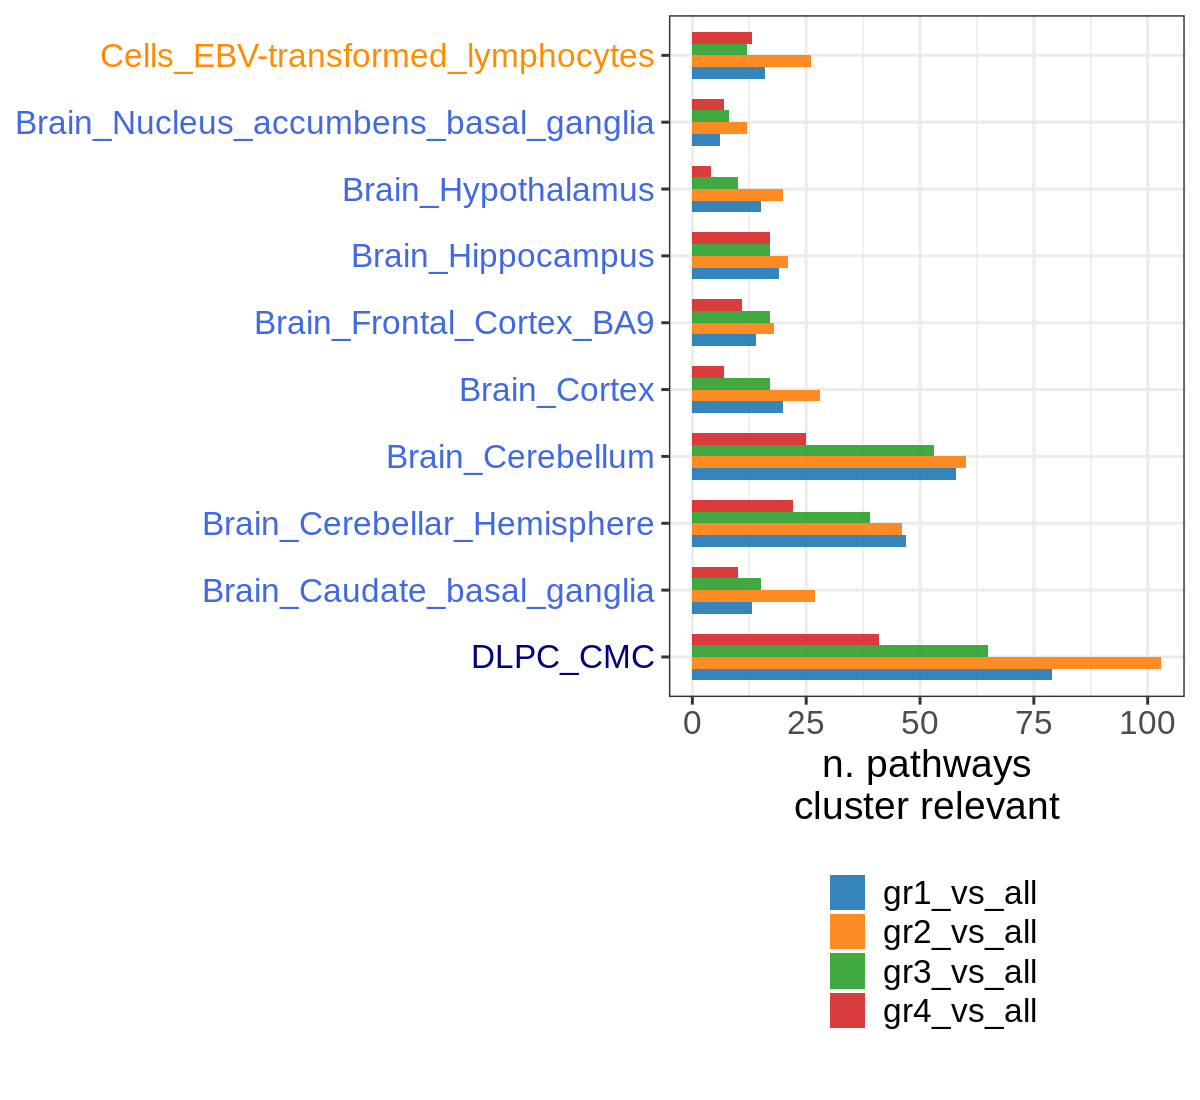

In [19]:
### plot count significant pathways ###
options(repr.plot.width = 6, repr.plot.height = 5.5, repr.plot.res = 200)

tmp <- path_gr_res %>% 
    mutate(tissue = factor(tissue, levels = tissues_name), 
           comp = factor(comp, levels = paste0(gr_tot, '_vs_all')))
df <- tmp %>% group_by(tissue, comp) %>% tally()
newcolours <-  color_tissues$color[match(tissues_name, color_tissues$tissues)]
color_gr <- pal_d3("category10")(length(gr_tot))
table(path_gr_res$tissue)

pl <- ggplot(data = df, aes(x = tissue, y = n, fill = comp))+
  geom_bar(alpha = 0.9, width = 0.7, stat = 'identity', position = position_dodge())+
  ylab('n. pathways\ncluster relevant')+ 
  theme_bw()+ 
  theme(legend.position = 'bottom', legend.key.size = unit(0.5, "cm"), 
        legend.text = element_text(size = 12), legend.title = element_blank(), 
        axis.title.y = element_blank(),  axis.title.x = element_text(size = 14), 
        axis.text.y = element_text(colour = newcolours, size = 12), 
        axis.text.x = element_text(size = 12))+
  guides(fill=guide_legend(nrow=5))+
  scale_fill_manual(values = color_gr)+
  # scale_fill_d3()+
  coord_flip() 
pl

ggsave(filename = sprintf('%scluster_npathways_alltissues_%s_%s.pdf', outFold, type_data, type_input), 
       plot = pl, width = 6, height = 5.5, dpi = 200)

In [20]:
### function to get improvement of pathways from genes ###
get_improvement <- function(pathway_test, tscore_test, gr, t, pathway_struct){
    
    tmp_path <- pathway_test %>% 
    filter(comp %in% gr, tissue %in% t) %>%
    mutate(db = pathway_struct$name[match(feat,pathway_struct$path)], 
           genes = pathway_struct$gene_name[match(feat,pathway_struct$path)], 
           pval_genes = NA, estimates_genes = NA, improvement = NA, 
           diff_pval_bestgene = NA, ngenes = NA) %>%
    filter(!is.na(genes))
    
    tmp_tscore <- tscore_test %>% filter(comp %in% gr, tissue %in% t)
    if(nrow(tmp_path)>0){
    for(i in 1:nrow(tmp_path)){

        genes <- strsplit(tmp_path$genes[i], split = ',')[[1]]
        filt_genes <- tmp_tscore[match(genes, tmp_tscore$feat),]
        tmp_path$improvement[i] <- all(tmp_path$pval[i] < filt_genes$pval) 
        tmp_path$pval_genes[i] <- paste0(filt_genes$pval, collapse = ',') 
        tmp_path$estimates_genes[i] <- paste0(round(filt_genes$estimates, digits = 5), collapse = ',') 
        tmp_path$diff_pval_bestgene[i] <- tmp_path$pval[i] - min(filt_genes$pval)
        tmp_path$ngenes[i] <- length(genes)
    }
    }
    
    return(tmp_path)

}


In [21]:
# get pathway structure (wiki and CMCgene set)
get_path_list <- function(path_structure, path_structure_name){
  df <- data.frame(path = sapply(path_structure[[1]], function(x) x$path$path), 
                   ngenes_tscore = sapply(path_structure[[1]], function(x) x$path$ngenes_tscore), 
                   ngenes_path = sapply(path_structure[[1]], function(x) x$path$ngenes_path))
  df$coverage <- df$ngenes_tscore/df$ngenes_path
  
  df$gene_name <- sapply(path_structure[[1]], function(x) paste0(x$tscore$external_gene_name, collapse = ','))
  df$name <- path_structure_name
  return(df)  
}

path_wiki_struct <- list()
for(i in seq_len(length(tissues_name))){
    t <- tissues_name[i]
    wiki_pvalresFile <- sprintf('Meta_Analysis_SCZ/%s/pval_Dx_pheno_covCorr_customPath_WikiPath2019Human.RData', t)
    wiki_pval <- get(load(wiki_pvalresFile))
    path_wiki_struct[[i]] <- get_path_list(wiki_pval$info_pathScore, 'WikiPathways')
    path_wiki_struct[[i]]$tissue <- t
}
                         
CMCSet_struct <- list()
t <- "DLPC_CMC"
CMCSet_pvalresFile <- 'Meta_Analysis_SCZ/DLPC_CMC/pval_Dx_pheno_covCorr_customPath_CMC_GeneSets.RData'
CMCSet_pval <- get(load(CMCSet_pvalresFile))
CMCSet_struct <- get_path_list(CMCSet_pval$info_pathScore, 'CMCGeneSet')
CMCSet_struct$tissue <- t                         


In [22]:
gr_tot <- paste0('gr', sort(unique(clust_res$cl_best$gr)))
pathway_test <- path_gr_res
tscore_test <-  do.call(rbind, tscore_feat$test_feat)

path_anno <- list()
for(idg in 1:length(gr_tot)){

    gr <- paste0(gr_tot[idg], '_vs_all')
    print(gr)
    tmp <- list()
    for(idt in 1:length(tissues_name)){
        t <- tissues_name[idt]
        pathway_struct <- read.table(sprintf('clustering_res_matchUKBB_corrPCs/%s/selected_pathways_JSthr0.2.txt', t), h=T, stringsAsFactors = F)
        tmp[[idt]] <- get_improvement(path_gr_res, tscore_test, gr, t, pathway_struct)
    }
    path_anno[[idg]] <- do.call(rbind, tmp)
}
path_anno <- do.call(rbind, path_anno)
path_anno$genes_in_mhc <- NA
for(i in 1:nrow(path_anno)){

    genes <- strsplit(path_anno$genes[i], split = ',')[[1]]
    t <- path_anno$tissue[i]
    tmp <- geneInfo[geneInfo$external_gene_name %in% genes, ]
    tmp <- tmp[!duplicated(tmp$ensembl_gene_id), ]
    path_anno$genes_in_mhc[i] <- F
    if(any(tmp$chrom == 'chr6' & tmp$start_position >= 26000000 & tmp$end_position <= 34000000)){
        path_anno$genes_in_mhc[i] <- T
    }
    
}

[1] "gr1_vs_all"
[1] "gr2_vs_all"
[1] "gr3_vs_all"
[1] "gr4_vs_all"


In [23]:
table(path_anno$genes_in_mhc, path_anno$improvement)

       
        FALSE TRUE
  FALSE    32   28
  TRUE    991    7

In [24]:
wiki_anno <- list()
for(idg in 1:length(gr_tot)){

    gr <- paste0(gr_tot[idg], '_vs_all')
    print(gr)
    tmp <- list()
    for(idt in 1:length(tissues_name)){
        t <- tissues_name[idt]
        pathway_struct <- path_wiki_struct[[idt]]
        tmp[[idt]] <- get_improvement(wiki_gr_res, tscore_test, gr, t, pathway_struct)
    }
    wiki_anno[[idg]] <- do.call(rbind, tmp)
}
wiki_anno <- do.call(rbind, wiki_anno)
wiki_anno$genes_in_mhc <- NA
for(i in 1:nrow(wiki_anno)){

    genes <- strsplit(wiki_anno$genes[i], split = ',')[[1]]
    t <- wiki_anno$tissue[i]
    tmp <- geneInfo[geneInfo$external_gene_name %in% genes, ]
    tmp <- tmp[!duplicated(tmp$ensembl_gene_id), ]
    wiki_anno$genes_in_mhc[i] <- F
    if(any(tmp$chrom == 'chr6' & tmp$start_position >= 26000000 & tmp$end_position <= 34000000)){
        wiki_anno$genes_in_mhc[i] <- T
    }
    
}

[1] "gr1_vs_all"
[1] "gr2_vs_all"
[1] "gr3_vs_all"
[1] "gr4_vs_all"


In [25]:
table(wiki_anno$genes_in_mhc, wiki_anno$improvement)

       
        FALSE TRUE
  FALSE     9    9
  TRUE    528    8

In [26]:
CMCSet_anno <- list()
for(idg in 1:length(gr_tot)){

    gr <- paste0(gr_tot[idg], '_vs_all')
    print(gr)
    t <- "DLPC_CMC"
    pathway_struct <- CMCSet_struct
    tmp <- get_improvement(CMCset_gr_res, tscore_test, gr, t, pathway_struct)
    CMCSet_anno[[idg]] <- tmp
}
CMCSet_anno <- do.call(rbind, CMCSet_anno)
CMCSet_anno$genes_in_mhc <- NA
for(i in 1:nrow(CMCSet_anno)){

    genes <- strsplit(CMCSet_anno$genes[i], split = ',')[[1]]
    t <- CMCSet_anno$tissue[i]
    tmp <- geneInfo[geneInfo$external_gene_name %in% genes, ]
    tmp <- tmp[!duplicated(tmp$ensembl_gene_id), ]
    CMCSet_anno$genes_in_mhc[i] <- F
    if(any(tmp$chrom == 'chr6' & tmp$start_position >= 26000000 & tmp$end_position <= 34000000)){
        CMCSet_anno$genes_in_mhc[i] <- T
    }
    
}



[1] "gr1_vs_all"
[1] "gr2_vs_all"
[1] "gr3_vs_all"
[1] "gr4_vs_all"


In [27]:
table(path_anno$pval_corr <= 0.01, path_anno$improvement)
a=path_anno[path_anno$pval_corr <= 0.01 & path_anno$improvement,]
table(a$comp)
b = path_anno %>% dplyr::filter(improvement, !genes_in_mhc, pval_corr <= 0.01) %>% dplyr::arrange(estimates)
dim(b)
length(unique(b$feat))
b
# path_anno[!path_anno$genes_in_mhc & !path_anno$improvement, ]

      
       FALSE TRUE
  TRUE  1023   35


gr1_vs_all gr2_vs_all gr3_vs_all gr4_vs_all 
         9          8          9          9 

[1] 28 17

[1] 25

feat                                                                                           
1  Golgi cisterna membrane                                                                        
2  cellular respiration                                                                           
3  oxidoreductase activity, acting on the aldehyde or oxo group of donors, NAD or NADP as acceptor
4  mRNA processing                                                                                
5  negative regulation of cell cycle                                                              
6  cell projection organization                                                                   
7  peristalsis                                                                                    
8  antiporter activity                                                                            
9  cell motility                                                                                  
10 cellular response to transforming growth factor beta stimulus                                  
11 tetrahydrofolate biosynthetic process                                                          
12 protein import into nucleus                                                                    
13 phospholipid homeostasis                                                                       
14 nucleotide biosynthetic process                                                                
15 lactation                                                                                      
16 DNA damage response, detection of DNA damage                                                   
17 nucleotide biosynthetic process                                                                
18 guanyl nucleotide binding                                                                      
19 response to stimulus                                                                           
20 antiporter activity                                                                            
21 cell migration                                                                                 
22 cell projection organization                                                                   
23 Histidine, lysine, phenylalanine, tyrosine, proline and tryptophan catabolism                  
24 cellular response to tumor necrosis factor                                                     
25 Translesion synthesis by Y family DNA polymerases bypasses lesions on DNA template             
26 microtubule cytoskeleton organization                                                          
27 mitochondrial intermembrane space                                                              
28 CS/DS degradation                                                                              
   comp       pval     estimates   CI_low      CI_up       pval_corr   
1  gr4_vs_all 6.63e-06 -0.20648598 -0.29592809 -0.11701039 4.069162e-04
2  gr4_vs_all 1.26e-05 -0.19951095 -0.28828190 -0.11035170 7.694400e-04
3  gr4_vs_all 1.23e-05 -0.19927712 -0.28797305 -0.10998316 6.710333e-04
4  gr4_vs_all 9.32e-06 -0.19726986 -0.28424821 -0.11025096 2.211947e-04
5  gr4_vs_all 1.86e-04 -0.16628152 -0.25362236 -0.07916710 8.311024e-03
6  gr1_vs_all 2.40e-07 -0.07078849 -0.09762656 -0.04392249 4.003404e-06
7  gr2_vs_all 2.24e-04 -0.06360028 -0.09739054 -0.02983622 3.764844e-03
8  gr3_vs_all 4.58e-06 -0.06331574 -0.09036965 -0.03622218 1.498314e-04
9  gr1_vs_all 1.84e-05 -0.06016829 -0.08768134 -0.03263963 2.729333e-04
10 gr2_vs_all 5.67e-04 -0.06000109 -0.09416691 -0.02587119 6.853304e-03
11 gr3_vs_all 2.35e-05 -0.05868953 -0.08591853 -0.03148598 3.961429e-04
12 gr2_vs_all 8.13e-04 -0.05721530 -0.09075260 -0.02370157 8.415263e-03
13 gr1_vs_all 1.64e-04 -0.05237187 -0.07955533 -0.02514762 3.754469e-03
14 gr3_vs_all 2.78e-04 -0.05099216 -0.07846880 -0.02352221 4.112302e-03
15 gr3_vs_all 2.98e-04 -0.05003638 -0.07714926 -0.02

In [28]:
CMCSet_anno[CMCSet_anno$pval_corr <= 0.01 & !CMCSet_anno$genes_in_mhc,]
wiki_anno[wiki_anno$pval_corr <= 0.01 & !wiki_anno$genes_in_mhc & wiki_anno$improvement,]

feat                                                            comp      
1 HBA:Lateral_Hemisphere_localMarker(top200)_IN_Cerebellar_Cortex gr2_vs_all
2 GWAS:PGC2 SCZ                                                   gr4_vs_all
  pval     estimates   CI_low     CI_up       pval_corr   pval_corr_overall
1 1.47e-03  0.05465832  0.0209698  0.08828216 7.11375e-03 1.42800e-02      
2 4.23e-15 -0.36475462 -0.4551152 -0.27431932 1.14633e-12 1.53408e-13      
  tissue   db        
1 DLPC_CMC CMCGeneSet
2 DLPC_CMC CMCGeneSet
  genes                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
1 DFFB,TSTD1,EPCAM,ROBO1,SNCA,CCNO,CNOT8,KIAA0319,LRRC16A,MRAP2,OSTM1,PPIL6,WIPF3,DPY19L1,CDK6,C8orf34,TRIB1,ST3GAL1,TEK,GOLM1,ASS1,ATOH7,EXOC6,CRTAC1,VAX1,LRRC56,C1RL,LGALS3,WFIKKN1,MGRN1,TMEM132E,SSTR2,RBBP8,CABP7                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
2 SLC45A1,CD46,SDCCAG8,FANCL,CYP26B1,DPP4,ANKRD44,SF3B1,HSPD1,TYW5,C2orf47,CUL3,EFHD1,GIGYF2,C2orf82,TRANK1,NISCH,NT5DC2,GNL3,GLT8D1,NEK4,TMEM110,THOC7,PPP2R3A,PCCB,SLC35G2,NCK1,DNAJC19,SLC39A8,NEK1,CLCN3,C4orf27,MAN2A1,KDM3B,REEP2,CTNNA1,CD14,NDUFA2,WDR55,ZMAT2,PCDHA2,PCDHA4,PCDHA6,PCDHA7,PCDHA8,PCDHA9,PCDHA10,GALNT10,SNAP91,FUT9,MAD1L1,MPP6,DFNA5,OSBPL3,EPHX2,TSNARE1,ARL3,WBP1L,C10orf32,AS3MT,CNNM2,NT5C2,INA,PCGF6,ZNF408,SNX19,TMTC1,STAT6,OGFOD2,MPHOSPH9,CDK2AP1,RGS6,TRMT61A,KLC1,PPP1R13B,IREB2,PSMA4,ADAMTSL3,EFTUD1P1,UBE2Q2P1,ZSCAN2,MAN2A2,GRIN2A,INO80E,DOC2A,MAPK3,ENKD1,RANBP10,NFATC3,PLA2G15,SLC7A6,SRR,TSR1,SGSM2,TOM1L2,ATPAF2,DRG2,MYO15A,NCAN,MAU2,GATAD2A,YJEFN3,EP300,CHADL,RANGAP1,LINC00634,WBP2NL,NAGA,NDUFA6
  pval_genes                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
1 0.332,0.31,0.0157,0.61,0.949,0.377,0.972,3.14e-06,3.14e-83,0.661,0.579,0.0372,0.755,0.31,0.0578,0.649,0.897,0.00173,0.133,0.479,0.287,0.333,0.866,0.939,0.728,0.231,0.43,0.157,0.218,0.169,0.807,0.0341,0.979,0.166                                                                                                                                                                                                                                                                                                                                     

feat                                                        comp      
1 Aryl Hydrocarbon Receptor WP2586                            gr1_vs_all
2 Disorders of Folate Metabolism and Transport WP4259         gr3_vs_all
3 Amino Acid metabolism WP3925                                gr3_vs_all
4 Disorders of Folate Metabolism and Transport WP4259         gr3_vs_all
5 Disorders of Folate Metabolism and Transport WP4259         gr3_vs_all
6 IL-5 Signaling Pathway WP127                                gr4_vs_all
7 SREBF and miR33 in cholesterol and lipid homeostasis WP2011 gr4_vs_all
8 Oxidative phosphorylation WP623                             gr4_vs_all
9 IL-2 Signaling Pathway WP49                                 gr4_vs_all
  pval     estimates   CI_low      CI_up       pval_corr   pval_corr_overall
1 3.43e-04 -0.04976493 -0.07697917 -0.02252208 0.005632421 5.666957e-03     
2 6.36e-06 -0.06335540 -0.09086018 -0.03587052 0.000072875 8.256000e-05     
3 2.08e-04 -0.05159707 -0.07887939 -0.02432638 0.003415579 3.676279e-03     
4 7.37e-04 -0.04703172 -0.07434476 -0.01970128 0.009658579 9.184154e-03     
5 1.18e-04 -0.05361051 -0.08085593 -0.02633117 0.003792857 4.899034e-03     
6 1.18e-04  0.16843707  0.08266174  0.25438050 0.003346909 2.135238e-03     
7 2.94e-04 -0.16171046 -0.24949803 -0.07405611 0.007056000 4.910769e-03     
8 4.18e-07 -0.23402047 -0.32404844 -0.14381399 0.000008360 8.833208e-06     
9 3.57e-07 -0.19806911 -0.28111392 -0.11808212 0.000011985 8.118444e-06     
  tissue                                db          
1 Brain_Cerebellum                      WikiPathways
2 Brain_Cerebellar_Hemisphere           WikiPathways
3 Brain_Cerebellum                      WikiPathways
4 Brain_Cortex                          WikiPathways
5 Brain_Nucleus_accumbens_basal_ganglia WikiPathways
6 Brain_Cerebellum                      WikiPathways
7 Brain_Cerebellum                      WikiPathways
8 Brain_Hippocampus                     WikiPathways
9 Cells_EBV-transformed_lymphocytes     WikiPathways
  genes                                                                    
1 PSRC1,GCLC,HRAS                                                          
2 ATIC,DHFR,FTCD                                                           
3 ACADM,SUCLG1,HIBCH,IDH1,CPS1,ADH5,GSR,ALDH18A1,GOT1,OAT,PDHX,FAH,CBS,FTCD
4 ATIC,DHFR,FTCD                                                           
5 ATIC,DHFR,FTCD                                                           
6 JAK1,FOXO3,LYN,MAPT                                                      
7 ABCA1,SIRT6,LDLR                                                         
8 NDUFS4,NDUFA2                                                            
9 LCK,MAPK3                                                                
  pval_genes                                                                              
1 0.00137,0.304,0.00985                                                                   
2 0.00318,0.0155,0.0113                                                                   
3 0.0939,0.171,0.787,0.69,0.00206,0.39,0.133,0.0786,0.144,0.922,0.0755,0.121,0.404,0.00644
4 0.249,0.0865,0.00135                                                                    
5 0.0102,0.14,0.00127                                                                     
6 0.545,0.109,0.0183,0.00445                                                              
7 0.0415,0.259,0.00509                                                                    
8 0.0185,7.87e-07                                                                         
9 0.0725,8.45e-07                                                                         
  estimates_genes                                                                                                        
1 -0.04446,-0.01459,-0.02042                                                                                             
2 -0.04036,-0.02743,-0.03398                              

35 pathways show any improvement and 28 pathways are composed of no genes in MHC locus (25 are unique)

In [29]:
# get pathway sign and create matrix
path_unique <- unique(path_anno$feat)
N_path <- length(unique(path_anno$feat))

feat_est <- matrix(NA, nrow = N_path, ncol = length(gr_tot))
feat_CIl <- matrix(NA, nrow = N_path, ncol = length(gr_tot))
feat_CIu <- matrix(NA, nrow = N_path, ncol = length(gr_tot))
feat_pvcorr <- matrix(NA, nrow = N_path ,ncol = length(gr_tot))
new_name <- vector(mode = 'numeric', length = N_path)


for(i in 1:N_path){
# i=269
path <- path_unique[i]
tmp <- tot %>% filter(feat %in% path)
tmp <- tmp %>% filter(pval_corr <= 0.01)
top_t <- tmp[order(tmp$pval), ]
top_t <- tmp[order(abs(tmp$estimates), decreasing = T),]

t <- top_t$tissue[1]
short <- get_short_name(t)
new_name[i] <- paste(path, short)

feat_est[i,] <- tot$estimates[tot$tissue == t & tot$feat == path]
feat_CIl[i,] <- tot$CI_low[tot$tissue == t & tot$feat == path]
feat_CIu[i,] <- tot$CI_up[tot$tissue == t & tot$feat == path]
feat_pvcorr[i,] <- tot$pval_corr[tot$tissue == t & tot$feat == path]

}

rownames(feat_est) <- rownames(feat_CIl) <- rownames(feat_CIu) <- rownames(feat_pvcorr) <- new_name
colnames(feat_est) <- colnames(feat_CIl) <- colnames(feat_CIu) <- colnames(feat_pvcorr) <- gr_tot

res_pval_path <- do.call(rbind, pathway_feat$res_pval) 
res_pval_path <- left_join(res_pval_path, df_match) %>%
    mutate(new_id = paste(path, short))
res_pval_est <- res_pval_path[match(new_name, res_pval_path$new_id), ]

# create summary table and save

tmp <- path_anno %>% mutate(new_id = paste0(feat, '_', tissue))
unique_feat <- unique(tmp$new_id)
df <- data.frame(pathway = rep(NA,length(unique_feat)) , collection = rep(NA,length(unique_feat)), 
                 tissue= rep(NA,length(unique_feat)),  genes= rep(NA,length(unique_feat)), 
                 improvement_g = rep(NA,length(unique_feat)),genes_in_mhc = rep(NA,length(unique_feat)), 
                 Zstat= rep(NA,length(unique_feat)), 
                 comp_sign= rep(NA,length(unique_feat)), 
                 WMW_est= rep(NA,length(unique_feat)), WMW_pvalue= rep(NA,length(unique_feat)))
for(i in 1:length(unique_feat)){
    
    tmp_i <- tmp %>% filter(new_id == unique_feat[i])
    df$pathway[i] <- tmp_i$feat[1]
    df$collection[i] <- tmp_i$db[1]
    df$tissue[i] <- tmp_i$tissue[1]
    df$genes[i] <- tmp_i$genes[1]
    df$improvement_g[i] <- paste0(tmp_i$improvement, collapse =  ',')
    df$genes_in_mhc[i] <- unique(tmp_i$genes_in_mhc)
    df$Zstat[i] <- res_pval_path$Dx_z[res_pval_path$path == tmp_i$feat[1] & 
                                              res_pval_path$tissue ==  tmp_i$tissue[1]]
    df$comp_sign[i] <- paste0(sapply(tmp_i$comp, function(x) strsplit(x, split = '_vs_all')[[1]]), collapse =  ',')
    df$WMW_est[i] <- paste0(round(tmp_i$estimates, 4), collapse =  ',')
    df$WMW_pvalue[i] <- paste0(tmp_i$pval, collapse =  ',')
    
}

write.table(df, file = 'clustering_res_matchUKBB_corrPCs/DLPC_CMC/pathOriginal_filtJS0.2_corrPCs_tscoreClusterCases_summary.txt', 
           quote = F, sep = '\t', col.names = T, row.names = F)
     

Joining, by = "tissue"



In [30]:
# create summary table and save (wiki)
res_pval_wiki <- do.call(rbind, pathway_feat_wiki$res_pval) 
res_pval_wiki <- left_join(res_pval_wiki, df_match) %>%
    mutate(new_id = paste(path, short))

tmp <- wiki_anno %>% mutate(new_id = paste0(feat, '_', tissue))
unique_feat <- unique(tmp$new_id)
df <- data.frame(pathway = rep(NA,length(unique_feat)) , collection = rep(NA,length(unique_feat)), 
                 tissue= rep(NA,length(unique_feat)),  genes= rep(NA,length(unique_feat)), 
                 improvement_g = rep(NA,length(unique_feat)),genes_in_mhc = rep(NA,length(unique_feat)), 
                 Zstat= rep(NA,length(unique_feat)), 
                 comp_sign= rep(NA,length(unique_feat)), 
                 WMW_est= rep(NA,length(unique_feat)), WMW_pvalue= rep(NA,length(unique_feat)))
for(i in 1:length(unique_feat)){
    
    tmp_i <- tmp %>% filter(new_id == unique_feat[i])
    df$pathway[i] <- tmp_i$feat[1]
    df$collection[i] <- tmp_i$db[1]
    df$tissue[i] <- tmp_i$tissue[1]
    df$genes[i] <- tmp_i$genes[1]
    df$improvement_g[i] <- paste0(tmp_i$improvement, collapse =  ',')
    df$genes_in_mhc[i] <- unique(tmp_i$genes_in_mhc)
    df$Zstat[i] <- res_pval_wiki$Dx_z[res_pval_wiki$path == tmp_i$feat[1] & 
                                              res_pval_wiki$tissue ==  tmp_i$tissue[1]]
    df$comp_sign[i] <- paste0(sapply(tmp_i$comp, function(x) strsplit(x, split = '_vs_all')[[1]]), collapse =  ',')
    df$WMW_est[i] <- paste0(round(tmp_i$estimates, 4), collapse =  ',')
    df$WMW_pvalue[i] <- paste0(tmp_i$pval, collapse =  ',')
    
}
length(unique(df$pathway))                                             
write.table(df, file = 'clustering_res_matchUKBB_corrPCs/DLPC_CMC/WikiPath_pathOriginal_mingenes2_corrPCs_tscoreClusterCases_summary.txt', 
           quote = F, sep = '\t', col.names = T, row.names = F)

Joining, by = "tissue"



[1] 86

In [31]:
# create summary table and save (CMC gene set)
res_pval_CMCset <- do.call(rbind, pathway_feat_CMCset$res_pval) 
res_pval_CMCset <- left_join(res_pval_CMCset, df_match) %>%
    mutate(new_id = paste(path, short))

tmp <- CMCSet_anno %>% mutate(new_id = paste0(feat, '_', tissue))
unique_feat <- unique(tmp$new_id)
df <- data.frame(pathway = rep(NA,length(unique_feat)) , collection = rep(NA,length(unique_feat)), 
                 tissue= rep(NA,length(unique_feat)),  genes= rep(NA,length(unique_feat)), 
                 improvement_g = rep(NA,length(unique_feat)),genes_in_mhc = rep(NA,length(unique_feat)), 
                 Zstat= rep(NA,length(unique_feat)), 
                 comp_sign= rep(NA,length(unique_feat)), 
                 WMW_est= rep(NA,length(unique_feat)), WMW_pvalue= rep(NA,length(unique_feat)))
for(i in 1:length(unique_feat)){
    
    tmp_i <- tmp %>% filter(new_id == unique_feat[i])
    df$pathway[i] <- tmp_i$feat[1]
    df$collection[i] <- tmp_i$db[1]
    df$tissue[i] <- tmp_i$tissue[1]
    df$genes[i] <- tmp_i$genes[1]
    df$improvement_g[i] <- paste0(tmp_i$improvement, collapse =  ',')
    df$genes_in_mhc[i] <- unique(tmp_i$genes_in_mhc)
    df$Zstat[i] <- res_pval_CMCset$Dx_z[res_pval_CMCset$path == tmp_i$feat[1] & 
                                              res_pval_CMCset$tissue ==  tmp_i$tissue[1]]
    df$comp_sign[i] <- paste0(sapply(tmp_i$comp, function(x) strsplit(x, split = '_vs_all')[[1]]), collapse =  ',')
    df$WMW_est[i] <- paste0(round(tmp_i$estimates, 4), collapse =  ',')
    df$WMW_pvalue[i] <- paste0(tmp_i$pval, collapse =  ',')
    
}
length(unique(df$pathway))
write.table(df, file = 'clustering_res_matchUKBB_corrPCs/DLPC_CMC/CMCGeneSets_pathOriginal_mingenes2_corrPCs_tscoreClusterCases_summary.txt', 
           quote = F, sep = '\t', col.names = T, row.names = F)

Joining, by = "tissue"



[1] 59

In [32]:
# combine all
df_CMCSet <- read_tsv('clustering_res_matchUKBB_corrPCs/DLPC_CMC/CMCGeneSets_pathOriginal_mingenes2_corrPCs_tscoreClusterCases_summary.txt', 
                     show_col_types = FALSE)
df_wiki <- read_tsv('clustering_res_matchUKBB_corrPCs/DLPC_CMC/WikiPath_pathOriginal_mingenes2_corrPCs_tscoreClusterCases_summary.txt', 
                   show_col_types = FALSE)
df_tot <- read_tsv('clustering_res_matchUKBB_corrPCs/DLPC_CMC/pathOriginal_filtJS0.2_corrPCs_tscoreClusterCases_summary.txt', 
                  show_col_types = FALSE)

Data_S7 <- rbind(df_tot, df_wiki, df_CMCSet)
write.table(x = Data_S7,
            file = sprintf("%sData_S7_SCZ_clustering_pathways.txt",outFold), 
            col.names = T, 
            row.names = F,
            sep = "\t", 
            quote = F)

png 
  2

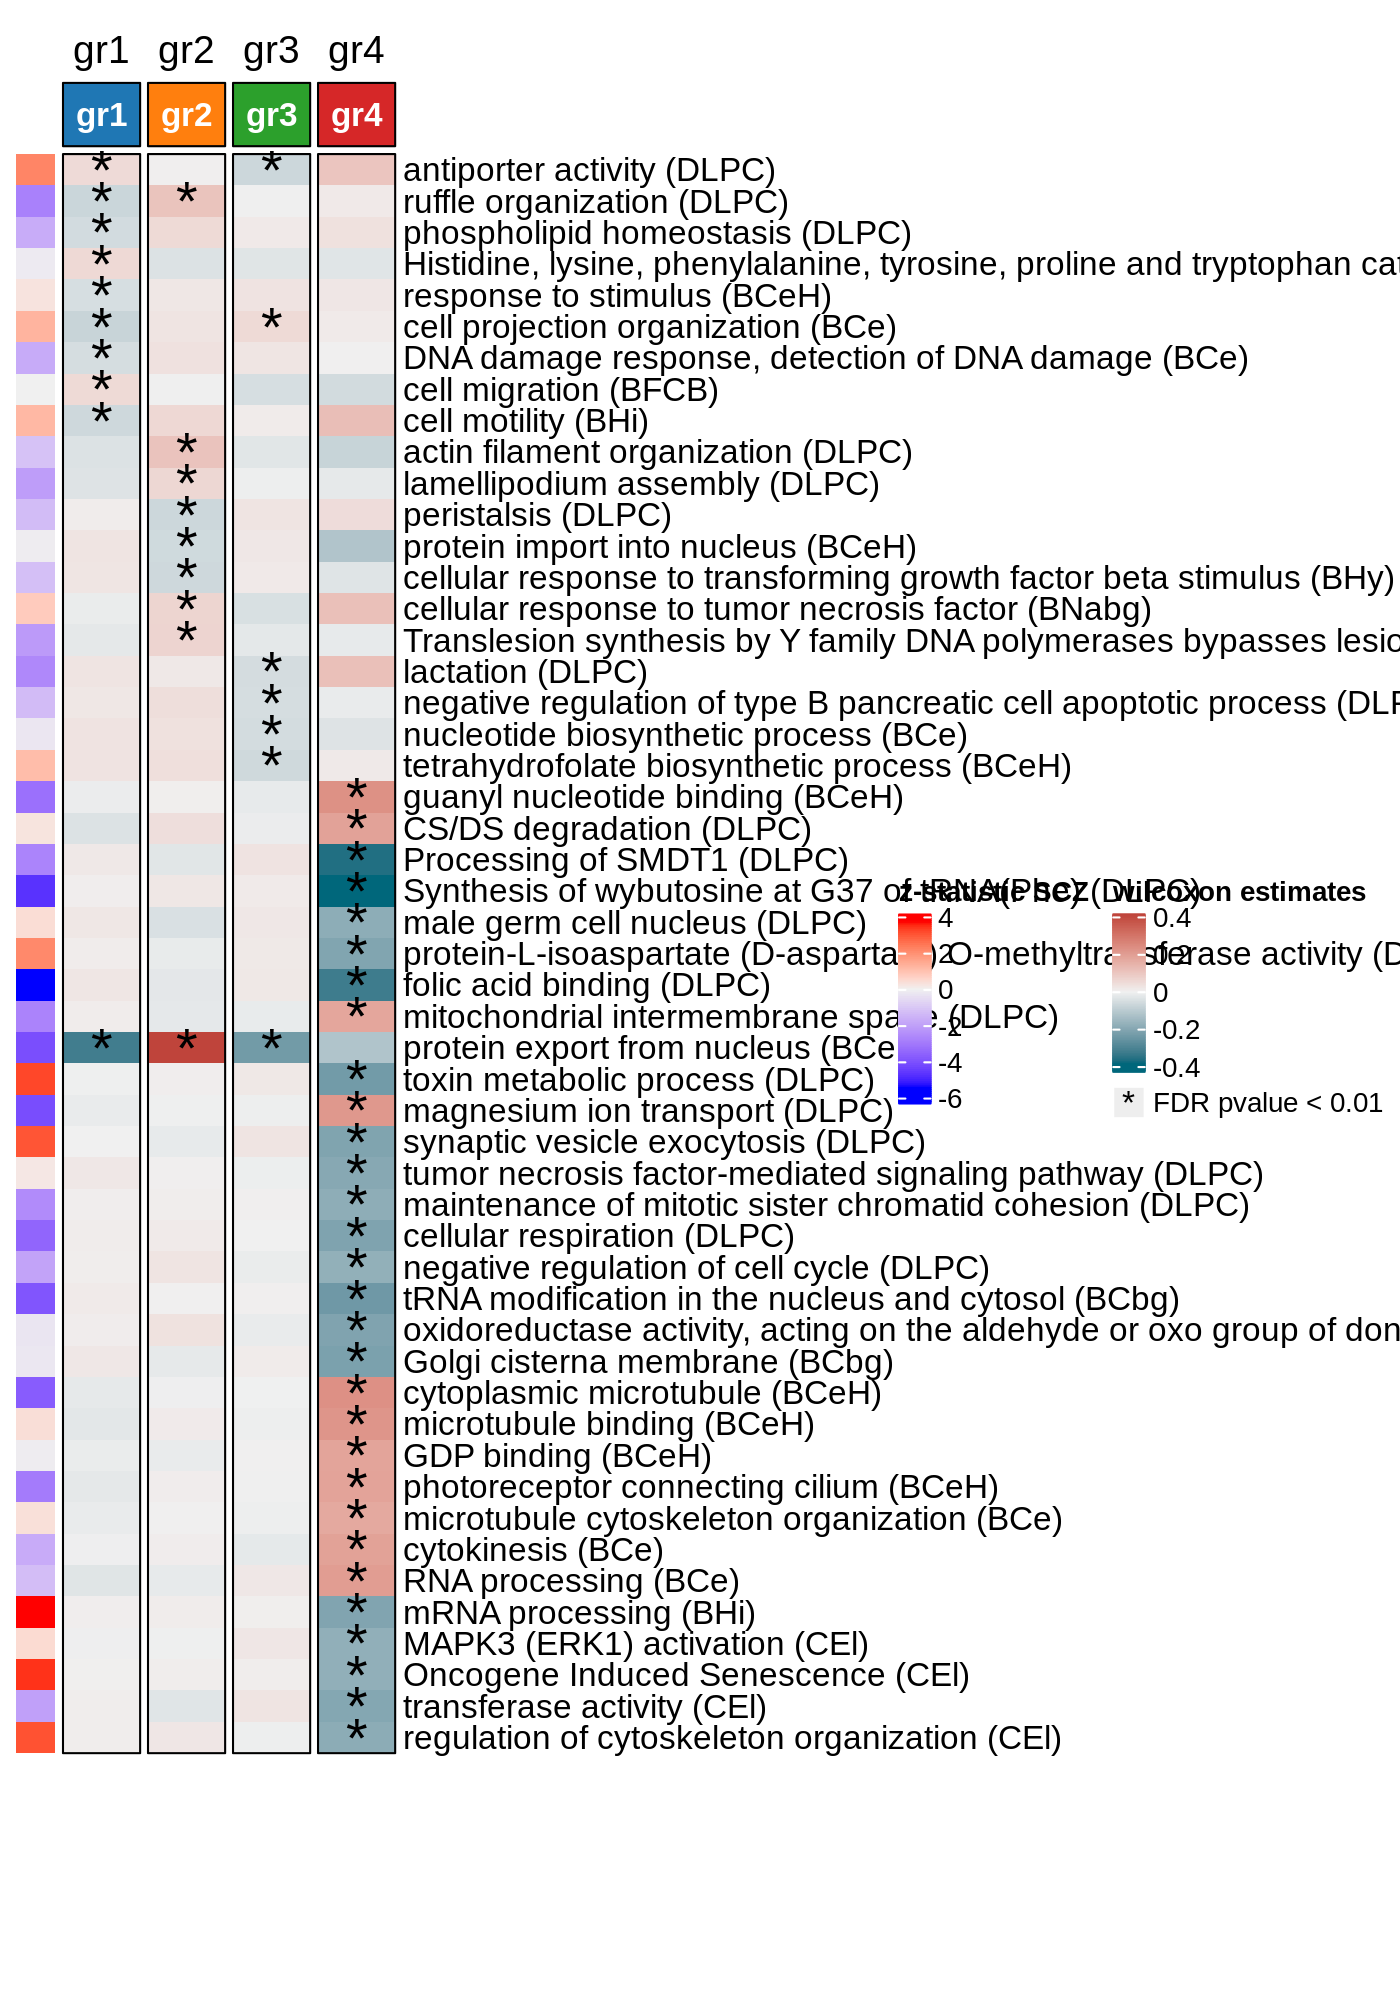

In [33]:
#### heatmap path not in MHC ####

options(repr.plot.width = 7, repr.plot.height = 10, repr.plot.res = 200)
pheno_name <- 'SCZ'
path_anno$id <- paste(path_anno$feat, sapply(path_anno$tissue, get_short_name))
id_keep <- !rownames(feat_est) %in% path_anno$id[path_anno$genes_in_mhc]
P <- length(gr_tot)
# cap
tmp_mat <- as.matrix(feat_est[id_keep, ])
val <- abs(quantile(as.vector(feat_est),probs = 0.95))
mat_breaks <- seq(-val, val, length.out = 100)
tmp_mat[tmp_mat>=val] <- val
tmp_mat[tmp_mat<=-val] <- -val

mat_colors_gr <- list(cluster = pal_d3(palette = 'category20')(P))
names(mat_colors_gr$cluster) <- gr_tot

column_ha <- HeatmapAnnotation(cluster = anno_block(gp = gpar(fill = mat_colors_gr$cluster),
                                                    labels = names(mat_colors_gr$cluster),
                                                    labels_gp = gpar(col = "white", fontsize = 12,  
                                                                     fontface = "bold")))
feat_pvcorr_pch <- as.matrix(feat_pvcorr[id_keep, ])
feat_pvcorr_pch[feat_pvcorr[id_keep, ] <= pval_corr_thr] <- '*'
feat_pvcorr_pch[feat_pvcorr[id_keep, ] > pval_corr_thr] <- ''

estimate_col_fun = colorRamp2(c(min(tmp_mat), 0, max(tmp_mat)), 
                                c("#00677B", "#F0F0F0", "#BF443B"))
zstat_col_fun = colorRamp2(c(min(res_pval_est[id_keep,12]), 0, max(res_pval_est[id_keep,12])), 
                             c("blue","#F0F0F0", "red"))
row_ha <- rowAnnotation(zstat = res_pval_est[id_keep,12],
                        col = list(zstat = zstat_col_fun), 
                        annotation_label = list(zstat = sprintf('z-statistic %s', pheno_name)), 
                        annotation_name_gp = gpar(col = 'white'))

lgd_est <- Legend(title = "wilcoxon estimates", col = estimate_col_fun)
lgd_sig = Legend(pch = "*", type = "points", labels = sprintf("FDR pvalue < %s", as.character(pval_corr_thr)))

hm_pl <- Heatmap(tmp_mat, top_annotation = column_ha, 
                 left_annotation = row_ha,  
                 column_split = gr_tot, 
                 cluster_rows = F, cluster_columns = F, show_column_names = F, 
                 col = estimate_col_fun, border = TRUE, show_heatmap_legend = F, 
                 cell_fun = function(j, i, x, y, width, height, fill){
                           grid.text(sprintf("%s", feat_pvcorr_pch[i, j]), x, y, gp = gpar(fontsize = 20))})

pdf(sprintf('%sheatmap_cluster_pathNOTMHC_WMWest_%s_%s.pdf', outFold, type_data, type_input),
    width= 7, height = 10)
draw(hm_pl, annotation_legend_list = list(lgd_est, lgd_sig))
dev.off() 
draw(hm_pl, annotation_legend_list = list(lgd_est, lgd_sig))

[1] 245   4

png 
  2

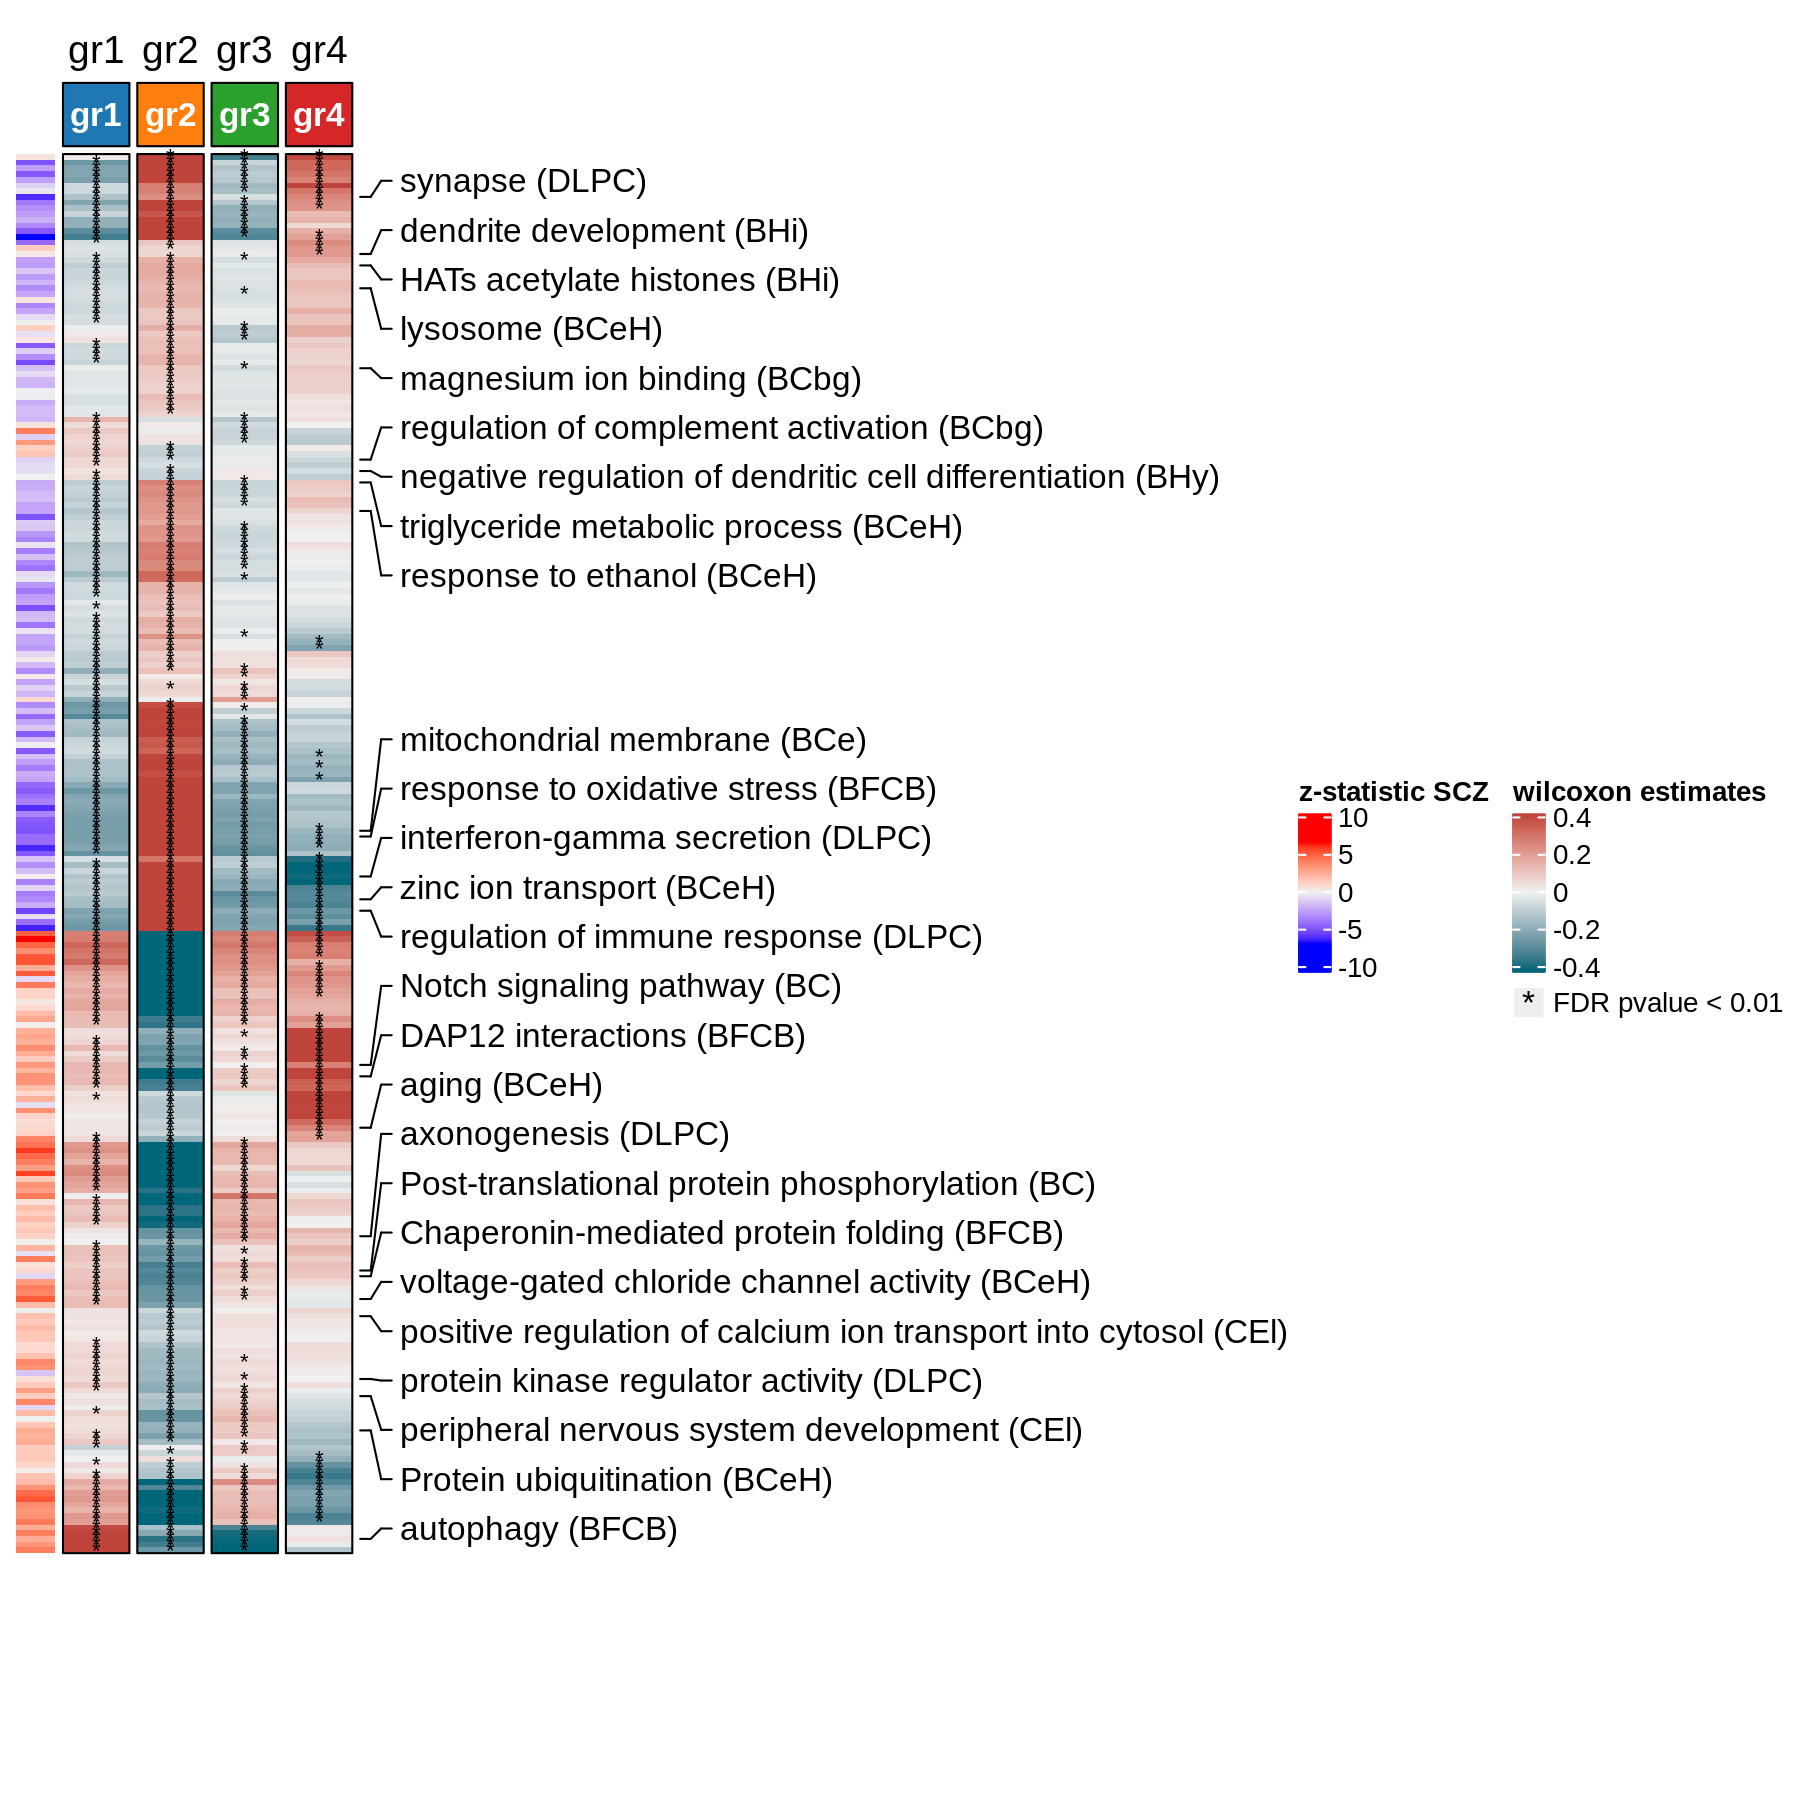

In [92]:
#### heatmap path in MHC ####

options(repr.plot.width = 9,repr.plot.height = 9, repr.plot.res = 200)
pheno_name <- 'SCZ'
id_keep <- rownames(feat_est) %in% path_anno$id[path_anno$genes_in_mhc]
# id_keep <- rownames(feat_est) %in% path_anno$id
def_mar = 30

show_path <- read.delim('clustering_res_matchUKBB_corrPCs/DLPC_CMC/show_path_GOReact.txt', h=F, stringsAsFactors = F)
show_path <- show_path$V1
#show_path = 'clathrin-coated pit'
id <- which(res_pval_est$path %in% show_path)

P <- length(gr_tot)
# cap
tmp_mat <- as.matrix(feat_est[id_keep,])
dim(tmp_mat)
val <- abs(quantile(as.vector(feat_est),probs = 0.95))
mat_breaks <- seq(-val, val, length.out = 100)
tmp_mat[tmp_mat>=val] <- val
tmp_mat[tmp_mat<=-val] <- -val

mat_colors_gr <- list(cluster = pal_d3(palette = 'category20')(P))
names(mat_colors_gr$cluster) <- gr_tot

column_ha <- HeatmapAnnotation(cluster = anno_block(gp = gpar(fill = mat_colors_gr$cluster),
                                                    labels = names(mat_colors_gr$cluster),
                                                    labels_gp = gpar(col = "white", fontsize = 12,  
                                                                     fontface = "bold")))
feat_pvcorr_pch <- feat_pvcorr[id_keep,]
feat_pvcorr_pch[feat_pvcorr[id_keep,] <= pval_corr_thr] <- '*'
feat_pvcorr_pch[feat_pvcorr[id_keep,] > pval_corr_thr] <- ''

estimate_col_fun = colorRamp2(c(min(tmp_mat), 0, max(tmp_mat)), 
                                c("#00677B", "#F0F0F0", "#BF443B"))
zstat_col_fun = colorRamp2(c(min(res_pval_est[,12]), 0, max(res_pval_est[,12])), 
                             c("blue","#F0F0F0", "red"))

row_ha <- rowAnnotation(zstat = res_pval_est[id_keep,12],
                        col = list(zstat = zstat_col_fun),
                        annotation_label = list(zstat = sprintf('z-statistic %s', pheno_name)), 
                        annotation_name_gp = gpar(col = 'white'))

row_ha_names <- rowAnnotation(foo = anno_mark(at = id, 
                                              labels = res_pval_est$new_id[id])) 
                             

lgd_est <- Legend(title = "wilcoxon estimates", col = estimate_col_fun)
lgd_sig = Legend(pch = "*", type = "points", labels = sprintf("FDR pvalue < %s", as.character(pval_corr_thr)))

hm_pl <- Heatmap(tmp_mat, top_annotation = column_ha, 
                 left_annotation = row_ha,  
                 right_annotation = row_ha_names, 
                 #row_km = 9,
                 column_split = gr_tot, 
                 cluster_rows = T, cluster_columns = F, 
                 show_column_names = F, show_row_names = F, 
                 show_row_dend=F, 
                 col = estimate_col_fun, border = TRUE, show_heatmap_legend = F, 
                 cell_fun = function(j, i, x, y, width, height, fill){
                           grid.text(sprintf("%s", feat_pvcorr_pch[i, j]), x, y, gp = gpar(fontsize = 8))})

side_par <- round(max(sapply(rownames(tmp_mat), nchar))) + 30
pdf(sprintf('%sheatmap_cluster_pathwayinMHC_WMWest_%s_%s.pdf', outFold, type_data, type_input), width= 9, height = 9)
draw(hm_pl, annotation_legend_list = list(lgd_est, lgd_sig)) #padding = unit(c(2,def_mar + side_par , 2, 2), "mm"))
dev.off() 
draw(hm_pl, annotation_legend_list = list(lgd_est, lgd_sig)) 
#    padding = unit(c(2, def_mar + side_par, 2, 2), "mm"))

In [35]:
# load wiki and CMC gene set results (probabily repeated)

fold_PALAS <- 'Meta_Analysis_SCZ/OUTPUT_all/'
pathWiki <- read.delim(sprintf('%scustomPath_WikiPath2019Human_pval_SCZ_covCorr_filt.txt', fold_PALAS), h=T, stringsAsFactors = F, sep = '\t')
pathCMC <- read.delim(sprintf('%scustomPath_CMC_GeneSets_pval_SCZ_covCorr_filt.txt', fold_PALAS), h=T, stringsAsFactors = F, sep = '\t')

pathWiki <- pathWiki %>% 
    select(path, ngenes_tscore, ngenes_path, genes_path, tissue) %>%
    mutate(coverage = ngenes_tscore/ngenes_path, name = "WikiPathways") %>%
    rename(gene_name = genes_path)

pathCMC <- pathCMC %>% 
    select(path, ngenes_tscore, ngenes_path, genes_path, tissue) %>%
    mutate(coverage = ngenes_tscore/ngenes_path, name = "CMC GeneSets") %>%
    rename(gene_name = genes_path)

pathWiki_anno <- list()
pathway_feat_wiki_tot <- do.call(rbind, pathway_feat_wiki$test_feat)

for(idg in 1:length(gr_tot)){

    gr <- paste0(gr_tot[idg], '_vs_all')
    print(gr)
    tmp <- list()
    for(idt in 1:length(tissues_name)){
        t <- tissues_name[idt]
        pathway_struct <- pathWiki[pathWiki$tissue == t,]
        tmp[[idt]] <- get_improvement(pathway_feat_wiki_tot, tscore_test, gr, t, pathway_struct)
    }
    pathWiki_anno[[idg]] <- do.call(rbind, tmp)
}
pathWiki_anno <- do.call(rbind, pathWiki_anno)
pathWiki_anno$genes_in_mhc <- NA
for(i in 1:nrow(pathWiki_anno)){

    genes <- strsplit(pathWiki_anno$genes[i], split = ',')[[1]]
    t <- pathWiki_anno$tissue[i]
    tmp <- geneInfo[geneInfo$external_gene_name %in% genes, ]
    tmp <- tmp[!duplicated(tmp$ensembl_gene_id), ]
    pathWiki_anno$genes_in_mhc[i] <- F
    if(any(tmp$chrom == 'chr6' & tmp$start_position >= 26000000 & tmp$end_position <= 34000000)){
        pathWiki_anno$genes_in_mhc[i] <- T
    }
}

pathCMCset_anno <- list()
pathway_feat_CMCset_tot <- do.call(rbind, pathway_feat_CMCset$test_feat)

for(idg in 1:length(gr_tot)){

    gr <- paste0(gr_tot[idg], '_vs_all')
    print(gr)
    tmp <- list()
    for(idt in 1:length(c("DLPC_CMC"))){
        t <- tissues_name[idt]
        pathway_struct <- pathCMC[pathCMC$tissue == t,]
        tmp[[idt]] <- get_improvement(pathway_feat_CMCset_tot, tscore_test, gr, t, pathway_struct)
    }
    pathCMCset_anno[[idg]] <- do.call(rbind, tmp)
}
pathCMCset_anno <- do.call(rbind, pathCMCset_anno)
pathCMCset_anno$genes_in_mhc <- NA
for(i in 1:nrow(pathCMCset_anno)){

    genes <- strsplit(pathCMCset_anno$genes[i], split = ',')[[1]]
    t <- pathCMCset_anno$tissue[i]
    tmp <- geneInfo[geneInfo$external_gene_name %in% genes, ]
    tmp <- tmp[!duplicated(tmp$ensembl_gene_id), ]
    pathCMCset_anno$genes_in_mhc[i] <- F
    if(any(tmp$chrom == 'chr6' & tmp$start_position >= 26000000 & tmp$end_position <= 34000000)){
        pathCMCset_anno$genes_in_mhc[i] <- T
    }
}

path_anno_combined <- rbind(pathWiki_anno, pathCMCset_anno)


[1] "gr1_vs_all"
[1] "gr2_vs_all"
[1] "gr3_vs_all"
[1] "gr4_vs_all"
[1] "gr1_vs_all"
[1] "gr2_vs_all"
[1] "gr3_vs_all"
[1] "gr4_vs_all"


In [58]:
# get pathway sign and create matrix
#### TO RUN: could be modified extra_pathway_list #####

extra_pathway_list <- read.delim('clustering_res_matchUKBB_corrPCs/DLPC_CMC/show_path_wikicmc.txt', h=F, stringsAsFactors = F)
extra_pathway_list <- extra_pathway_list$V1

path_id <- unique(path_anno_combined$feat[path_anno_combined$pval_corr <= pval_corr_thr])
path_anno_extra <- path_anno_combined[path_anno_combined$feat %in% path_id,]
path_anno_extra <- path_anno_extra[path_anno_extra$ngenes > 1,]
tot_combined <- rbind(pathway_feat_wiki_tot, pathway_feat_CMCset_tot)
path_unique <- unique(path_anno_extra$feat)
N_path <- length(unique(path_anno_extra$feat))
feat_est_extra <- matrix(NA, nrow = N_path, ncol = length(gr_tot))
feat_CIl_extra <- matrix(NA, nrow = N_path, ncol = length(gr_tot))
feat_CIu_extra <- matrix(NA, nrow = N_path, ncol = length(gr_tot))
feat_pvcorr_extra <- matrix(NA, nrow = N_path ,ncol = length(gr_tot))
new_name <- vector(mode = 'numeric', length = N_path)

for(i in 1:N_path){
path <- path_unique[i]
tmp <- tot_combined %>% filter(feat %in% path)
tmp <- tmp %>% filter(pval_corr <= pval_corr_thr)
tmp <- tmp[paste0(tmp$feat, tmp$tissue) %in% paste0(path_anno_extra$feat, path_anno_extra$tissue),]    
top_t <- tmp[order(tmp$pval), ]
top_t <- tmp[order(abs(tmp$estimates), decreasing = T),]

t <- top_t$tissue[1]
# print(t)
short <- get_short_name(t)
new_name[i] <- paste(path, short)

# print(tot_combined[tot_combined$tissue == t & tot_combined$feat == path,])
feat_est_extra[i,] <- tot_combined$estimates[tot_combined$tissue == t & tot_combined$feat == path]
feat_CIl_extra[i,] <- tot_combined$CI_low[tot_combined$tissue == t & tot_combined$feat == path]
feat_CIu_extra[i,] <- tot_combined$CI_up[tot_combined$tissue == t & tot_combined$feat == path]
feat_pvcorr_extra[i,] <- tot_combined$pval_corr[tot_combined$tissue == t & tot_combined$feat == path]

}

rownames(feat_est_extra) <- rownames(feat_CIl_extra) <- rownames(feat_CIu_extra) <- rownames(feat_pvcorr_extra) <- new_name
colnames(feat_est_extra) <- colnames(feat_CIl_extra) <- colnames(feat_CIu_extra) <- colnames(feat_pvcorr_extra) <- gr_tot

res_pval_path_extra <- do.call(rbind, list(do.call(rbind, pathway_feat_wiki$res_pval), pathway_feat_CMCset$res_pval[[1]]))
res_pval_path_extra <- left_join(res_pval_path_extra, df_match) %>%
    mutate(new_id = paste(path, short))
res_pval_est_extra <- res_pval_path_extra[match(new_name, res_pval_path_extra$new_id), ]
dim(res_pval_est_extra)

Joining, by = "tissue"



[1] 145  21

[1] 60

png 
  2

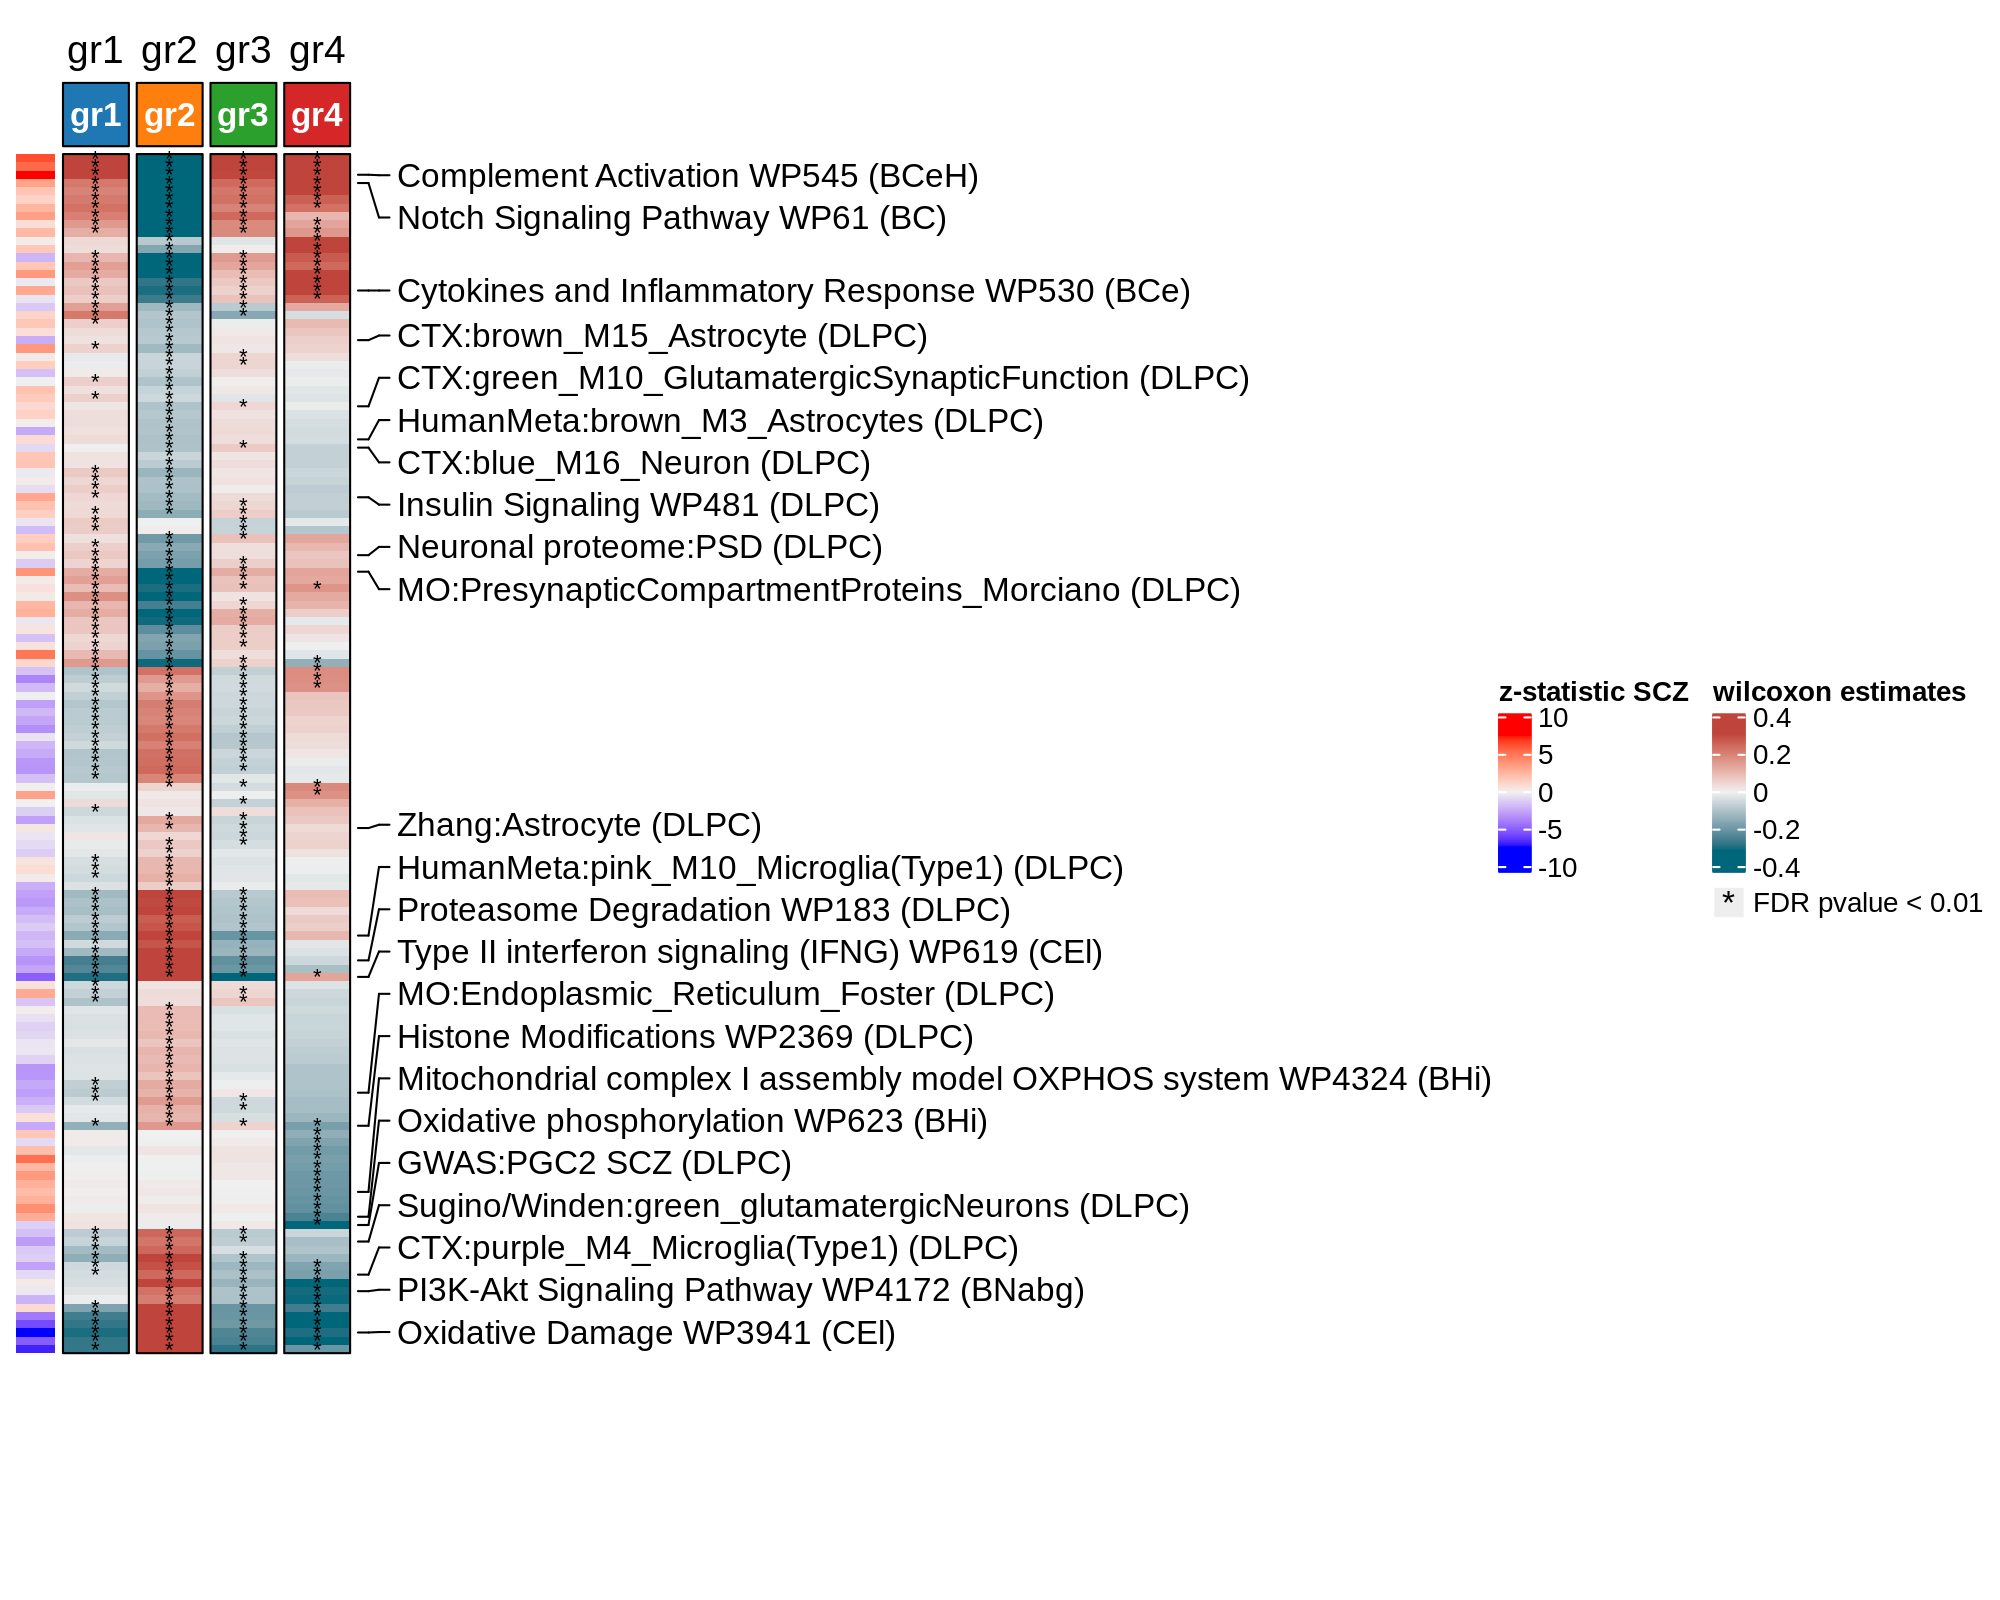

In [88]:
#### heatmap path wiki and CMC ####

options(repr.plot.width = 10,repr.plot.height = 8, repr.plot.res = 200)
pheno_name <- 'SCZ'
path_anno_combined$id <- paste(path_anno_combined$feat, sapply(path_anno_combined$tissue, get_short_name))

show_path <- read.delim('clustering_res_matchUKBB_corrPCs/DLPC_CMC/show_path_wikicmc.txt', h=F, stringsAsFactors = F)
show_path <- show_path$V1
#show_path = 'clathrin-coated pit'
id <- which(res_pval_est_extra$path %in% show_path)

P <- length(gr_tot)
# cap
tmp_mat <- as.matrix(feat_est_extra)
val <- abs(quantile(as.vector(feat_est_extra),probs = 0.95))
mat_breaks <- seq(-val, val, length.out = 100)
tmp_mat[tmp_mat>=val] <- val
tmp_mat[tmp_mat<=-val] <- -val

mat_colors_gr <- list(cluster = pal_d3(palette = 'category20')(P))
names(mat_colors_gr$cluster) <- gr_tot

column_ha <- HeatmapAnnotation(cluster = anno_block(gp = gpar(fill = mat_colors_gr$cluster),
                                                    labels = names(mat_colors_gr$cluster),
                                                    labels_gp = gpar(col = "white", fontsize = 12,  
                                                                     fontface = "bold")))
feat_pvcorr_pch <- as.matrix(feat_pvcorr_extra[, ])
feat_pvcorr_pch[feat_pvcorr_extra[, ] <= 0.05] <- '*'
feat_pvcorr_pch[feat_pvcorr_extra[, ] > 0.05] <- ''


estimate_col_fun = colorRamp2(c(min(tmp_mat), 0, max(tmp_mat)), 
                                c("#00677B", "#F0F0F0", "#BF443B"))
zstat_col_fun = colorRamp2(c(min(res_pval_est_extra[,12]), 0, max(res_pval_est_extra[,12])), 
                             c("blue","#F0F0F0", "red"))

row_ha <- rowAnnotation(zstat = res_pval_est_extra[,12],
                        col = list(zstat = zstat_col_fun),
                        annotation_label = list(zstat = sprintf('z-statistic %s', pheno_name)), 
                        annotation_name_gp = gpar(col = 'white'))

row_ha_names <- rowAnnotation(foo = anno_mark(at = id, 
                                              labels = res_pval_est_extra$new_id[id])) 
                             

lgd_est <- Legend(title = "wilcoxon estimates", col = estimate_col_fun)
lgd_sig = Legend(pch = "*", type = "points", labels = sprintf("FDR pvalue < %s", as.character(pval_corr_thr)))

hm_pl <- Heatmap(tmp_mat, top_annotation = column_ha, 
                 left_annotation = row_ha,  
                 right_annotation = row_ha_names, 
                 #row_km = 9,
                 column_split = gr_tot, 
                 cluster_rows = T, cluster_columns = F, 
                 show_column_names = F, show_row_names = F, 
                 show_row_dend=F, 
                 col = estimate_col_fun, border = TRUE, show_heatmap_legend = F, 
                 cell_fun = function(j, i, x, y, width, height, fill){
                           grid.text(sprintf("%s", feat_pvcorr_pch[i, j]), x, y, gp = gpar(fontsize = 8))})

side_par <- round(max(sapply(rownames(tmp_mat), nchar))) 
side_par = 30
def_mar = 30
def_mar + side_par 
pdf(sprintf('%sheatmap_cluster_pathwayWikiCMC_WMWest_%s_%s.pdf', outFold, type_data, type_input), width= 10, height = 8)
draw(hm_pl, annotation_legend_list = list(lgd_est, lgd_sig)) # padding = unit(c(2,def_mar + side_par , 2, 2), "mm"))
dev.off() 
draw(hm_pl, annotation_legend_list = list(lgd_est, lgd_sig)) # padding = unit(c(2, def_mar + side_par, 2, 2), "mm"))

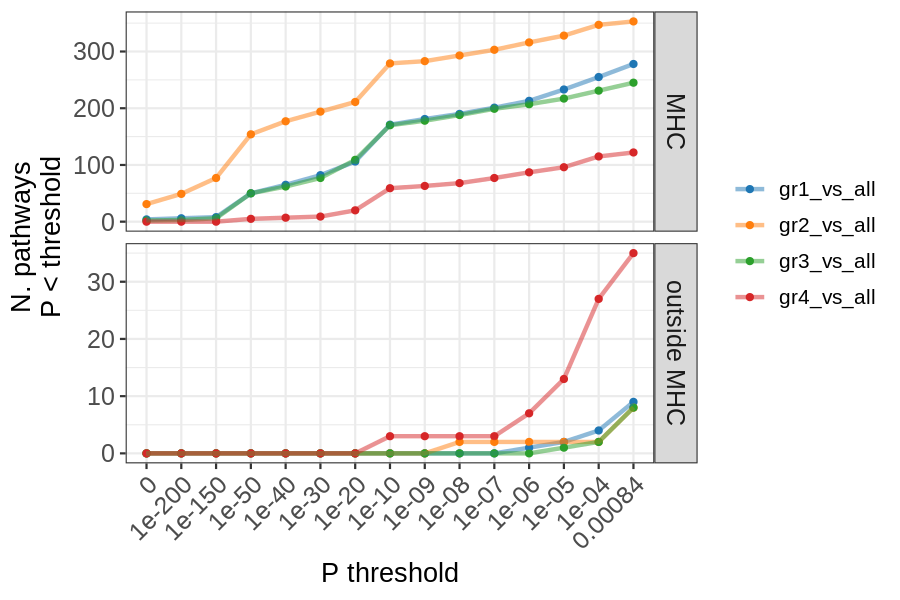

In [71]:
# number of pathways per cluster

options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 150)

path_anno$id_new <- paste0(path_anno$feat,'_',path_anno$tissue, '_', path_anno$comp)

path_sign <- tot[tot$pval_corr <= pval_corr_thr, ]
path_sign <- path_sign %>%    
    dplyr::mutate(id_new = paste0(feat,'_',tissue, '_', comp)) %>%
    dplyr::filter(id_new %in% path_anno$id_new) %>%
    dplyr::mutate(class = dplyr::case_when(id_new %in% path_anno$id_new[!path_anno$genes_in_mhc] ~ 'outside MHC', 
                                           id_new %in% path_anno$id_new[path_anno$genes_in_mhc] ~ 'MHC'))
path_sign$class <- factor(path_sign$class, levels = c('MHC', 'outside MHC'))

thr_values <- c(0, 1e-200, 1e-150, 1e-50, 1e-40,1e-30, 1e-20,  
         1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, max(path_sign$pval))
tmp1 <- unlist(lapply(thr_values, function(x) 
              lapply(comp, function(y) sum(path_sign$pval <= x & path_sign$comp == y & path_sign$class == 'outside MHC'))))
tmp2 <- unlist(lapply(thr_values, function(x) 
              lapply(comp, function(y) sum(path_sign$pval <= x & path_sign$comp == y & path_sign$class == 'MHC'))))
count_thr_pval <- data.frame(count = c(tmp1, tmp2), comp = rep(rep(comp, length(thr_values)), 2), 
                             thr = rep(unlist(lapply(thr_values, function(x) rep(x, length(comp)))), 2), 
                              class = c(rep('outside MHC', length(tmp1)), rep('MHC', length(tmp2))))   

count_thr_pval$thr <- factor(as.character(count_thr_pval$thr), 
levels = as.character(thr_values))
count_thr_pval$class <- factor(count_thr_pval$class, levels = c('MHC', 'outside MHC'))

pl <- ggplot(data=count_thr_pval, aes(x=thr, y=count, group = comp, color = comp)) +
      geom_point(size = 1.2, alpha = 1)+
      geom_line(size = 1, alpha = 0.5)+
      facet_wrap(class~., scales = 'free_y',ncol =  1, strip.position="right")+
      xlab('P threshold')+
      ylab('N. pathways\nP < threshold')+
      scale_color_manual(values = color_gr)+
      theme_bw()+theme(legend.position = "right",
                       strip.text = element_text(size = 12),
                       legend.title = element_blank(),
                       legend.text = element_text(size=10),
                       axis.title = element_text(size=13),
                       axis.text = element_text(size=12), axis.text.x = element_text(angle = 45, hjust = 1))
pl
ggsave(filename = sprintf('%spathwayP_FDRthr0.01_count.pdf', outFold), width = 6, height = 4.2,  plot = pl, device = 'pdf')


In [73]:
path_sign[path_sign$class == 'outside MHC' & path_sign$comp == 'gr4_vs_all', ]

feat                                                                                           
248  CS/DS degradation                                                                              
250  Processing of SMDT1                                                                            
251  Synthesis of wybutosine at G37 of tRNA(Phe)                                                    
253  male germ cell nucleus                                                                         
257  protein-L-isoaspartate (D-aspartate) O-methyltransferase activity                              
258  folic acid binding                                                                             
259  mitochondrial intermembrane space                                                              
262  toxin metabolic process                                                                        
264  magnesium ion transport                                                                        
265  synaptic vesicle exocytosis                                                                    
272  tumor necrosis factor-mediated signaling pathway                                               
274  maintenance of mitotic sister chromatid cohesion                                               
280  cellular respiration                                                                           
281  negative regulation of cell cycle                                                              
344  tRNA modification in the nucleus and cytosol                                                   
348  oxidoreductase activity, acting on the aldehyde or oxo group of donors, NAD or NADP as acceptor
352  Golgi cisterna membrane                                                                        
492  cytoplasmic microtubule                                                                        
493  microtubule binding                                                                            
498  guanyl nucleotide binding                                                                      
499  GDP binding                                                                                    
501  photoreceptor connecting cilium                                                                
504  regulation of cell proliferation                                                               
680  microtubule cytoskeleton organization                                                          
681  cytokinesis                                                                                    
688  RNA processing                                                                                 
694  guanyl nucleotide binding                                                                      
826  folic acid binding                                                                             
900  folic acid binding                                                                             
901  mRNA processing                                                                                
1047 MAPK3 (ERK1) activation                                                                        
1048 Oncogene Induced Senescence                                                                    
1052 focal adhesion                                                                                 
1054 transferase activity                                                                           
1057 regulation of cytoskeleton organization                                                        
     comp       pval     estimates  CI_low      CI_up       pval_corr   
248  gr4_vs_all 5.42e-05  0.1828246  0.09449334  0.27162892 2.758178e-03
250  gr4_vs_all 1.70e-13 -0.3453814 -0.43642357 -0.25424772 3.893000e-11
251  gr4_vs_all 3.13e-16 -0.3672274 -0.45915131 -0.27724418 8.191657e-14
253  gr4_vs_all 1.58e-04 -0.1745156 -0.26424173 -0.08446863 7.421949e-03
257 

**Endophenotype analysis based on gene-RS differences**

In [6]:
# get thr:
precision_file <- '/psycl/g/mpsziller/lucia/CAD_UKBB/eQTL_PROJECT/OUTPUT_GTEx/predict_CAD/AllTissues/200kb/CAD_GWAS_bin5e-2/Meta_Analysis_CAD/CAD_HARD_clustering/update_corrPCs/cp_metaAnalysis_riskScores_clusterCases_group_relatedPheno_npheno_and_precision.txt'
precision <- read.table(precision_file, h=T, sep = '\t', stringsAsFactors = F) %>%
    filter(tissue == "All tissues")
id <- which.min(precision$thr_measure[precision$precision > 0.9])
precision[precision$precision > 0.9, ][id,]
measureGoodness_thr <- round(precision$thr_measure[precision$precision > 0.9][id])
measureGoodness_thr

id <- which.min(precision$thr_measure[precision$precision > 0.8])
precision[precision$precision > 0.8, ][id,]
measureGoodness_thr_2 <- round(precision$thr_measure[precision$precision > 0.8][id])
measureGoodness_thr_2

tissue      n_pheno_thr n_same_sign precision recall    thr_measure
38 All tissues 993         3466        0.9013092 0.2582227 743.7789

[1] 744

tissue      n_pheno_thr n_same_sign precision recall    thr_measure
12 All tissues 2346        3466        0.8098892 0.5481823 250.0116

[1] 250

In [7]:
setwd('/psycl/g/mpsziller/lucia/')

pheno_name <- 'SCZ'
color_pheno_file <- 'UKBB/eQTL_PROJECT/INPUT_DATA/Covariates/color_pheno_type_UKBB_v2.txt'
riskScore_ann_file <- 'SCZ_PGC/eQTL_PROJECT/clustering_res_matchUKBB_corrPCs/DLPC_CMC/matchUKBB_riskScores_tscore_corrPCs_zscaled_clusterCases_PGmethod_HKmetric_phenoAssociation_GLM_annotated.txt'
phenoInfo_file <- 'SCZ_PGC/eQTL_PROJECT/phenotypeDescription_rsSCZ_updated.txt'
# pheno_plot <- 'SCZ_PGC/eQTL_PROJECT/Meta_Analysis_SCZ/DLPC_CMC/SCZ_clustering/list_phenoid_plot'

pheno_ann <- read.delim(color_pheno_file, header = T, stringsAsFactors = F, sep = '\t')
phenoInfo <- read.delim(phenoInfo_file, header = T, stringsAsFactors = F, sep = '\t')
if(!'pheno_type' %in% colnames(phenoInfo)){
  tmp_name <- sapply(phenoInfo$Path, function(x) strsplit(x, split = '> ')[[1]][length(strsplit(x, split = '> ')[[1]])])
  tmp_name <- sapply(tmp_name, function(x) paste0(strsplit(x, split = ' ')[[1]], collapse = '_'))
  phenoInfo$pheno_type <- tmp_name
  phenoInfo$pheno_type[phenoInfo$pheno_type == 'Summary_Information_(diagnoses)'] <- 'ICD9-10_OPCS4'
}

cov_id <- clust_res$test_cov$cov_id[-nrow(clust_res$test_cov)]

phenoInfo_summary <- phenoInfo %>%
    group_by(pheno_type) %>%
    summarise(N=n(), pheno_id = paste0(pheno_id, collapse = ','), 
              Covariates =  paste0(cov_id, collapse = ','))
# phenoInfo_summary
write.table(sprintf('%sendophenotype_tested_class.txt', outFold), x = phenoInfo_summary, sep = '\t', col.names = T, row.names = F)

rs_res <- read.delim(riskScore_ann_file, h=T, stringsAsFactors = F, sep = '\t')
rs_res <- rs_res[!is.na(rs_res$pvalue), ]
head(rs_res[order(rs_res$measure, decreasing = T),])

pheno_id Field                              meaning beta       se_beta   
1015 30000    White blood cell (leukocyte) count NA      -0.5020261 0.01647525
1027 30120    Lymphocyte count                   NA      -0.4698558 0.01651689
1860 30860    Total protein                      NA      -0.4631094 0.01652411
1029 30140    Neutrophill count                  NA      -0.3827194 0.01661489
1030 30150    Eosinophill count                  NA      -0.4047567 0.01659254
1839 30650    Aspartate aminotransferase         NA      -0.4229093 0.01657282
     z         pvalue        OR_or_Beta CI_low     CI_up      type_pheno
1015 -30.47152 6.263509e-200 -0.5020261 -0.5343170 -0.4697352 CONTINUOUS
1027 -28.44700 5.985259e-175 -0.4698558 -0.5022283 -0.4374833 CONTINUOUS
1860 -28.02628 5.866654e-170 -0.4631094 -0.4954960 -0.4307227 CONTINUOUS
1029 -23.03473 4.416427e-116 -0.3827194 -0.4152840 -0.3501548 CONTINUOUS
1030 -24.39389 9.116323e-130 -0.4047567 -0.4372775 -0.3722359 CONTINUOUS
1839 -25.51824 1.198864e-141 -0.4229093 -0.4553914 -0.3904272 CONTINUOUS
     pval_corr     comp       pval_corr_overall R2_risk    Fstat_risk measure 
1015 6.263509e-197 gr2_vs_all 2.222641e-195     0.04177776 14464.15   7261.382
1027 2.992629e-172 gr2_vs_all 1.061951e-170     0.04058922 14167.57   6656.713
1860 1.955551e-167 gr2_vs_all 6.939384e-166     0.03588929 11124.33   5151.783
1029 7.360712e-114 gr2_vs_all 2.611990e-112     0.03906450 13457.37   5150.396
1030 1.823265e-127 gr2_vs_all 6.469957e-126     0.03510981 12188.90   4933.538
1839 2.997160e-139 gr2_vs_all 1.063559e-137     0.02975328 10866.96   4595.739
     pheno_type        
1015 Blood_count       
1027 Blood_count       
1860 Blood_biochemistry
1029 Blood_count       
1030 Blood_count       
1839 Blood_biochemistry

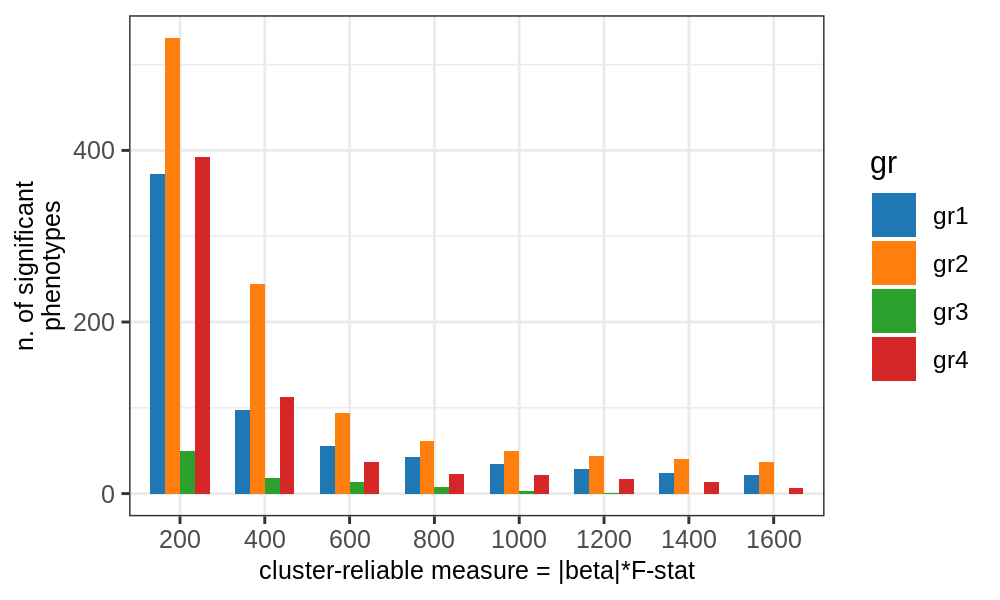

In [8]:
###################################
### plot number of association ####
###################################

options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 200)

rs_res$comp <- factor(rs_res$comp)
rs_res$sign <- 'no'
rs_res$sign[rs_res$pval_corr <= 0.05] <- 'yes'

thr_lims <- seq(200, 1600, by = 200)
df <- list()
for(i in 1:length(thr_lims)){
  df[[i]] <- rs_res %>% filter(measure >=thr_lims[i]) %>% group_by(comp) %>% count(sign, .drop = FALSE) %>% add_column(CRM_thr = thr_lims[i])
}
df <- bind_rows(df)
df <- df %>% mutate(gr = strsplit(as.character(comp), split = '_vs_all')[[1]])
df$gr <- factor(df$gr)
df$CRM_thr <- factor(df$CRM_thr, levels = thr_lims)

pl_count <-  ggplot(df, aes(x = CRM_thr, y = n, fill = gr))+
  geom_bar(stat = 'identity', width = 0.7,
           position=position_dodge())+
  theme_bw()+ 
  ylab('n. of significant\nphenotypes')+ 
  xlab('cluster-reliable measure = |beta|*F-stat')+ 
  theme(legend.position = 'right', axis.title.y = element_text(size = 9), axis.title.x = element_text(size=9),
        axis.text.x = element_text(size = 9), axis.text.y = element_text(size = 9))+
  scale_fill_d3()
ggsave(filename = sprintf('%sriskScores_tscore_zscaled_cluster%sDLPC_GLM_count.pdf', outFold, 'Cases'), width = 5, height = 3, plot = pl_count, device = 'pdf')

pl_count

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


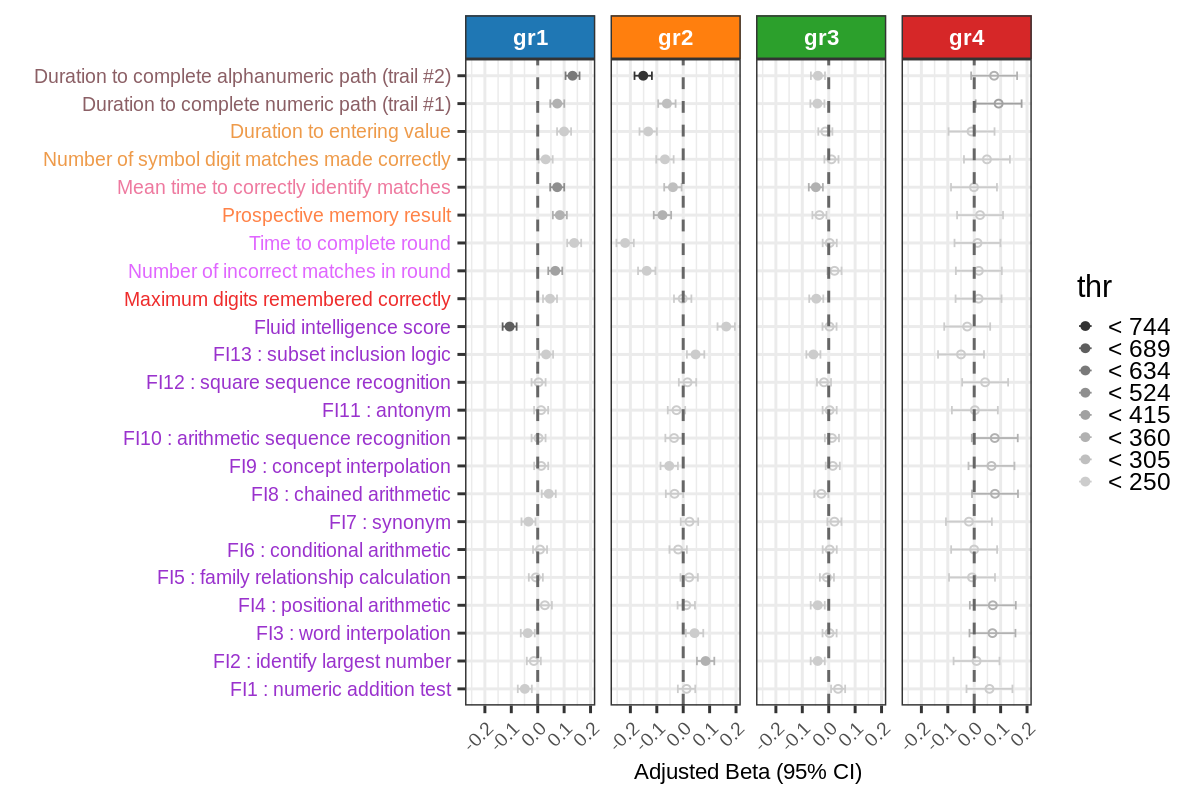

In [9]:
####################################
##### plot cognitive functions #####
####################################
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 200)

P <- length(unique(rs_res$comp))
labs_new <- sapply(as.character(unique(rs_res$comp)), function(x) strsplit(x, split = '_vs_all')[[1]][1])
names(labs_new) <- as.character(unique(rs_res$comp))
gr_color <- pal_d3(palette = 'category20')(P)
                   
id_FI <- as.character(c(486, 4935 ,4946 ,4957, 4968, 4979,4990,5001,5012,5556,5699,5779,5790,5866,20016))
id_PaM <- as.character(c('399', '400'))
id_NM <- as.character(c('20240'))
id_RT <- as.character(c('20023'))
id_PM <- as.character(c('20018'))
id_SDS <- as.character(c('20230', '20159'))
id_TM <- as.character(c('20156', '20157'))

rs_red <- rs_res[rs_res$pheno_id %in% c(id_FI, id_TM, id_SDS, id_PM, id_RT, id_NM, id_PaM), ]

df_red <- rs_red
df_red$type_m <- 'not reliable'
df_red$type_m[df_red$measure >= measureGoodness_thr] <- 'reliable'
df_red$new_id <- df_red$Field
df_red$new_id[!is.na(df_red$meaning)] <- paste(df_red$meaning[!is.na(df_red$meaning)], df_red$Field[!is.na(df_red$meaning)], sep = '\n')
df_red$comp <- factor(df_red$comp, levels = unique(df_red$comp))
df_red$new_id <- factor(df_red$new_id, levels = unique(df_red$new_id))
df_red$pheno_type <- factor(df_red$pheno_type, levels = unique(df_red$pheno_type))
df_red$type_m <- factor(df_red$type_m, levels = c('not reliable', 'reliable'))
df_red$type_res <- 'beta'
df_red$sign <- 'no'
df_red$sign[df_red$pval_corr <= 0.05] <- 'yes'
df_red$sign <- factor(df_red$sign, levels = c('no', 'yes'))
thr_lims <- round(seq(measureGoodness_thr_2, measureGoodness_thr, length.out = 10))
df_red$thr <- paste0('< ', thr_lims[1])
for(i in 1:(length(thr_lims)-1)){
  df_red$thr[df_red$measure > thr_lims[i] & df_red$measure <= thr_lims[i+1]] <- paste0('< ', thr_lims[i+1])
}
thr_lims <- unique(df_red$thr)
thr_lims <- thr_lims[order(as.numeric(sapply(thr_lims, function(x) strsplit(x, split = '< ')[[1]][2])))]
df_red$thr <- factor(df_red$thr, levels = rev(thr_lims))
pheno_ann_red <- pheno_ann[match(df_red$pheno_type, pheno_ann$pheno_type), ]

len_w <- length(unique(df_red$comp))
len_h <- length(unique(df_red$pheno_id))

pl_beta <-  ggplot(df_red, aes(x = new_id, y = OR_or_Beta, shape = sign, color = thr))+
  geom_errorbar(aes(ymin=CI_low, ymax=CI_up), size = 0.3, width=.3, position=position_dodge(0.05), linetype="solid")+
  geom_point(position=position_dodge(0.05), size = 1)+
  theme_bw()+
  ylab('Adjusted Beta (95% CI)')+ geom_hline(yintercept = 0, linetype = 'dashed', color = 'grey40')+
  facet_wrap(comp~., nrow = 1, strip.position="top",  labeller = labeller(comp = labs_new))+
  theme(legend.position = 'right', plot.title = element_text(size=9), axis.title.y = element_blank(), axis.title.x = element_text(size=8),
        legend.key.size = unit(0.2, "cm"),
        axis.text.x = element_text(size = 7, angle = 45, hjust = 1), axis.text.y = element_text(size = 7,  colour = pheno_ann_red$color),
        strip.text = element_text(size=8, color = 'white', face = 'bold'))+
  scale_shape_manual(values=c(1, 19))+
  scale_colour_grey()+
  guides(shape = FALSE)+
  coord_flip()

pl_beta <- ggplot_gtable(ggplot_build(pl_beta))
stripr <- which(grepl('strip-t', pl_beta$layout$name))
fills <- gr_color
k <- 1
for (i in stripr) {
  j <- which(grepl('rect', pl_beta$grobs[[i]]$grobs[[1]]$childrenOrder))
  pl_beta$grobs[[i]]$grobs[[1]]$children[[j]]$gp$fill <- fills[k]
  k <- k+1
}
ggsave(filename = sprintf('%sriskScore_tscore_zscaled_cluster%sDLPC_GLM_beta_CogntiveTests.pdf', outFold,'Cases'), width = len_w+3, height = (len_h)*0.1+1, plot = pl_beta, device = 'pdf')
tot_pl <- ggarrange(plotlist = list(pl_beta), ncol = 1, nrow = 1, align='v')
print(tot_pl)

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


[1] 744

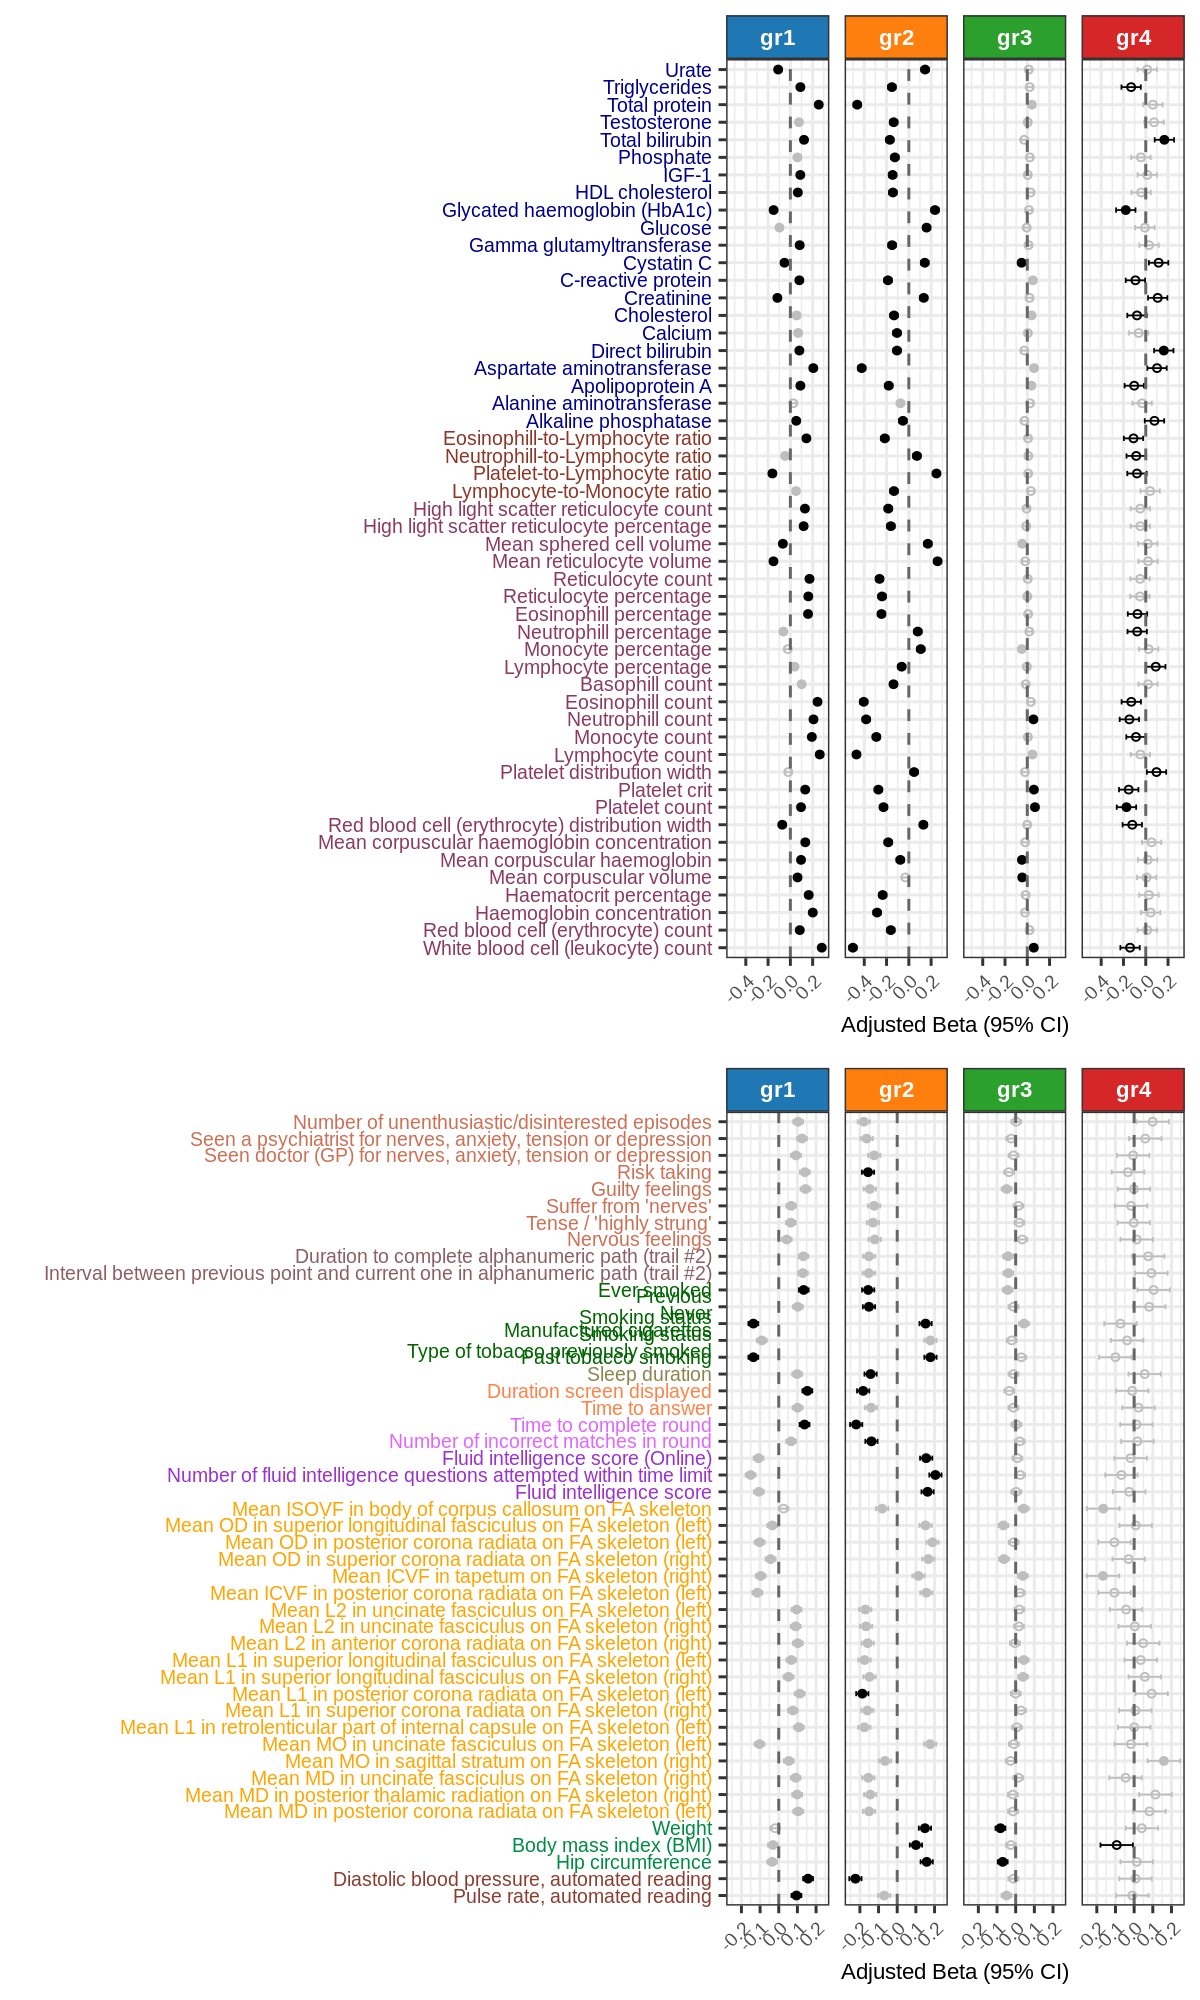

In [10]:
####################################################
### plot selection of association among 610 thr ####
####################################################

forest_plot_geneRS <- function(pheno_keep, rs_res, measureGoodness_thr, outFold, prop_pl = 0.7){  
    
  rs_tmp <- rs_res[rs_res$pheno_id %in% pheno_keep, ]
  rs_tmp$new_id <- paste0(rs_tmp$comp, '_and_', rs_tmp$pheno_id)
  P <- length(unique(rs_tmp$comp))
  gr_color <- pal_d3(palette = 'category20')(P)

df_red <- rs_tmp
df_red$type_m <- 'not reliable'
df_red$type_m[df_red$measure >= measureGoodness_thr] <- 'reliable'
df_red$new_id <- df_red$Field
df_red$new_id[!is.na(df_red$meaning)] <- paste(df_red$meaning[!is.na(df_red$meaning)], 
                                               df_red$Field[!is.na(df_red$meaning)], sep = '\n')
df_red$comp <- factor(df_red$comp, levels = unique(df_red$comp))
df_red$new_id <- factor(df_red$new_id, levels = unique(df_red$new_id))
df_red$pheno_type <- factor(df_red$pheno_type, levels = unique(df_red$pheno_type))
df_red$type_m <- factor(df_red$type_m, levels = c('not reliable', 'reliable'))
df_red$type_res <- 'beta'
df_red$sign <- 'no'
df_red$sign[df_red$pval_corr <= 0.05] <- 'yes'
df_red$sign <- factor(df_red$sign, levels = c('no', 'yes'))
id <- df_red$type_m == 'reliable' & df_red$sign == 'yes'
table(df_red$pheno_type[id], df_red$comp[id])

# divide in 2 part
df_red1 <- subset(df_red, pheno_type %in% c('Blood_count', 'Blood_biochemistry', 'Blood_count_ratio'))
df_red2 <- subset(df_red, !pheno_type %in% c('Blood_count', 'Blood_biochemistry', 'Blood_count_ratio'))
# df_red2 <- subset(df_red, pheno_type %in% c('dMRI_skeleton'))
pheno_ann_red1 <- pheno_ann[match(df_red1$pheno_type, pheno_ann$pheno_type), ]
pheno_ann_red2 <- pheno_ann[match(df_red2$pheno_type, pheno_ann$pheno_type), ]

len_w <- length(unique(df_red$comp))
len_h <- length(unique(df_red$pheno_id))

# change labels 
labs_new <- sapply(as.character(unique(df_red$comp)), function(x) strsplit(x, split = '_vs_all')[[1]][1])
names(labs_new) <- as.character(unique(df_red$comp))

pl_beta1 <-  ggplot(df_red1, aes(x = new_id, y = OR_or_Beta, shape = sign, color = type_m))+
  geom_errorbar(aes(ymin=CI_low, ymax=CI_up), size = 0.3, width=.3, position=position_dodge(0.05), show.legend=FALSE, linetype="solid")+
  geom_point(position=position_dodge(0.05), size = 1)+
  theme_bw()+ 
  ylab('Adjusted Beta (95% CI)')+ geom_hline(yintercept = 0, linetype = 'dashed', color = 'grey40')+
  facet_wrap(comp~., nrow = 1, strip.position="top",  labeller = labeller(comp = labs_new))+
  theme(legend.position = 'none', plot.title = element_text(size=9), axis.title.y = element_blank(), axis.title.x = element_text(size=8),
        axis.text.x = element_text(size = 7, angle = 45, hjust = 1), axis.text.y = element_text(size = 7,  colour = pheno_ann_red1$color), 
        strip.text = element_text(size=8, color = 'white', face = 'bold'))+
  scale_shape_manual(values=c(1, 19))+
  scale_color_manual(values=c('grey', 'black'))+
  coord_flip()

pl_beta1 <- ggplot_gtable(ggplot_build(pl_beta1))
stripr <- which(grepl('strip-t', pl_beta1$layout$name))
fills <- gr_color
k <- 1
for (i in stripr) {
  j <- which(grepl('rect', pl_beta1$grobs[[i]]$grobs[[1]]$childrenOrder))
  pl_beta1$grobs[[i]]$grobs[[1]]$children[[j]]$gp$fill <- fills[k]
  k <- k+1
}

pl_beta2 <-  ggplot(df_red2, aes(x = new_id, y = OR_or_Beta, shape = sign, color = type_m))+
  geom_errorbar(aes(ymin=CI_low, ymax=CI_up), size = 0.3, width=.3, position=position_dodge(0.05), show.legend=FALSE, linetype="solid")+
  geom_point(position=position_dodge(0.05), size = 1)+
  theme_bw()+ 
  ylab('Adjusted Beta (95% CI)')+ geom_hline(yintercept = 0, linetype = 'dashed', color = 'grey40')+
  facet_wrap(comp~., nrow = 1, strip.position="top",  labeller = labeller(comp = labs_new))+
  theme(legend.position = 'none', plot.title = element_text(size=9), axis.title.y = element_blank(), axis.title.x = element_text(size=8),
        axis.text.x = element_text(size = 7, angle = 45, hjust = 1), axis.text.y = element_text(size = 7,  colour = pheno_ann_red2$color), 
        strip.text = element_text(size=8, color = 'white', face = 'bold'))+
  scale_shape_manual(values=c(1, 19))+
  scale_color_manual(values=c('grey', 'black'))+
  coord_flip()

pl_beta2 <- ggplot_gtable(ggplot_build(pl_beta2))
stripr <- which(grepl('strip-t', pl_beta2$layout$name))
fills <- gr_color
k <- 1
for (i in stripr) {
  j <- which(grepl('rect', pl_beta2$grobs[[i]]$grobs[[1]]$childrenOrder))
  pl_beta2$grobs[[i]]$grobs[[1]]$children[[j]]$gp$fill <- fills[k]
  k <- k+1
}

tot_pl <- ggarrange(plotlist = list(pl_beta1, pl_beta2), ncol = 1, nrow = 2, align='v', heights = c(1, prop_pl))
ggsave(filename = sprintf('%sriskScore_tscore_zscaled_cluster%sDLPC_GLM_beta_measureThr%s.pdf', outFold,'Cases', as.character(measureGoodness_thr)), width = len_w+3, height = len_h*0.1+2, plot = tot_pl, device = 'pdf')

return(tot_pl)
}

                   
options(repr.plot.width = 6, repr.plot.height = 10, repr.plot.res = 200)
pheno_keep <- unique(rs_res$pheno_id[rs_res$pval_corr <= 0.05 & rs_res$measure >= 600])
forest_plot_geneRS(pheno_keep, rs_res, measureGoodness_thr, outFold, prop_pl = 0.9)                   

# save table at measureGoodness_thr
pheno_keep <- unique(rs_res$pheno_id[rs_res$pval_corr <= 0.05 & rs_res$measure >= measureGoodness_thr])
rs_tmp <- rs_res[rs_res$pheno_id %in% pheno_keep, ]
write.table(rs_tmp,
            file = sprintf('%sriskScore_tscore_zscaled_cluster%sDLPC_GLM_beta_measureThr%s.txt', outFold,'Cases', as.character(measureGoodness_thr)), 
            col.names = T, row.names = F, sep = '\t', quote = F)    

measureGoodness_thr               

In [22]:
rs_res[grepl("MO in sagittal", rs_res$Field),]

pheno_id Field                                              meaning
188  25182    Mean MO in sagittal stratum on FA skeleton (right) NA     
189  25183    Mean MO in sagittal stratum on FA skeleton (left)  NA     
1188 25182    Mean MO in sagittal stratum on FA skeleton (right) NA     
1189 25183    Mean MO in sagittal stratum on FA skeleton (left)  NA     
2188 25182    Mean MO in sagittal stratum on FA skeleton (right) NA     
2189 25183    Mean MO in sagittal stratum on FA skeleton (left)  NA     
3188 25182    Mean MO in sagittal stratum on FA skeleton (right) NA     
3189 25183    Mean MO in sagittal stratum on FA skeleton (left)  NA     
     beta         se_beta    z          pvalue       OR_or_Beta   CI_low      
188   0.054215347 0.01354776  4.0017953 6.306217e-05  0.054215347  0.027662233
189   0.023782502 0.01355215  1.7548877 7.929193e-02  0.023782502 -0.002779224
1188 -0.065470189 0.01680159 -3.8966668 9.780408e-05 -0.065470189 -0.098400696
1189 -0.007589829 0.01680779 -0.4515661 6.515859e-01 -0.007589829 -0.040532492
2188 -0.026730308 0.01361071 -1.9639170 4.955185e-02 -0.026730308 -0.053406813
2189 -0.030750304 0.01361090 -2.2592417 2.387775e-02 -0.030750304 -0.057427171
3188  0.159225303 0.04436291  3.5891541 3.324479e-04  0.159225303  0.072275606
3189  0.124743573 0.04436956  2.8114676 4.935812e-03  0.124743573  0.037780838
     CI_up         type_pheno pval_corr    comp       pval_corr_overall
188   8.076846e-02 CONTINUOUS 0.0001905202 gr1_vs_all 0.002891210      
189   5.034423e-02 CONTINUOUS 0.1192359898 gr1_vs_all 1.000000000      
1188 -3.253968e-02 CONTINUOUS 0.0002248370 gr2_vs_all 0.004290028      
1189  2.535283e-02 CONTINUOUS 0.7051794963 gr2_vs_all 1.000000000      
2188 -5.380279e-05 CONTINUOUS 0.1883215019 gr3_vs_all 1.000000000      
2189 -4.073437e-03 CONTINUOUS 0.1159114204 gr3_vs_all 0.566008986      
3188  2.461750e-01 CONTINUOUS 0.0474925608 gr4_vs_all 0.013210640      
3189  2.117063e-01 CONTINUOUS 0.1501463674 gr4_vs_all 0.147432703      
     R2_risk   Fstat_risk measure   pheno_type    sign
188  0.2899782 3831.942   207.75006 dMRI_skeleton yes 
189  0.2789789 3636.618    86.48788 dMRI_skeleton no  
1188 0.2899782 3831.942   250.87795 dMRI_skeleton yes 
1189 0.2789789 3636.618    27.60131 dMRI_skeleton no  
2188 0.2899782 3831.942   102.42898 dMRI_skeleton no  
2189 0.2789789 3636.618   111.82712 dMRI_skeleton no  
3188 0.2899782 3831.942   610.14210 dMRI_skeleton yes 
3189 0.2789789 3636.618   453.64475 dMRI_skeleton no

In [120]:
length(unique(rs_tmp$pheno_id))
sum(rs_res$pval_corr <= 0.05 & rs_res$measure >= 600)
table(rs_res$comp[rs_res$pval_corr <= 0.05 & rs_res$measure >= 600])

keep_cogn <- c('FI1 : numeric addition test','FI2 : identify largest number', 
               'FI3 : word interpolation', 'FI4 : positional arithmetic', 
               'FI7 : synonym', 'FI6 : conditional arithmetic',
               'FI8 : chained arithmetic', 
               'FI9 : concept interpolation', 
               'FI10 : arithmetic sequence recognition', 
               'FI12 : square sequence recognition', 
               'FI13 : subset inclusion logic', 
               'Fluid intelligence score', 
               'Mean time to correctly identify matches', 
               'Maximum digits remembered correctly',
               'Duration to complete alphanumeric path (trail #2)',
               'Duration to entering value',
               'Prospective memory result', 
               'Time to complete round')

# a = rs_res[rs_res$Field %in% keep_cogn & rs_res$comp == 'gr2_vs_all', ]
a = rs_res[rs_res$pheno_id == 'PLR' & rs_res$comp == 'gr1_vs_all', ]
a[order(a$pvalue),]


[1] 68

[1] 171


gr1_vs_all gr2_vs_all gr3_vs_all gr4_vs_all 
        56         94         14          7 

pheno_id Field                        meaning beta       se_beta   
47 PLR      Platelet-to-Lymphocyte ratio NA      -0.1614442 0.01351046
   z         pvalue       OR_or_Beta CI_low     CI_up      type_pheno
47 -11.94957 8.177968e-33 -0.1614442 -0.1879243 -0.1349642 CONTINUOUS
   pval_corr    comp       pval_corr_overall R2_risk    Fstat_risk measure 
47 7.434517e-31 gr1_vs_all 9.068744e-30      0.04579225 15968.78   2578.068
   pheno_type        sign
47 Blood_count_ratio yes

In [123]:
pheno_keep <- unique(rs_res$pheno_id[rs_res$pval_corr <= 0.05 & rs_res$measure >= 600])
rs_tmp <- rs_res[rs_res$pheno_id %in% pheno_keep, ]
length(unique(rs_tmp$pheno_id))
table(rs_tmp$pheno_type[rs_tmp$measure >= measureGoodness_thr & rs_tmp$pval_corr <= 0.05], rs_tmp$comp[rs_tmp$pval_corr <= 0.05 & rs_tmp$measure >= measureGoodness_thr])
length(unique(rs_tmp$pheno_id[rs_tmp$measure >= measureGoodness_thr]))
# rs_tmp[!duplicated(rs_tmp$pheno_id) & !rs_tmp$pheno_type %in% 'Blood_count', c('pheno_id', 'Field', 'pheno_type')]
        

[1] 98

                    
                     gr1_vs_all gr2_vs_all gr3_vs_all gr4_vs_all
  Blood_biochemistry         15         20          1          3
  Blood_count                21         25          6          1
  Blood_count_ratio           2          4          0          0
  Blood_pressure              2          1          0          0
  Body_size_measures          0          3          2          0
  dMRI_skeleton               0          1          0          0
  Fluid_intelligence          0          3          0          0
  Mental_health               0          1          0          0
  Pairs_matching              1          2          0          0
  Prospective_memory          1          1          0          0
  Sleep                       0          1          0          0
  Smoking                     3          4          0          0

[1] 68

Shown 98 phenotypes (CRM >=600), among which 68 have a CRM > 744 and FDR <= 0.05

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


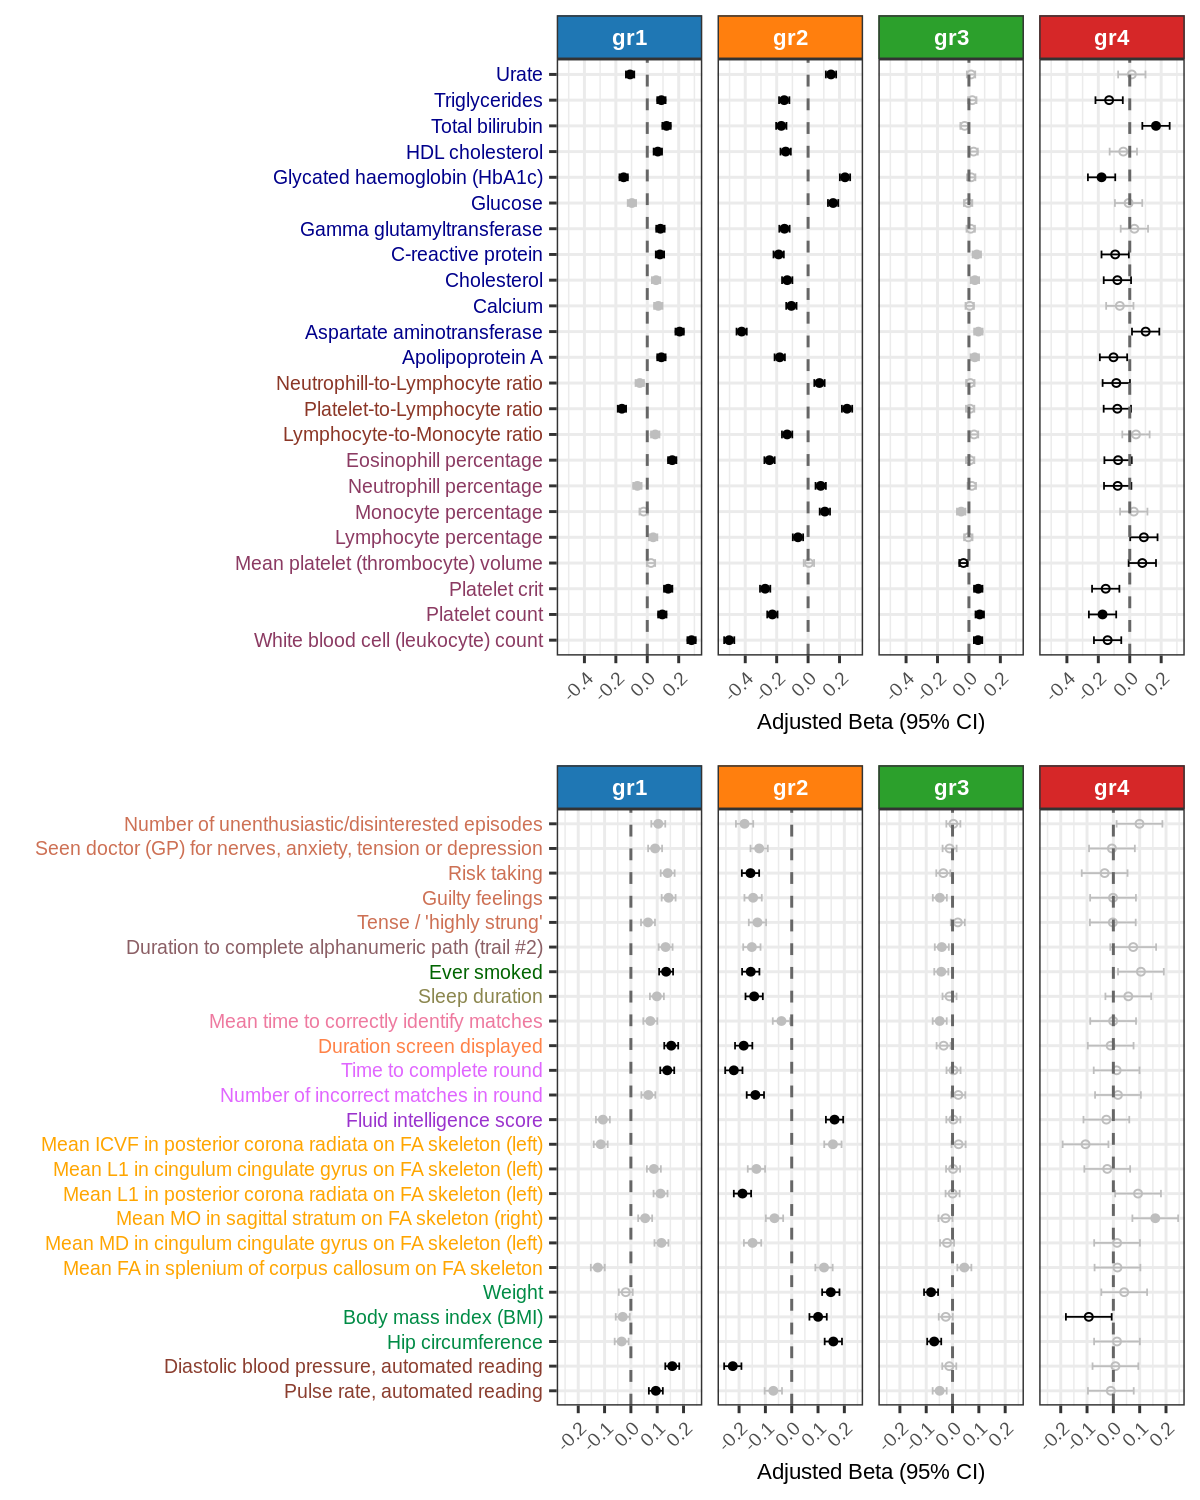

In [24]:
### plot for publication ###
#### TO RUN ####
options(repr.plot.width = 6, repr.plot.height = 7.5, repr.plot.res = 200)
pheno_plot <- 'SCZ_PGC/eQTL_PROJECT/clustering_res_matchUKBB_corrPCs/DLPC_CMC/list_endopheno_plot'
pheno_keep <- read.table(pheno_plot, header = F, stringsAsFactors = F)$V1
forest_plot_geneRS(pheno_keep, rs_res, measureGoodness_thr = measureGoodness_thr, paste0(outFold, 'selected_'), prop_pl = 1)

In [12]:
### spider plot ####
### done of LISA cluster, impossible to move data!
riskScoreAllSamples_ann_file <- 'SCZ_PGC/eQTL_PROJECT/clustering_res_matchUKBB_corrPCs/DLPC_CMC/matchUKBB_allSamples_riskScores_tscore_corrPCs_zscaled_clusterAll_PGmethod_HKmetric_phenoAssociation_GLMpairwise_annotated.txt'
# riskScoreAllSamples_ann_file <- 'SCZ_PGC/eQTL_PROJECT/clustering_res_matchUKBB_corrPCs/DLPC_CMC/matchUKBB_allSamples_riskScores_tscore_corrPCs_zscaled_clusterAll_PGmethod_HKmetric_phenoAssociation_GLM.txt'

rs_res_all <- read.delim(riskScoreAllSamples_ann_file, h=T, stringsAsFactors = F, sep = '\t')
rs_res_all <- rs_res_all[!is.na(rs_res_all$pvalue), ]

keep_mets <- c('NLR')
rs_res_all[rs_res_all$pheno_id %in% keep_mets & grepl('gr0', rs_res_all$comp),]

pheno_id Field                           meaning beta        se_beta   
48   NLR      Neutrophill-to-Lymphocyte ratio NA      -0.07197286 0.01215001
1048 NLR      Neutrophill-to-Lymphocyte ratio NA       0.01470410 0.01632168
3048 NLR      Neutrophill-to-Lymphocyte ratio NA      -0.03686612 0.01223554
6048 NLR      Neutrophill-to-Lymphocyte ratio NA      -0.12738384 0.04438009
     z          pvalue       OR_or_Beta  CI_low      CI_up       type_pheno
48   -5.9236857 3.175442e-09 -0.07197286 -0.09578644 -0.04815927 CONTINUOUS
1048  0.9008937 3.676514e-01  0.01470410 -0.01728581  0.04669402 CONTINUOUS
3048 -3.0130351 2.588223e-03 -0.03686612 -0.06084734 -0.01288490 CONTINUOUS
6048 -2.8702923 4.103890e-03 -0.12738384 -0.21436722 -0.04040046 CONTINUOUS
     pval_corr    comp       pval_corr_overall R2_risk    Fstat_risk measure  
48   2.089106e-08 gr1_vs_gr0 4.766867e-07      0.03492403 12107       871.3753
1048 4.777490e-01 gr2_vs_gr0 1.000000e+00      0.03492403 12107       178.0226
3048 1.568620e-02 gr3_vs_gr0 1.024778e-01      0.03492403 12107       446.3380
6048 7.199807e-02 gr4_vs_gr0 1.521487e-01      0.03492403 12107      1542.2360
     pheno_type       
48   Blood_count_ratio
1048 Blood_count_ratio
3048 Blood_count_ratio
6048 Blood_count_ratio

In [126]:
keep_cogn <- c('FI1 : numeric addition test',
                'FI2 : identify largest number', 
#               'FI3 : word interpolation', 'FI4 : positional arithmetic', 
#               'FI7 : synonym', 'FI6 : conditional arithmetic',
#               'FI8 : chained arithmetic', 
#               'FI9 : concept interpolation', 
#               'FI10 : arithmetic sequence recognition', 
#               'FI12 : square sequence recognition', 
#               'FI13 : subset inclusion logic', 
                'Fluid intelligence score', 
               'Mean time to correctly identify matches', 
               'Maximum digits remembered correctly',
#               'Duration to complete alphanumeric path (trail #2)',
#               'Duration to entering value',
#               'Prospective memory result', 
               'Time to complete round')
rs_res_all[rs_res_all$Field %in% keep_cogn & rs_res_all$comp %in% c('gr1_vs_gr0'),]
# rs_res[rs_res$Field %in% keep_cogn & grepl('gr2_vs_all', rs_res$comp),]

pheno_id Field                                   meaning beta       
495 4935     FI1 : numeric addition test             NA      -0.03504000
496 4946     FI2 : identify largest number           NA      -0.01358078
508 20016    Fluid intelligence score                NA      -0.16220627
527 20240    Maximum digits remembered correctly     NA       0.02490987
530 400      Time to complete round                  NA       0.21954584
533 20133    Time to complete round                  NA       0.10186835
546 20023    Mean time to correctly identify matches NA       0.12773828
    se_beta    z          pvalue       OR_or_Beta  CI_low      CI_up      
495 0.01212251  -2.890490 3.848618e-03 -0.03504000 -0.05879968 -0.01128032
496 0.01210903  -1.121541 2.620647e-01 -0.01358078 -0.03731404  0.01015248
508 0.01210166 -13.403641 7.150725e-41 -0.16220627 -0.18592508 -0.13848746
527 0.01212882   2.053775 4.000436e-02  0.02490987  0.00113782  0.04868192
530 0.01210664  18.134332 3.511560e-73  0.21954584  0.19581726  0.24327442
533 0.01212358   8.402501 4.522360e-17  0.10186835  0.07810658  0.12563012
546 0.01216568  10.499889 9.390188e-26  0.12773828  0.10389399  0.15158258
    type_pheno pval_corr    comp       pval_corr_overall R2_risk    Fstat_risk
495 CONTINUOUS 8.439951e-03 gr1_vs_gr0 1.439937e-01      0.03380960 3846.107  
496 CONTINUOUS 3.379800e-01 gr1_vs_gr0 1.000000e+00      0.03179159 3615.982  
508 CONTINUOUS 5.958937e-39 gr1_vs_gr0 1.521489e-37      0.05340246 6295.316  
527 CONTINUOUS 6.803463e-02 gr1_vs_gr0 1.000000e+00      0.05265327 4469.133  
530 CONTINUOUS 3.511560e-70 gr1_vs_gr0 1.808935e-69      0.01728053 6593.553  
533 CONTINUOUS 8.532755e-16 gr1_vs_gr0 1.949915e-14      0.04295987 4276.048  
546 CONTINUOUS 3.029093e-24 gr1_vs_gr0 8.355224e-23      0.01756866 6913.874  
    measure    pheno_type        
495  134.76757 Fluid_intelligence
496   49.10784 Fluid_intelligence
508 1021.13972 Fluid_intelligence
527  111.32551 Numeric_memory    
530 1447.58705 Pairs_matching    
533  435.59396 Pairs_matching    
546  883.16641 Reaction_time

In [127]:
# which genes are considered to compute gene-rs?
feat_geneRS <- '/psycl/g/mpsziller/lucia/UKBB/eQTL_PROJECT/OUTPUT_CMC/predict_UKBB/200kb/devgeno0.01_testdevgeno0/update_corrPCs/matchPGC_tscore_features_risk_score_corr2Thr0.1.txt'
feat_geneRS <- read.table(feat_geneRS, header = T, stringsAsFactors = F, sep = '\t')
geneInfo <- read.table(geneInfo_file[1], header = T, stringsAsFactors = F, sep = '\t')
geneInfo_mhc <- geneInfo %>% filter(external_gene_name %in% feat_geneRS$external_gene_name,
                   chrom == 'chr6', start_position >= 26000000, end_position <= 34000000)
# how is geneRS filtering??
res_pval <- res_pval_tot %>% filter(tissue == 'DLPC_CMC')
geneInfo_mhc$Zstat <- res_pval[match(geneInfo_mhc$external_gene, res_pval$external_gene_name),7]
geneInfo_mhc %>% select(chrom, external_gene_name, Zstat)

corr_genes <- get(load('/psycl/g/mpsziller/lucia/UKBB/eQTL_PROJECT/OUTPUT_CMC/predict_UKBB/200kb/devgeno0.01_testdevgeno0/correlation_estimate_tscore.RData'))
corr_genes$cor[geneInfo_mhc$external_gene_name, 'C4A']

chrom external_gene_name Zstat      
1  chr6  HIST1H1C           -2.03978094
2  chr6  HIST1H4F            0.07152082
3  chr6  GUSBP2              2.30477203
4  chr6  AL022393.7         -6.77437030
5  chr6  HCG4                5.28362621
6  chr6  HLA-A               1.22308782
7  chr6  HLA-C              -5.22451278
8  chr6  MICA               -1.79118543
9  chr6  BAG6                6.80121376
10 chr6  VWA7               -1.55336382
11 chr6  HLA-DRB1            2.78042512
12 chr6  TAPSAR1            -0.09405692
13 chr6  BAK1               -4.42371550
14 chr6  LEMD2               1.35557927

HIST1H1C    HIST1H4F      GUSBP2  AL022393.7        HCG4       HLA-A 
-0.07365250  0.07305783  0.10565010 -0.26208748  0.31622471 -0.05338311 
      HLA-C        MICA        BAG6        VWA7    HLA-DRB1     TAPSAR1 
-0.47568478 -0.06151410  0.24788664 -0.01291036  0.11445266 -0.13729180 
       BAK1       LEMD2 
-0.08140362 -0.01953760